In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%pylab inline

shapes={'spec':'v',
        'toph':'s',
        'prin30':'o',
        'abun':'p',
        'tabn':'^',
        'labn':'d',
        'reda':'o',
        'trda':'o'}

sizes={'spec':20,
        'toph':20,
        'prin30':20,
        'abun':20,
        'tabn':20,
        'reda':20,
        'trda':20,
        'labn':20}

alphas={'spec':0.7,
        'toph':0.7,
        'prin30':0.7,
        'abun':0.7,
        'tabn':0.7,
        'labn':0.7}

names={'spec':'unmodified',
       'toph':'binary mask',
       'prin30':'principal components',
       'abun':'conservative',
       'tabn':'theoretical',
       'labn':'optimistic'}

cmap = plt.get_cmap('viridis')(np.linspace(0,0.8,6))
colors={'spec':cmap[0],
        'toph':cmap[4],
        'prin30':cmap[2],
        'abun':cmap[1],
        'tabn':cmap[3],
        'labn':cmap[5]}

font = {'size'   : 20}

matplotlib.rc('font', **font)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [ ]:
from dbscan_display import read_results,typenames,nametypes

In [ ]:
print(typenames)

In [ ]:
d = read_results(datatype = 'spec', case = 12, 
                 timestamp = '2018-08-27.23.06.28.732683')#'2018-08-14.20.35.09.910397') #
#d = read_results(datatype = 'spec', case = 12, 
#                 timestamp = '2018-10-10.04.25.16.145518')
d = read_results(datatype='spec',case=12,
                 timestamp = '2018-10-18.02.41.31.602969')
d = read_results(datatype='spec',case=12,
                 timestamp = '2018-11-02.16.17.14.567626')
d = read_results(datatype='spec',case='12-V300.0-a2.1',
                 timestamp = '2018-11-28.11.47.56.726881')
#d = read_results(datatype='spec',case='A',timestamp='2018-09-23.12.39.50.21121')
#d = read_results(datatype='spec',case='B',timestamp='2018-09-23.15.27.07.474536')
#d = read_results(datatype='spec',case='C',timestamp='2018-09-23.16.05.47.430216')

### For only epsilon variation

In [ ]:
d.read_base_data()
if not d.allbad:
    d.generate_average_stats(testnum=10,testsize=15,testeff=0.70,testcom=0.1,iters=100,minmem=10)#,checkcls=10,checkinds=[9807,9806,9804])

In [ ]:
sizelim = 1
cmap = 'viridis_r'

In [ ]:
# font = {'family': 'serif',
#         'weight': 'normal',
#         'size'  :  20
# }
cmap = 'viridis_r'#'coolwarm'
sizelim = 5
#matplotlib.rc('font',**font)
d.read_run_data(eps=0.1,min_sample=3,update=True,datatype='prin30')
mask = d.fsize > sizelim
fsizes = np.sort(d.fsize[mask])
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(15,10))
# ax1.set_xscale('log')
# sc = ax1.scatter(d.fsize[mask],d.eff[mask])#,c=d.com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
# ax1.set_ylabel('$H_i$')
# ax1.set_ylim(-0.1,1.1)
# ax2.set_xscale('log')
# sc = ax2.scatter(d.msize[mask],d.eff[mask])#,c=d.com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
# ax2.set_ylim(-0.1,1.1)
# ax3.set_xscale('log')
# sc = ax3.scatter(d.fsize[mask],d.com[mask])#,c=d.com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
# ax3.set_ylabel('$C_i$')
# ax3.set_xlabel('found size')
# ax3.set_ylim(-0.1,1.1)
# ax4.set_xscale('log')
# sc = ax4.scatter(d.msize[mask],d.com[mask])#,c=d.com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
# ax4.set_ylim(-0.1,1.1)
# ax4.set_xlabel('matched size')
# #cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.02])
# #cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal',label='completeness')
# plt.subplots_adjust(hspace=0.05,wspace=0.025,bottom=0.25)
# #plt.savefig('silhouette_plots.pdf')
# plt.figure()
# plt.plot(d.eff[mask],d.com[mask],'.')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(15,10))
ax1.set_xscale('log')
sc = ax1.scatter(d.fsize[mask],d.fsil[mask],c=d.com[mask],cmap=cmap,vmin=0,vmax=1,alpha=0.5,rasterized=True)
ax1.set_ylabel('found $S_i$')
ax1.set_ylim(-0.1,1.1)
ax2.set_xscale('log')
sc = ax2.scatter(d.msize[mask],d.fsil[mask],c=d.com[mask],cmap=cmap,vmin=0,vmax=1,alpha=0.5,rasterized=True)
ax2.set_ylim(-0.1,1.1)
ax3.set_xscale('log')
sc = ax3.scatter(d.fsize[mask],d.msil[mask],c=d.com[mask],cmap=cmap,vmin=0,vmax=1,alpha=0.5,rasterized=True)
ax3.set_ylabel('matched $S_i$')
ax3.set_xlabel('found size')
ax3.set_ylim(-0.1,1.1)
ax4.set_xscale('log')
sc = ax4.scatter(d.msize[mask],d.msil[mask],c=d.com[mask],cmap=cmap,vmin=0,vmax=1,alpha=0.5,rasterized=True)
ax4.set_ylim(-0.1,1.1)
ax4.set_xlabel('matched size')
cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.02])
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal',label='completeness')
plt.subplots_adjust(hspace=0.05,wspace=0.025,bottom=0.25)
plt.savefig('silhouette_plots.pdf',dpi=150)

In [ ]:
def makeplots(d,key,ind):
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(221)
    ax.set_yscale('log')
    plt.suptitle(names[key])
    #ax.set_xscale('log')
    bins = 50
    print('{4}: Number of stars: {0}, number of clusters: {1} stars grouped: {2}, number of groups: {3}'.format(int(np.sum(d.tsize)),int(len(d.tsize)),int(np.sum(d.msize)),int(len(d.msize)),names[key]))
    try:
        size = np.max([np.max(d.tsize),np.max(d.msize)])
    except ValueError:
        size = np.max(d.tsize)
    bins = np.linspace(1,size,bins)
    h = plt.hist(d.tsize,bins=bins,alpha=0.8,histtype='step',normed=True)
    plt.hist(d.msize,bins=h[1],histtype='step',normed=True)
    plt.xlabel('number of stars')
    plt.ylabel('probability')
    plt.plot(h[1],np.max(h[0])*h[1]**ind)
    ax = plt.subplot(222)
    plt.plot(d.eff,d.com,'o',alpha=0.6)
    plt.xlabel('H')
    plt.ylabel('C')
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    mask = d.fsize > sizelim
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(15,10))
    ax1.set_xscale('log')
    com = list(d.com[mask])
    fsize=list(d.fsize[mask])
    fsil=list(d.fsil[mask])
    msize=list(d.msize[mask])
    msil=list(d.msil[mask])
    sc = ax1.scatter(fsize,fsil,c=com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
    ax1.set_ylabel('found $S_i$')
    ax1.set_ylim(-0.1,1.1)
    ax2.set_xscale('log')
    sc = ax2.scatter(msize,fsil,c=com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
    ax2.set_ylim(-0.1,1.1)
    ax3.set_xscale('log')
    sc = ax3.scatter(fsize,msil,c=com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
    ax3.set_ylabel('matched $S_i$')
    ax3.set_xlabel('found size')
    ax3.set_ylim(-0.1,1.1)
    ax4.set_xscale('log')
    sc = ax4.scatter(msize,msil,c=com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
    ax4.set_ylim(-0.1,1.1)
    ax4.set_xlabel('matched size')
    cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.02])
    cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal',label='completeness')
    plt.subplots_adjust(hspace=0.05,wspace=0.025,bottom=0.25)
    

In [64]:
# labels = ['flat, 3kpc cyl',
#           '-1, 3kpc cyl',
#           '-2, 1kpc sph',
#           '-2, 1kpc cyl',
#           '-2, 2kpc cyl',
#           '-2, 3kpc cyl',
#           '-2, 5kpc cyl',
#           '-2, 10 kpc cyl',
#           '-3, 1kpc sph',
#           '-3, 3kpc cyl']
# medcom = {'prin30':[],
#           'tabn':[],
#           'labn':[],
#           'abun':[]}
# medeff = {'prin30':[],
#           'tabn':[],
#           'labn':[],
#           'abun':[]}
# medfsi = {'prin30':[],
#           'tabn':[],
#           'labn':[],
#           'abun':[]}
# medmsi = {'prin30':[],
#           'tabn':[],
#           'labn':[],
#           'abun':[]}
# numc = {'prin30':[],
#         'tabn':[],
#         'labn':[],
#         'abun':[]}
# numg = {'prin30':[],
#         'tabn':[],
#         'labn':[],
#         'abun':[]}

# maxc = {'prin30':[],
#         'tabn':[],
#         'labn':[],
#         'abun':[]}
# maxg = {'prin30':[],
#         'tabn':[],
#         'labn':[],
#         'abun':[]}

# def add2dict(d,key):
#     medeff[key].append(np.median(d.eff))
#     medcom[key].append(np.median(d.com))
#     medfsi[key].append(np.median(d.fsil))
#     medmsi[key].append(np.median(d.msil))
#     numc[key].append(len(d.tsize)/np.sum(d.tsize))
#     numg[key].append(len(d.fsize)/np.sum(d.tsize))
#     maxc[key].append(np.max(d.tsize))
#     maxg[key].append(np.max(d.fsize))
    
    
# keys = ['prin30','tabn','labn','abun']
# def readadd(case,timestamp,eps=[0.15,0.12,0.12,0.3]):
#     d = read_results(datatype='spec',case=case,timestamp=timestamp)
#     d.read_base_data()
#     for k,key in enumerate(keys):
#         d.read_run_data(eps=eps[k],min_sample=3,datatype=key,update=True)
#         add2dict(d,key)
    

# readadd('A','2018-09-23.12.39.50.21121')
# readadd('B','2018-09-23.15.27.07.474536')
# readadd('a','2018-09-26.19.48.50.101334',eps=[0.12,0.12,0.12,0.3]) #2018-09-26.17.17.00.443799
# readadd('b','2018-09-26.19.58.04.143732',eps=[0.12,0.12,0.12,0.3]) #2018-09-26.17.38.42.257901
# readadd('c','2018-09-26.20.15.52.407506',eps=[0.12,0.12,0.12,0.3]) #2018-09-26.17.51.46.841577
# readadd('D','2018-09-26.19.29.24.857313',eps=[0.12,0.12,0.12,0.3]) #'2018-09-26.15.40.50.870102'
# readadd('d','2018-09-26.17.59.45.935831',eps=[0.12,0.12,0.12,0.3])
# readadd('e','2018-09-27.17.04.26.432529',eps=[0.12,0.12,0.12,0.3])#2018-09-26.18.07.40.546713
# readadd('aA','2018-09-26.19.14.56.645396',eps=[0.12,0.12,0.12,0.3])
# readadd('C','2018-09-23.16.05.47.430216')


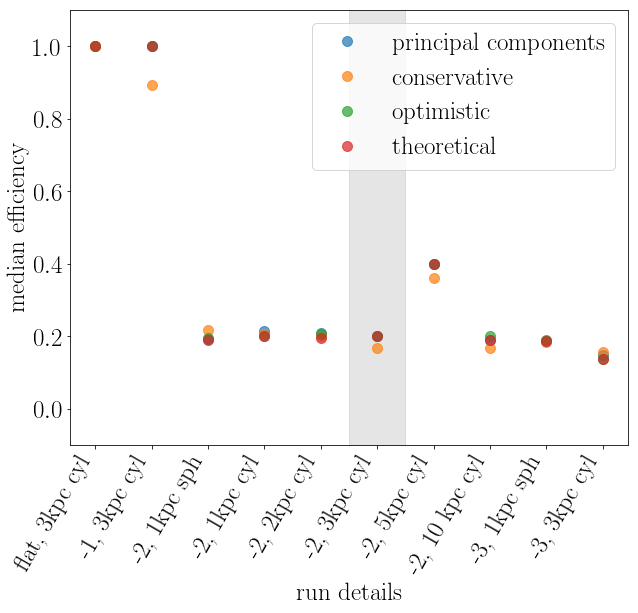

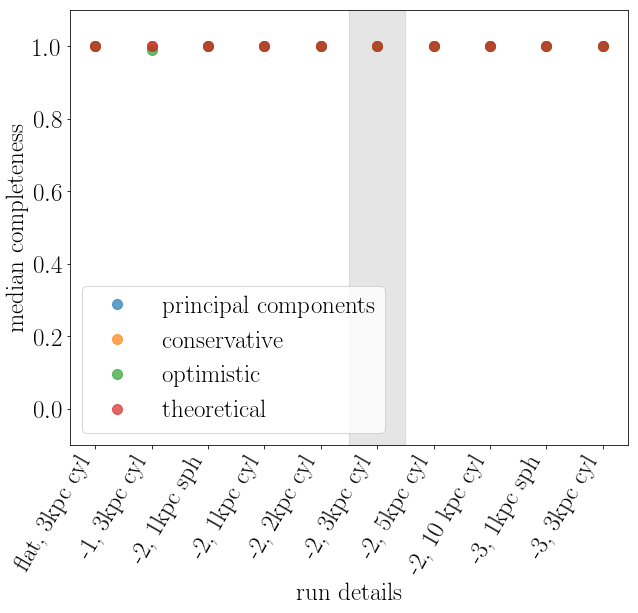

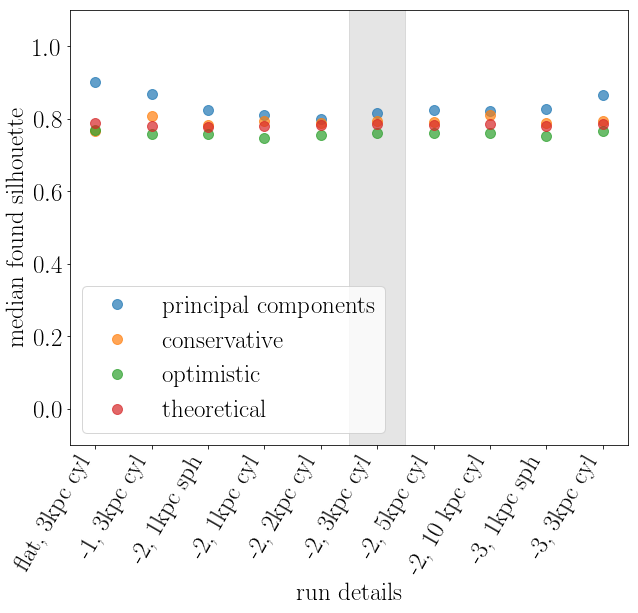

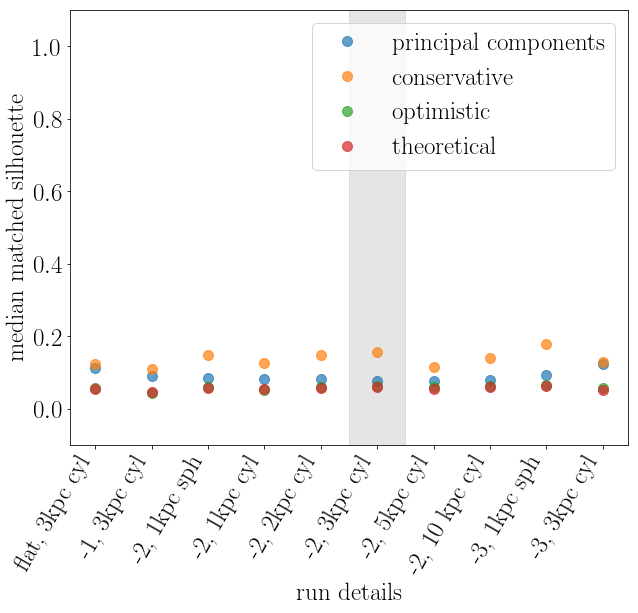

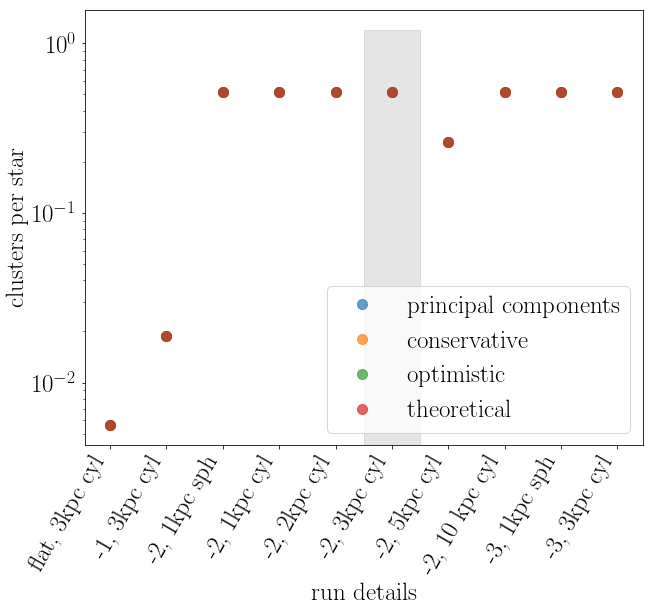

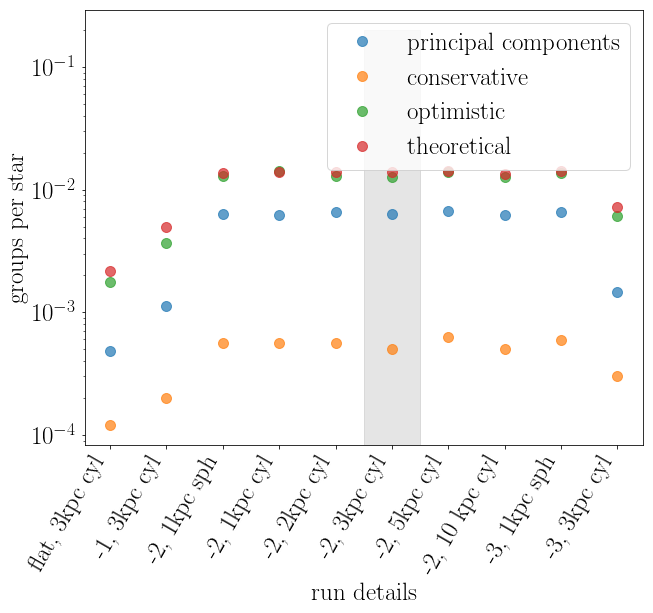

In [65]:
# keys = ['prin30','abun','labn','tabn']
# xticks = np.arange(len(labels))
# figsize=(10,8)
# ms = 10
# alpha = 0.7

# font = {'family': 'serif',
#         'weight': 'normal',
#         'size'  :  25 # Tune this according to personal preference
#         }
# matplotlib.rc('font',**font)
# plt.rc('text', usetex=True)

# labarr = np.array(labels)
# match = np.where(labarr=='-2, 3kpc cyl')[0][0]

# plt.figure(figsize=figsize)
# plt.fill_between(np.array([match-0.5,match+0.5]),-0.2,1.2,color='k',alpha=0.1)
# for key in keys:
#     plt.plot(medeff[key],'o',label=names[key],ms=ms,alpha=alpha)
# legend=plt.legend(loc='best')
# plt.xticks(xticks,labels,rotation=60,horizontalalignment='right')
# plt.ylim(-0.1,1.1)
# plt.ylabel('median efficiency')
# plt.xlabel('run details')

# plt.figure(figsize=figsize)
# plt.fill_between(np.array([match-0.5,match+0.5]),-0.2,1.2,color='k',alpha=0.1)
# for key in keys:
#     plt.plot(medcom[key],'o',label=names[key],ms=ms,alpha=alpha)
# legend=plt.legend(loc='best')
# plt.xticks(xticks,labels,rotation=60,horizontalalignment='right')
# plt.ylim(-0.1,1.1)
# plt.ylabel('median completeness')
# plt.xlabel('run details')

# plt.figure(figsize=figsize)
# plt.fill_between(np.array([match-0.5,match+0.5]),-0.2,1.2,color='k',alpha=0.1)
# for key in keys:
#     plt.plot(medfsi[key],'o',label=names[key],ms=ms,alpha=alpha)
# legend=plt.legend(loc='best')
# plt.xticks(xticks,labels,rotation=60,horizontalalignment='right')
# plt.ylim(-0.1,1.1)
# plt.ylabel('median found silhouette')
# plt.xlabel('run details')

# plt.figure(figsize=figsize)
# plt.fill_between(np.array([match-0.5,match+0.5]),-0.2,1.2,color='k',alpha=0.1)
# for key in keys:
#     plt.plot(medmsi[key],'o',label=names[key],ms=ms,alpha=alpha)
# legend=plt.legend(loc='best')
# plt.xticks(xticks,labels,rotation=60,horizontalalignment='right')
# plt.ylim(-0.1,1.1)
# plt.ylabel('median matched silhouette')
# plt.xlabel('run details')

# plt.figure(figsize=figsize)
# plt.fill_between(np.array([match-0.5,match+0.5]),0,1.2,color='k',alpha=0.1)
# ax = plt.subplot(111)
# ax.set_yscale('log')
# for key in keys:
#     plt.plot(numc[key],'o',label=names[key],ms=ms,alpha=alpha)
# legend=plt.legend(loc='best')
# plt.xticks(xticks,labels,rotation=60,horizontalalignment='right')
# plt.ylabel('clusters per star')
# plt.xlabel('run details')

# plt.figure(figsize=figsize)
# plt.fill_between(np.array([match-0.5,match+0.5]),0,0.2,color='k',alpha=0.1)
# ax = plt.subplot(111)
# ax.set_yscale('log')
# for key in keys:
#     plt.plot(numg[key],'o',label=names[key],ms=ms,alpha=alpha)
# legend=plt.legend(loc='best')
# plt.xticks(xticks,labels,rotation=60,horizontalalignment='right')
# plt.ylabel('groups per star')
# plt.xlabel('run details')


## FLAT CMF

principal components: Number of stars: 50064, number of clusters: 280 stars grouped: 4414, number of groups: 24
theoretical: Number of stars: 50064, number of clusters: 280 stars grouped: 21504, number of groups: 109
optimistic: Number of stars: 50064, number of clusters: 280 stars grouped: 17840, number of groups: 89
conservative: Number of stars: 50064, number of clusters: 280 stars grouped: 1381, number of groups: 6
unmodified: Number of stars: 50064, number of clusters: 280 stars grouped: 0, number of groups: 0


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


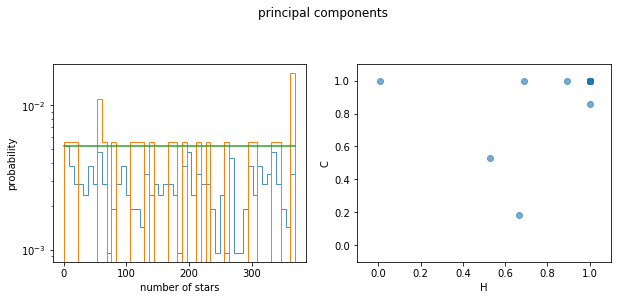

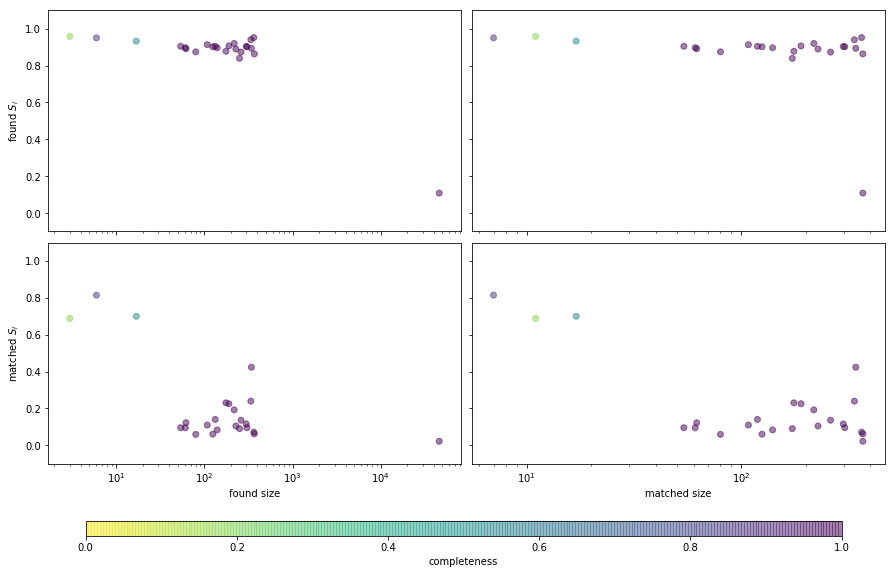

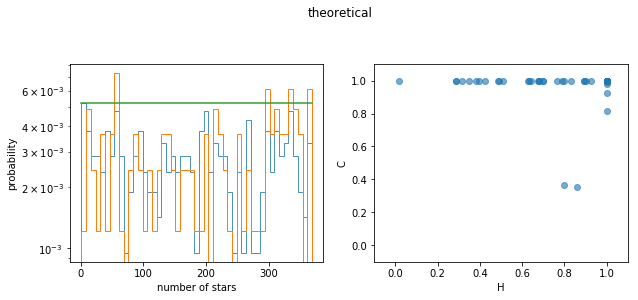

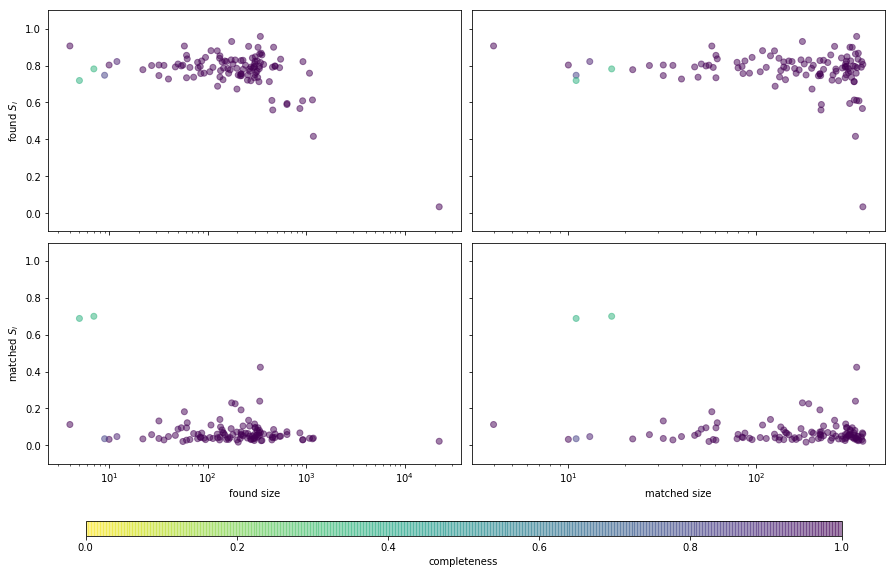

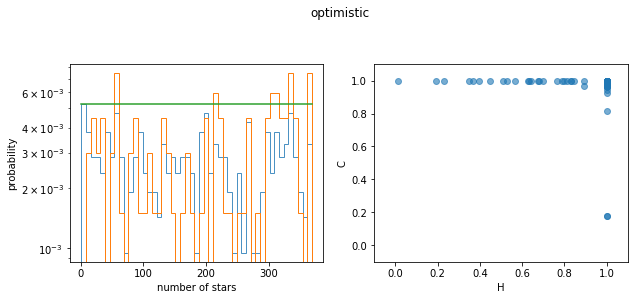

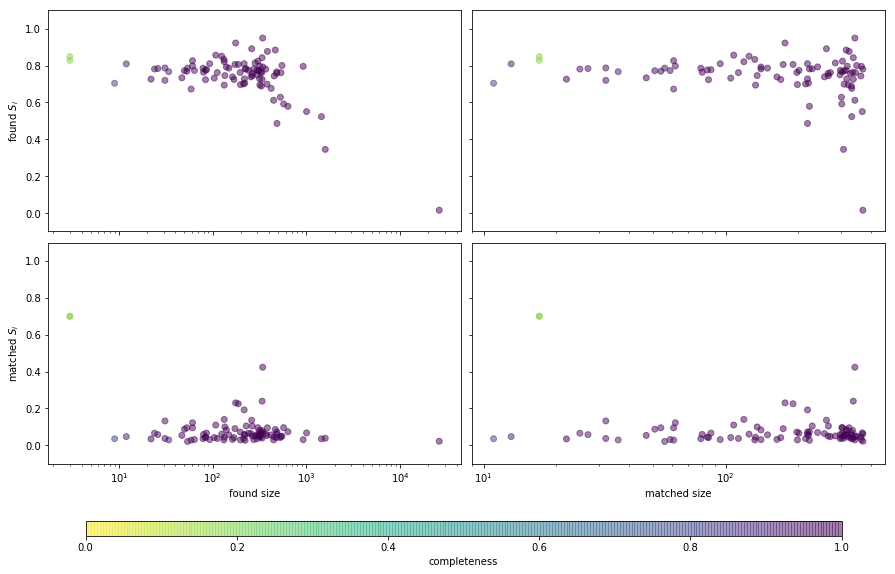

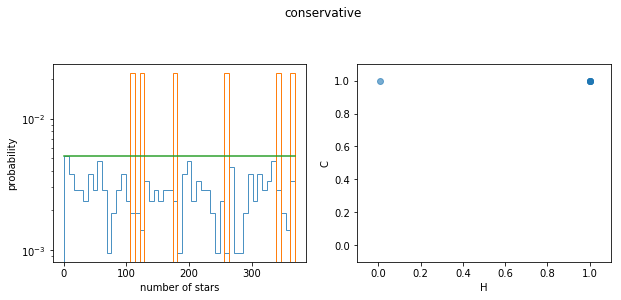

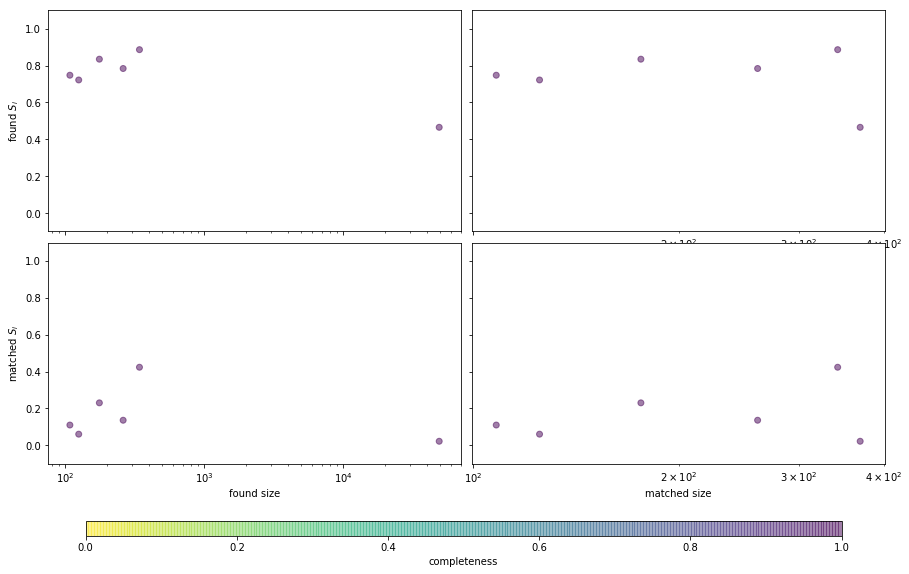

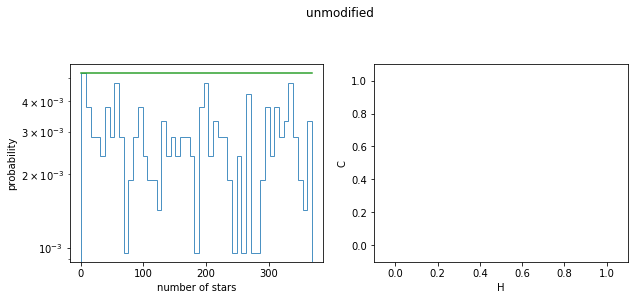

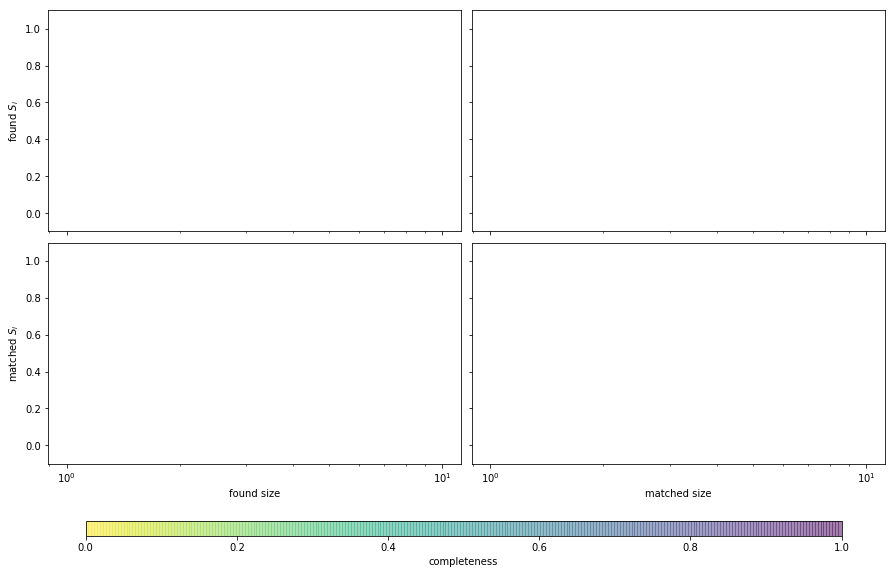

In [65]:
d = read_results(datatype='spec',case='A',timestamp='2018-09-23.12.39.50.21121')
ind = 0
d.read_base_data()
d.read_run_data(eps=0.15,min_sample=3,update=True,datatype='prin30')
makeplots(d,'prin30',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='tabn')
makeplots(d,'tabn',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='labn')
makeplots(d,'labn',ind)
d.read_run_data(eps=0.3,min_sample=3,update=True,datatype='abun')
makeplots(d,'abun',ind)
d.read_run_data(eps=0.75,min_sample=3,update=True,datatype='spec')
makeplots(d,'spec',ind)

## CMF SLOPE -1

principal components: Number of stars: 50064, number of clusters: 944 stars grouped: 4860, number of groups: 56
theoretical: Number of stars: 50064, number of clusters: 944 stars grouped: 19813, number of groups: 246
optimistic: Number of stars: 50064, number of clusters: 944 stars grouped: 14392, number of groups: 182
conservative: Number of stars: 50064, number of clusters: 944 stars grouped: 874, number of groups: 10
unmodified: Number of stars: 50064, number of clusters: 944 stars grouped: 0, number of groups: 0


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


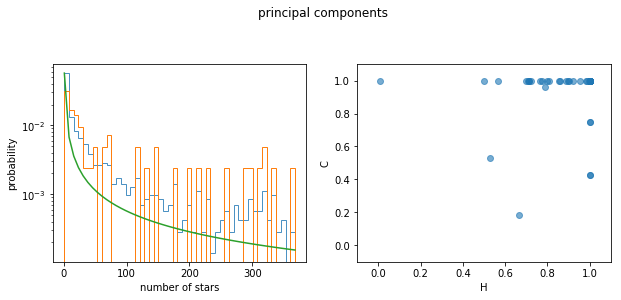

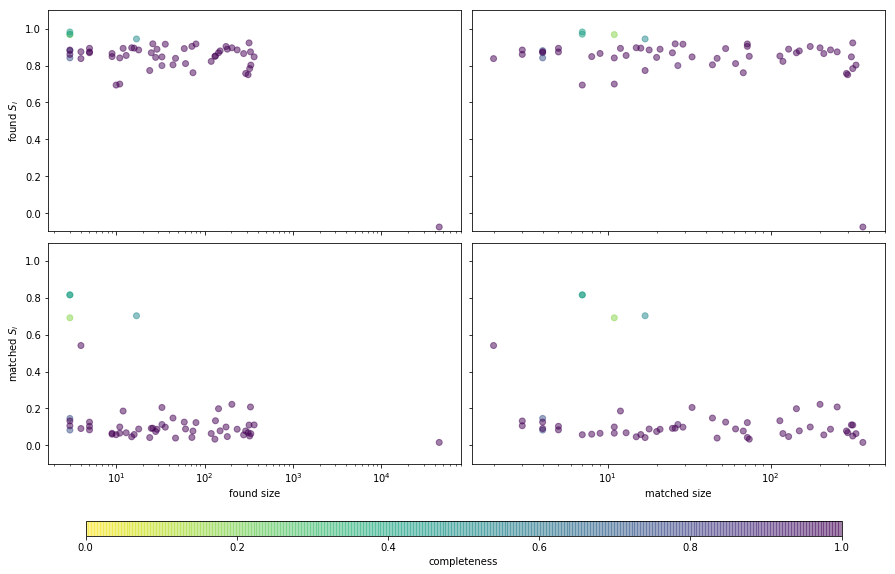

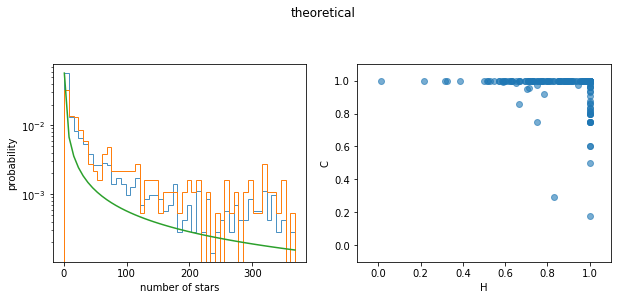

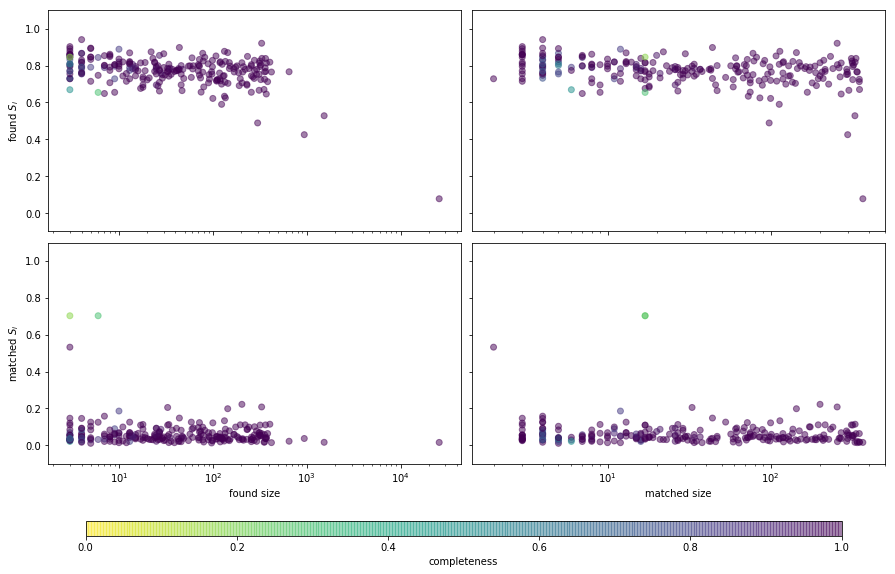

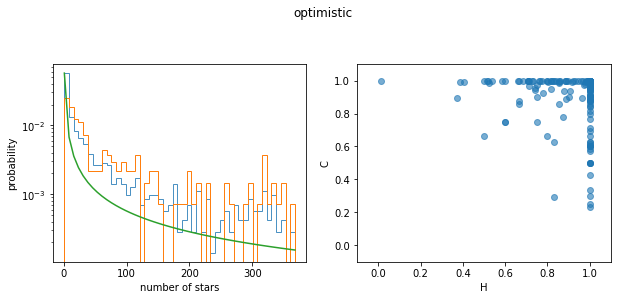

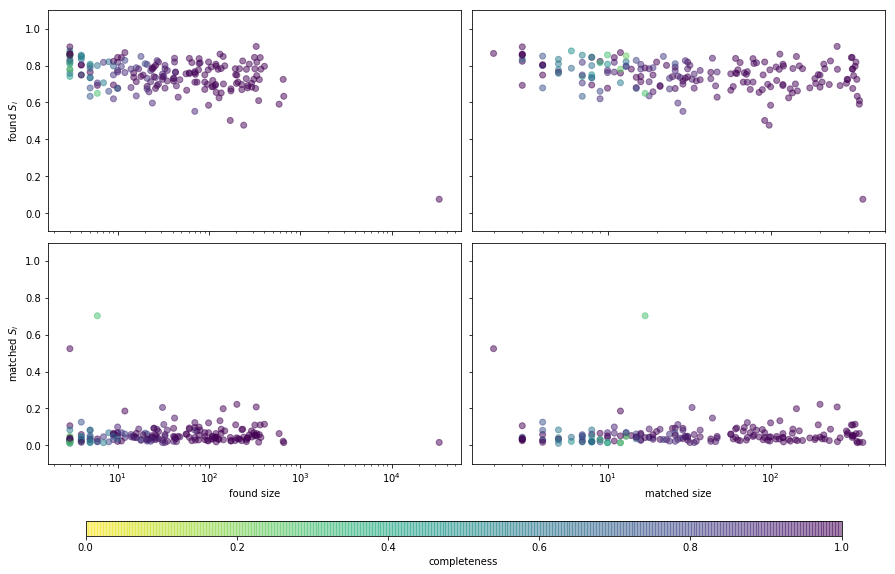

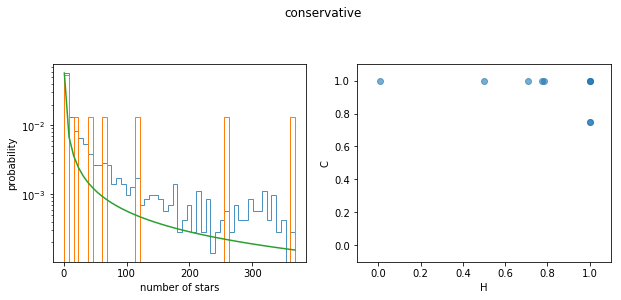

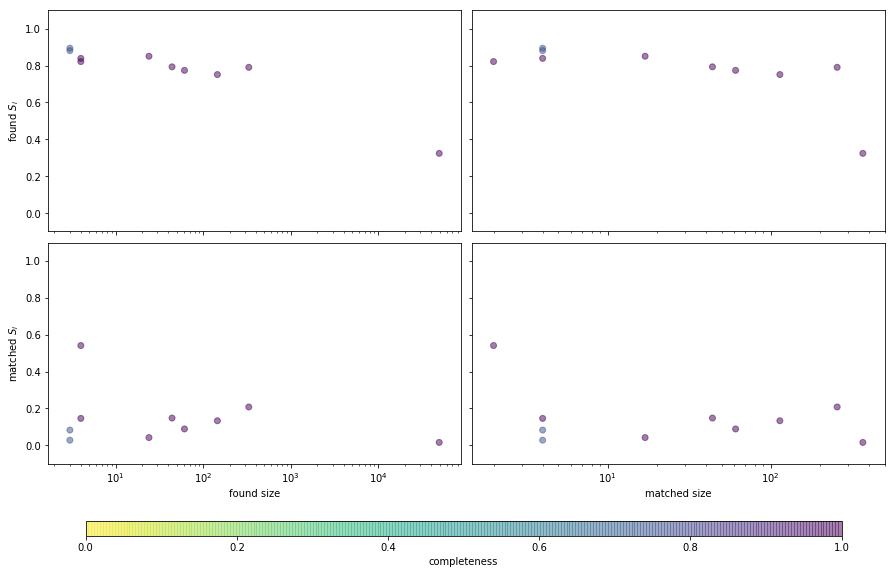

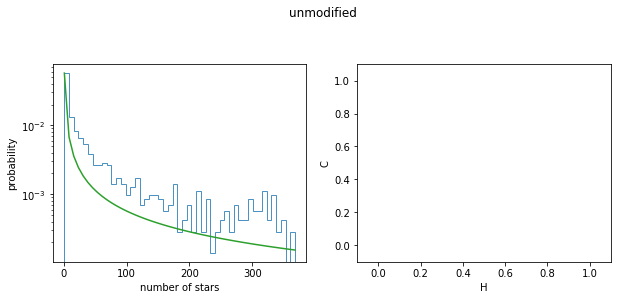

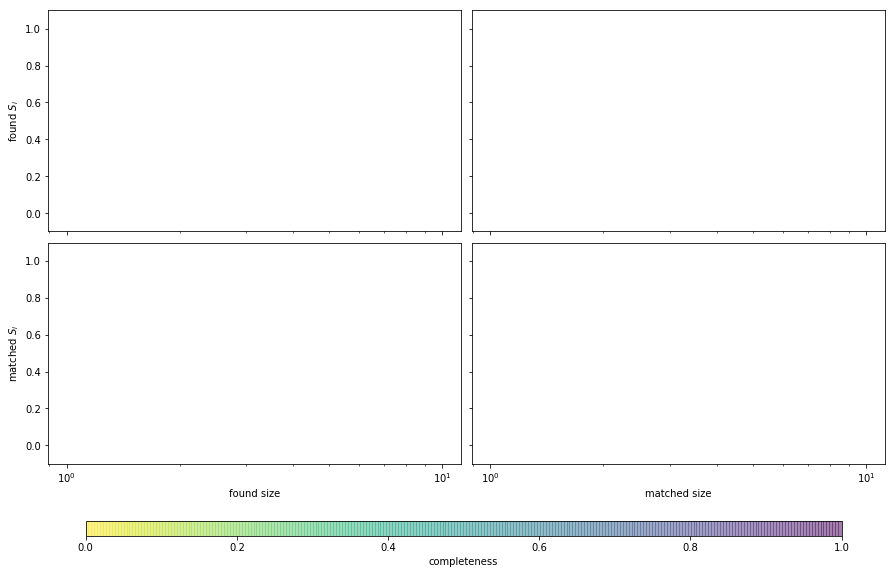

In [66]:
d = read_results(datatype='spec',case='B',timestamp='2018-09-23.15.27.07.474536')
ind = -1
d.read_base_data()
d.read_run_data(eps=0.15,min_sample=3,update=True,datatype='prin30')
makeplots(d,'prin30',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='tabn')
makeplots(d,'tabn',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='labn')
makeplots(d,'labn',ind)
d.read_run_data(eps=0.3,min_sample=3,update=True,datatype='abun')
makeplots(d,'abun',ind)
d.read_run_data(eps=0.75,min_sample=3,update=True,datatype='spec')
makeplots(d,'spec',ind)

## CMF SLOPE -2

principal components: Number of stars: 30064, number of clusters: 6565 stars grouped: 1440, number of groups: 95
theoretical: Number of stars: 30064, number of clusters: 6565 stars grouped: 6583, number of groups: 448
optimistic: Number of stars: 30064, number of clusters: 6565 stars grouped: 5944, number of groups: 456
conservative: Number of stars: 30064, number of clusters: 6565 stars grouped: 475, number of groups: 21
unmodified: Number of stars: 30064, number of clusters: 6565 stars grouped: 0, number of groups: 0


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


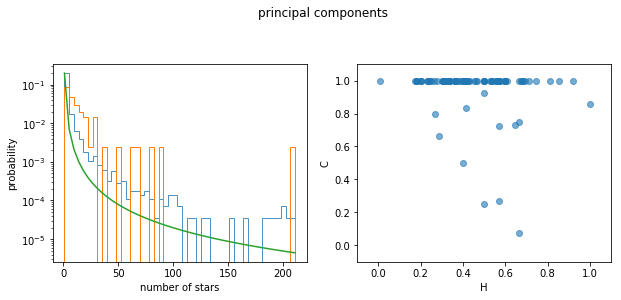

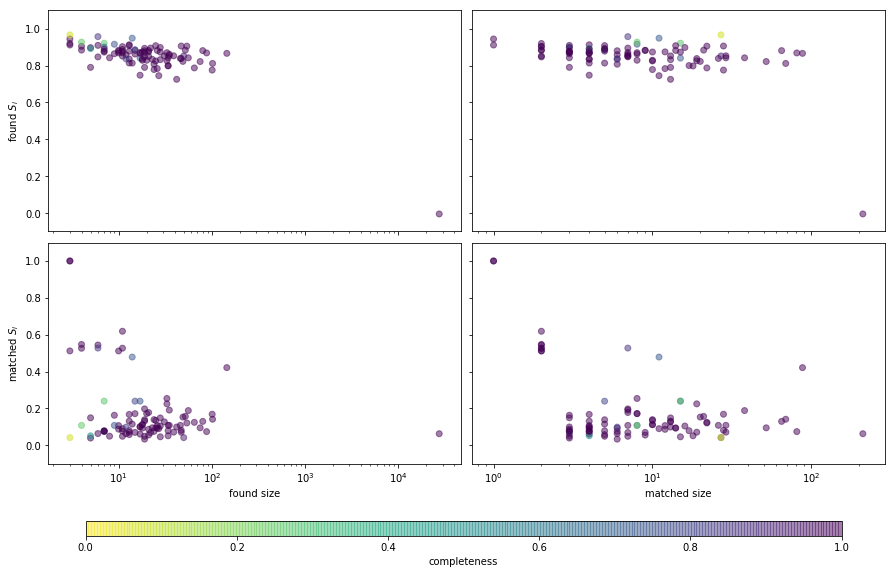

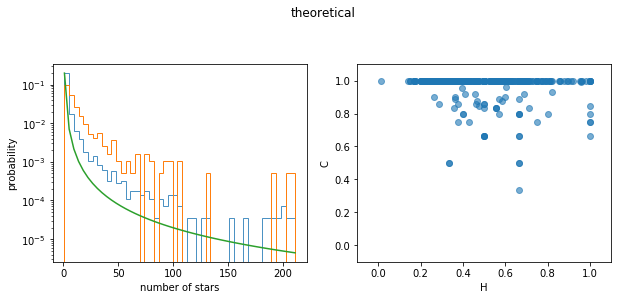

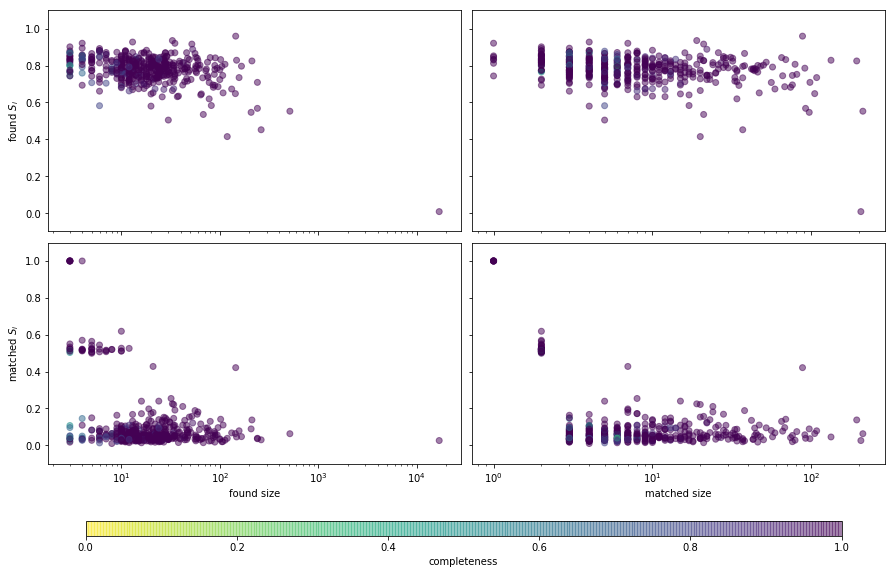

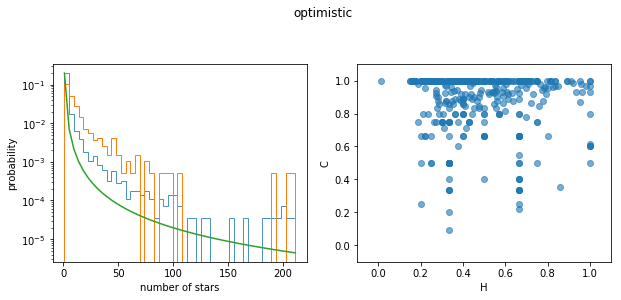

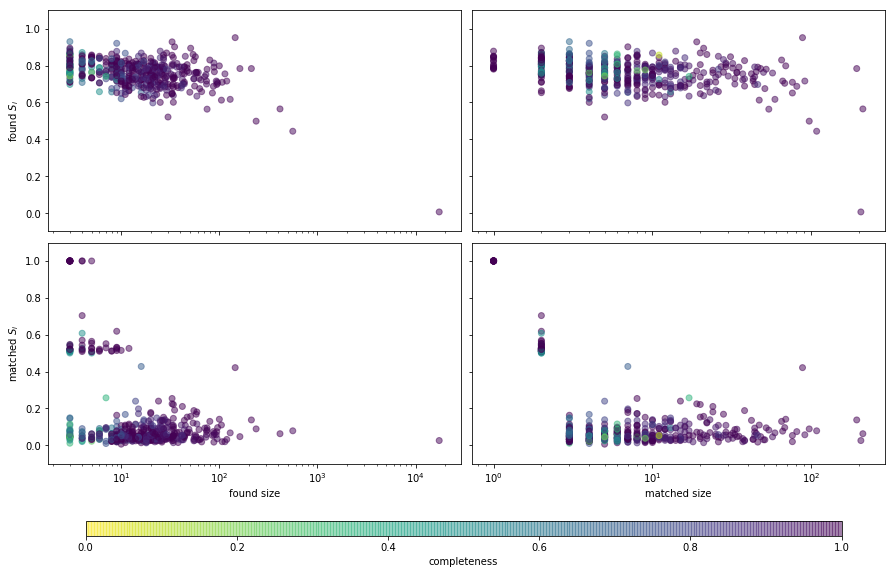

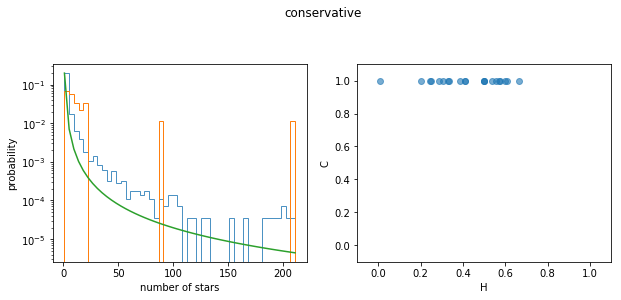

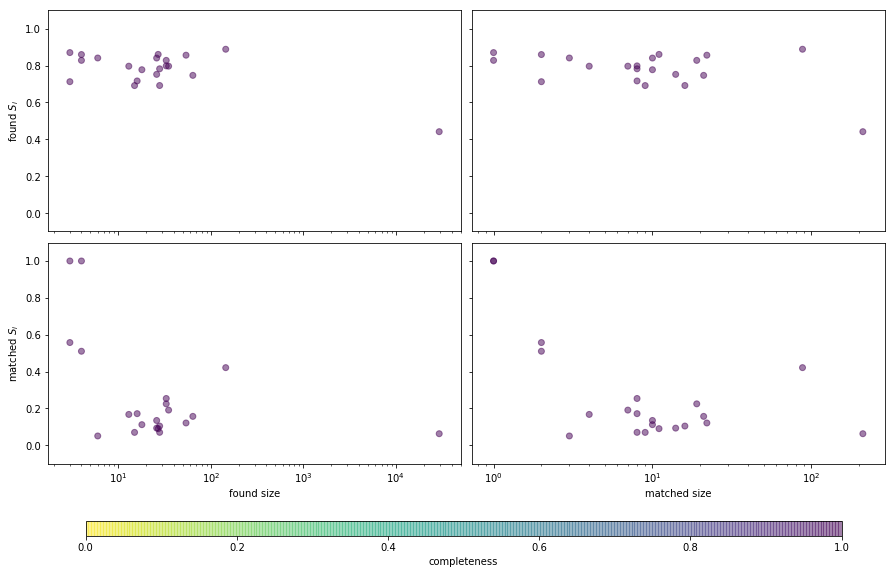

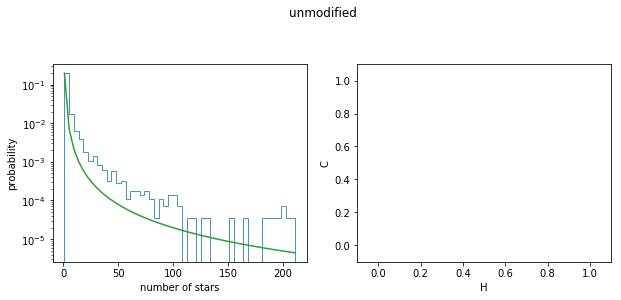

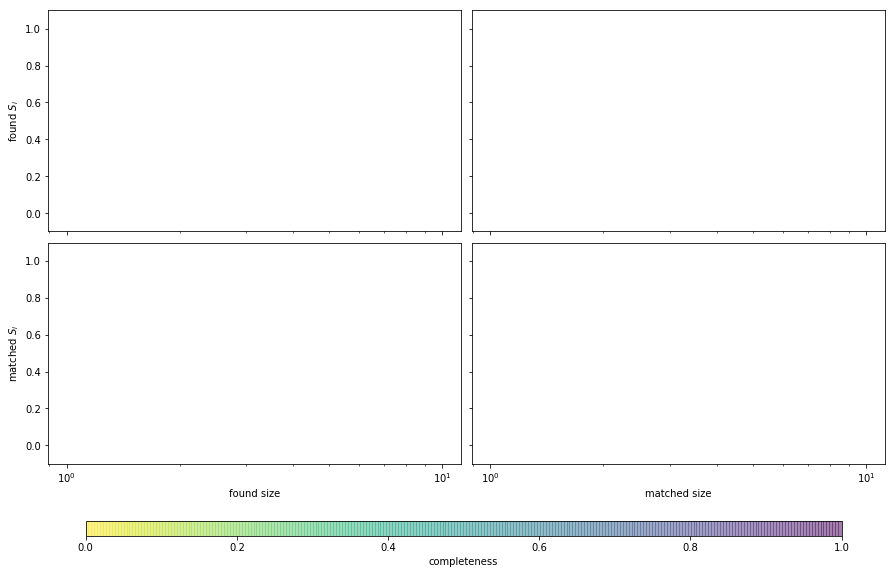

In [67]:
d = read_results(datatype='spec',case='D',timestamp='2018-09-26.15.40.50.870102')
ind = -2
d.read_base_data()
d.read_run_data(eps=0.15,min_sample=3,update=True,datatype='prin30')
makeplots(d,'prin30',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='tabn')
makeplots(d,'tabn',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='labn')
makeplots(d,'labn',ind)
d.read_run_data(eps=0.3,min_sample=3,update=True,datatype='abun')
makeplots(d,'abun',ind)
d.read_run_data(eps=0.75,min_sample=3,update=True,datatype='spec')
makeplots(d,'spec',ind)

## CMF SLOPE -3

principal components: Number of stars: 50064, number of clusters: 25847 stars grouped: 680, number of groups: 73
theoretical: Number of stars: 50064, number of clusters: 25847 stars grouped: 2898, number of groups: 363
optimistic: Number of stars: 50064, number of clusters: 25847 stars grouped: 2333, number of groups: 305
conservative: Number of stars: 50064, number of clusters: 25847 stars grouped: 246, number of groups: 15
unmodified: Number of stars: 50064, number of clusters: 25847 stars grouped: 0, number of groups: 0


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


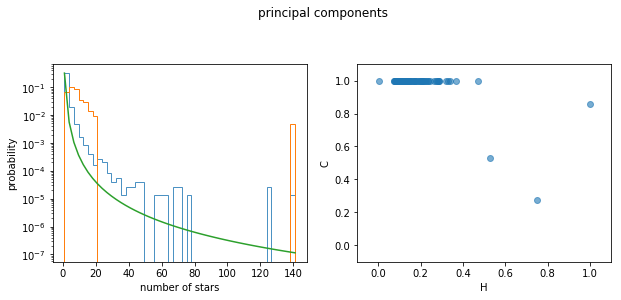

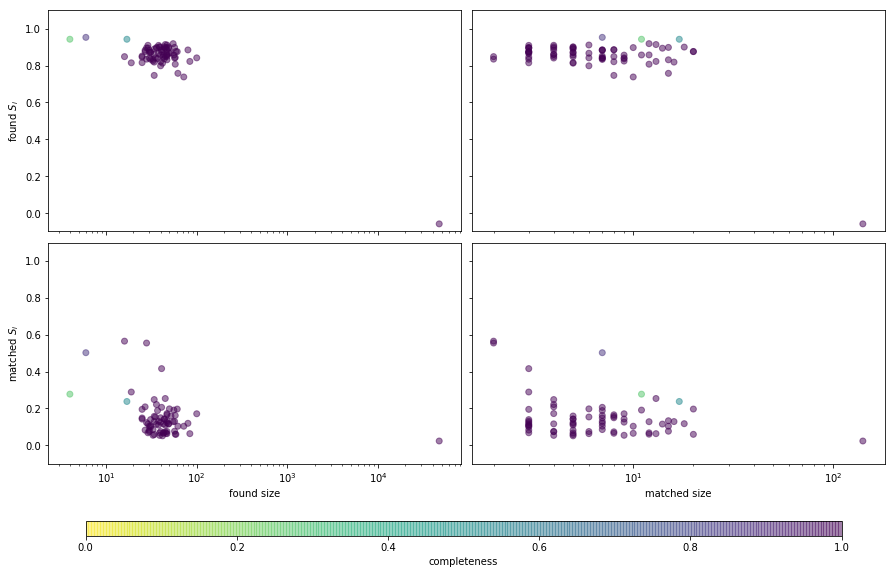

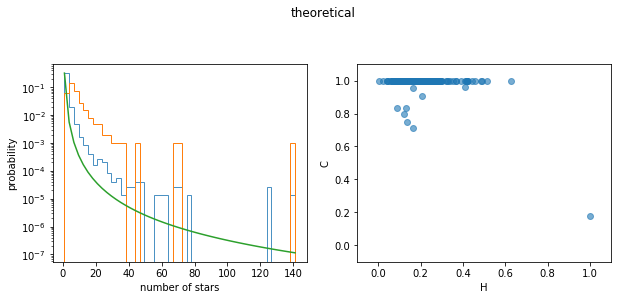

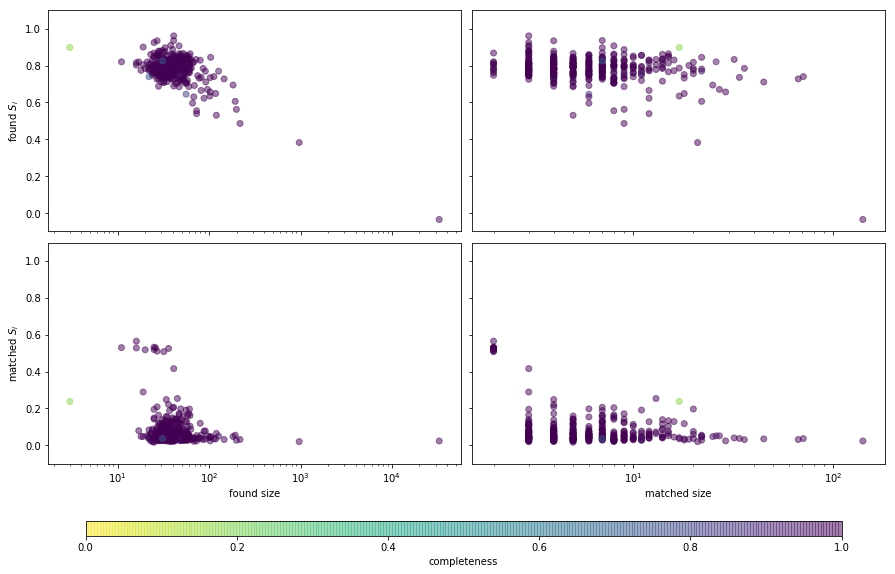

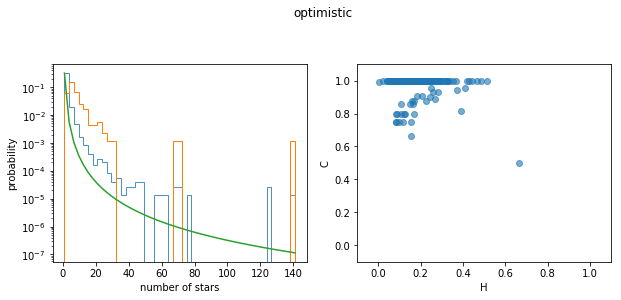

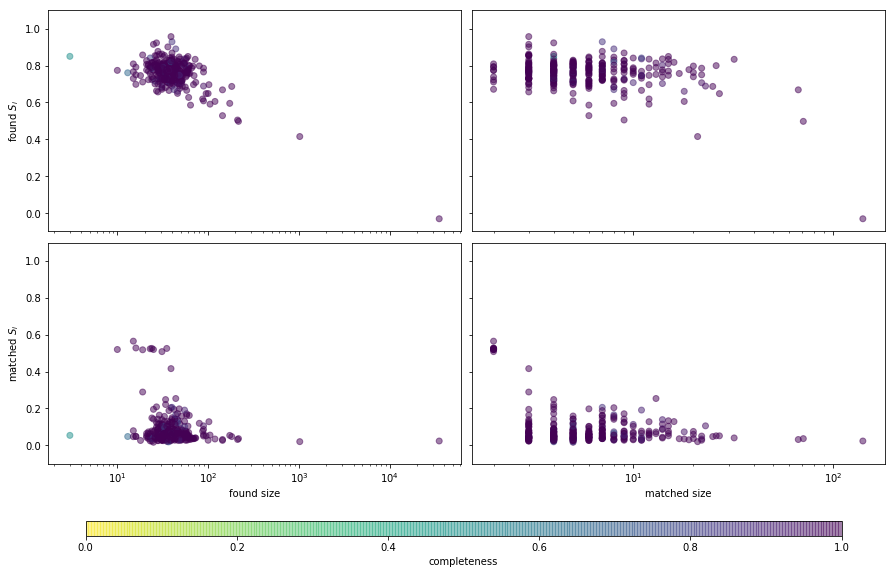

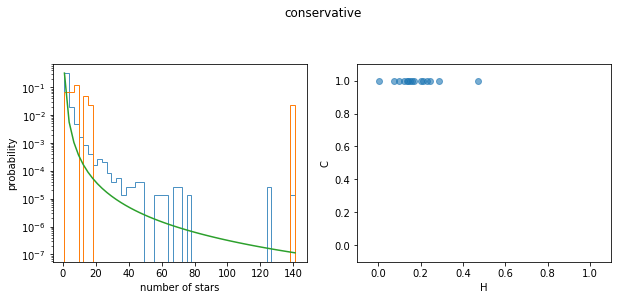

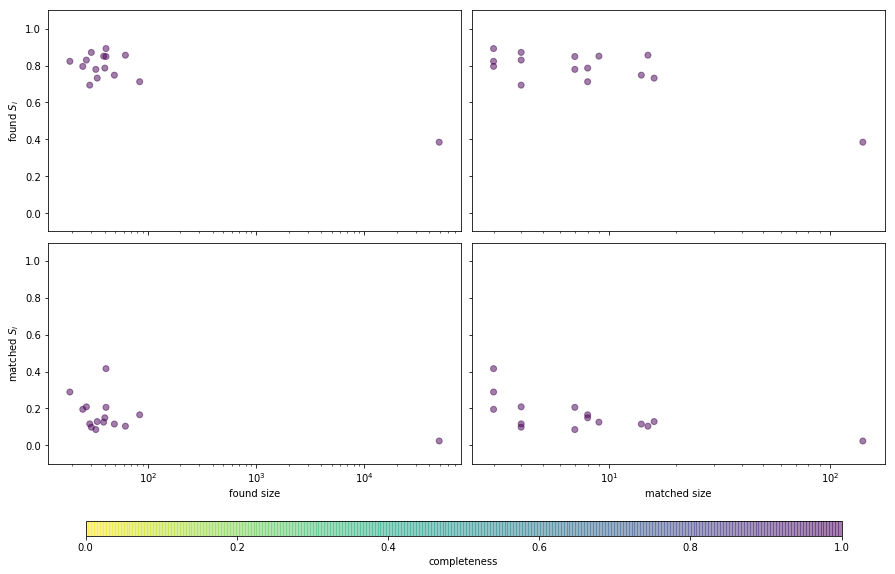

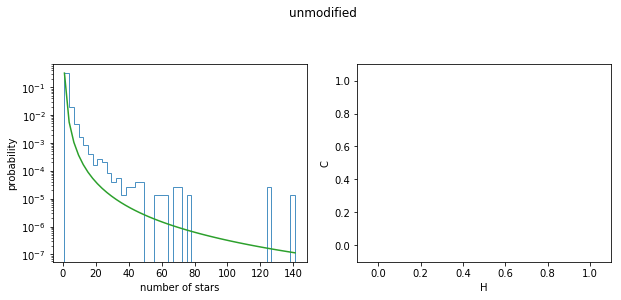

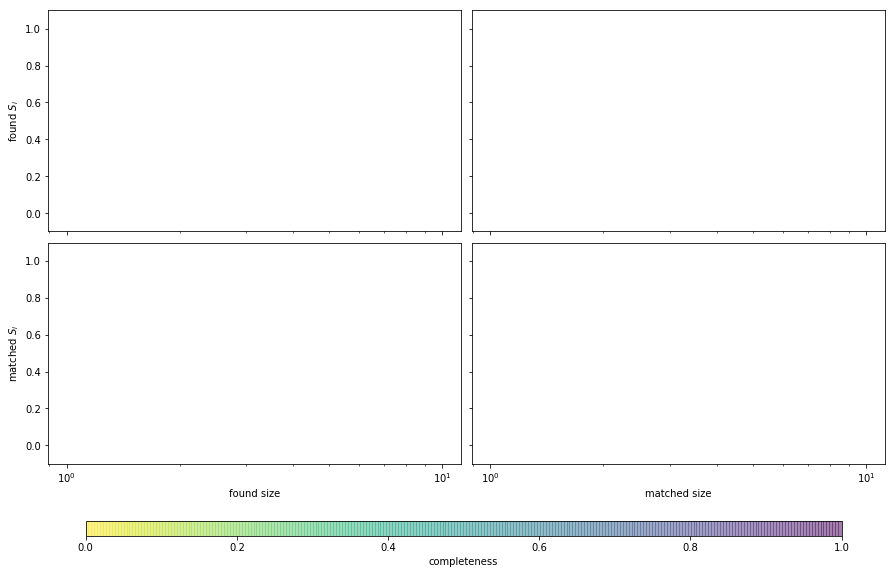

In [68]:
d = read_results(datatype='spec',case='C',timestamp='2018-09-23.16.05.47.430216')
ind = -3
d.read_base_data()
d.read_run_data(eps=0.15,min_sample=3,update=True,datatype='prin30')
makeplots(d,'prin30',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='tabn')
makeplots(d,'tabn',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='labn')
makeplots(d,'labn',ind)
d.read_run_data(eps=0.3,min_sample=3,update=True,datatype='abun')
makeplots(d,'abun',ind)
d.read_run_data(eps=0.75,min_sample=3,update=True,datatype='spec')
makeplots(d,'spec',ind)

## 1KPC SPHERE

principal components: Number of stars: 30064, number of clusters: 4965 stars grouped: 6162, number of groups: 225
theoretical: Number of stars: 30064, number of clusters: 4965 stars grouped: 9790, number of groups: 394
optimistic: Number of stars: 30064, number of clusters: 4965 stars grouped: 9193, number of groups: 368
conservative: Number of stars: 30064, number of clusters: 4965 stars grouped: 2053, number of groups: 21
unmodified: Number of stars: 30064, number of clusters: 4965 stars grouped: 0, number of groups: 0


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


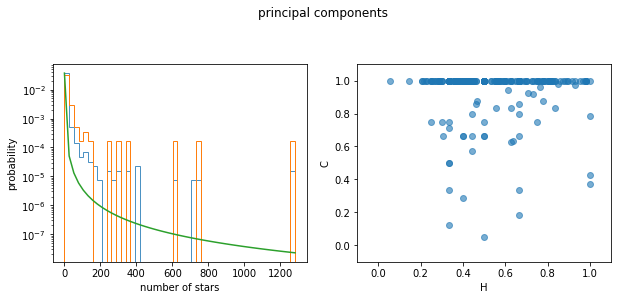

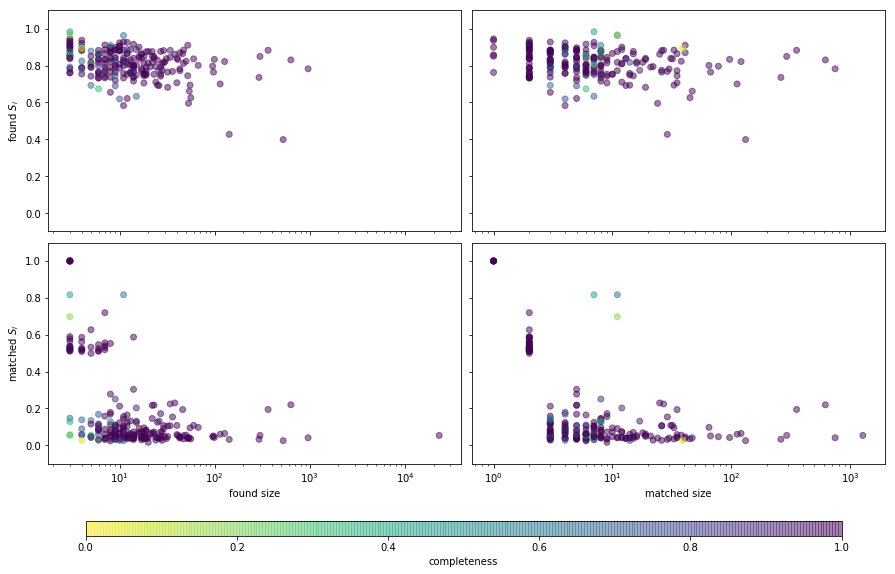

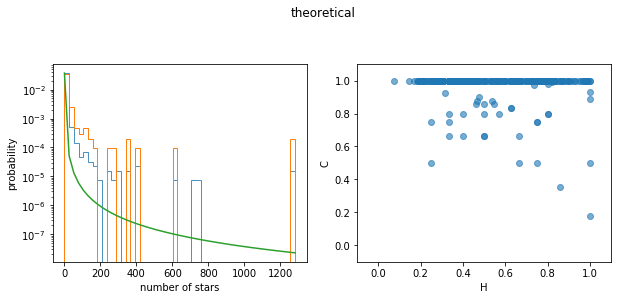

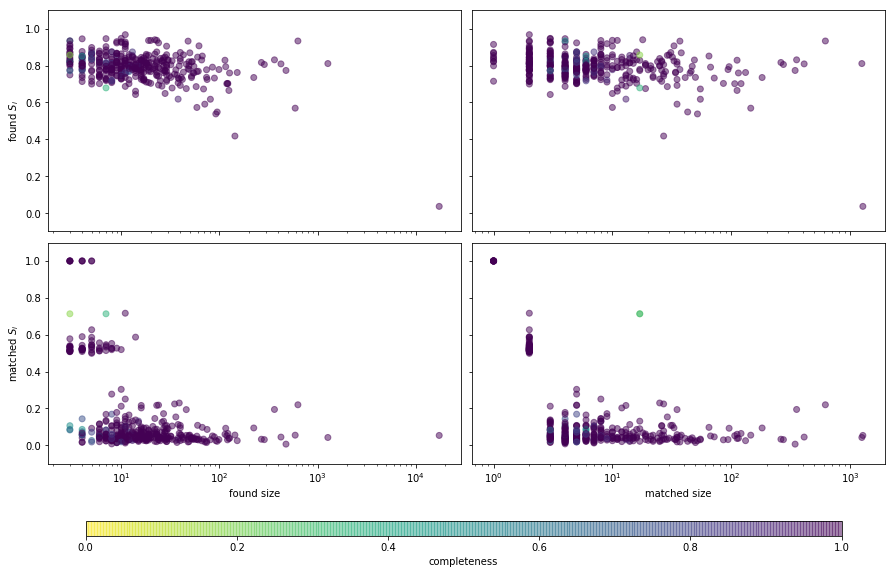

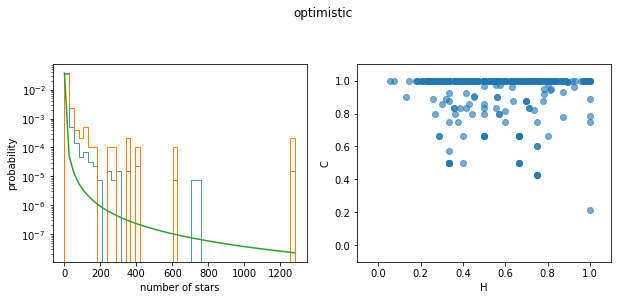

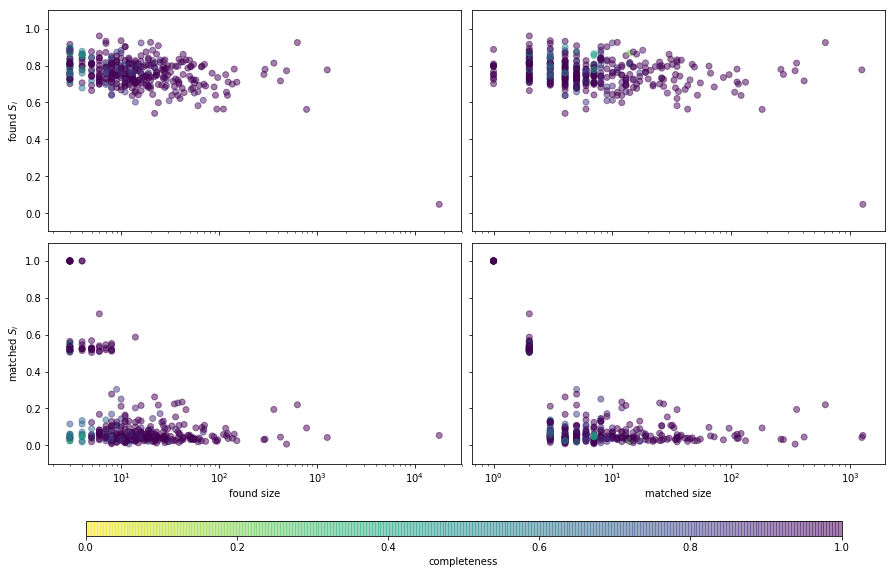

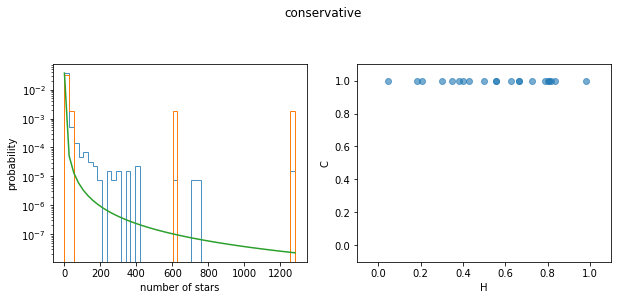

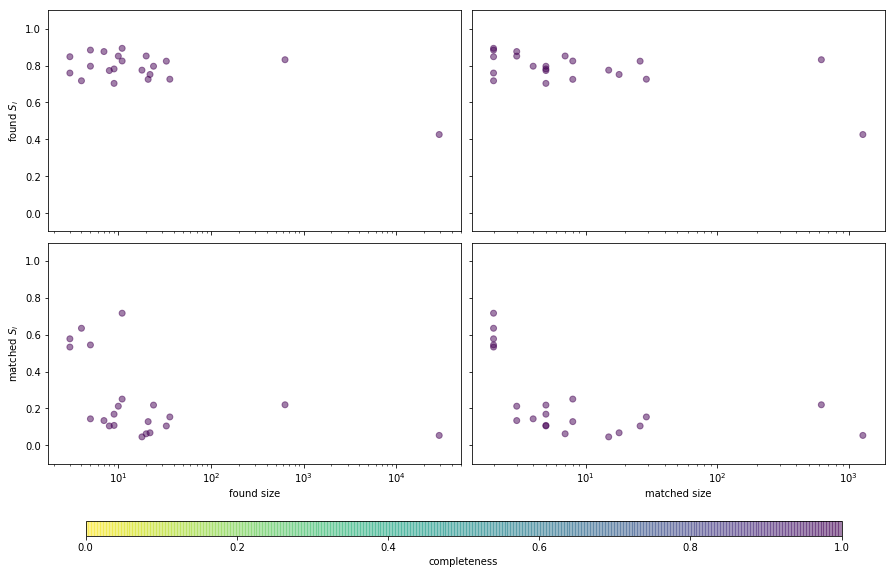

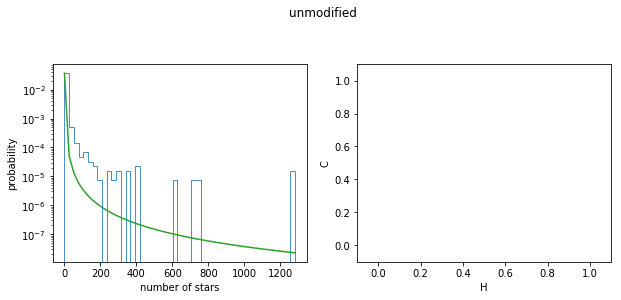

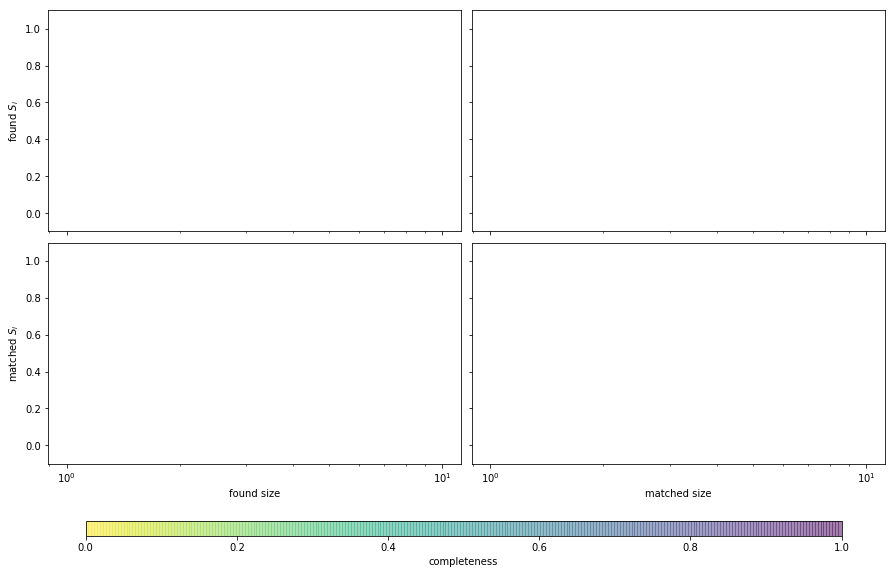

In [69]:
d = read_results(datatype='spec',case='a',timestamp='2018-09-26.17.17.00.443799')
ind = -2
d.read_base_data()
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='prin30')
makeplots(d,'prin30',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='tabn')
makeplots(d,'tabn',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='labn')
makeplots(d,'labn',ind)
d.read_run_data(eps=0.3,min_sample=3,update=True,datatype='abun')
makeplots(d,'abun',ind)
d.read_run_data(eps=0.8,min_sample=3,update=True,datatype='spec')
makeplots(d,'spec',ind)

## 1KPC CYLINDER

principal components: Number of stars: 30064, number of clusters: 4997 stars grouped: 4205, number of groups: 173
theoretical: Number of stars: 30064, number of clusters: 4997 stars grouped: 9966, number of groups: 431
optimistic: Number of stars: 30064, number of clusters: 4997 stars grouped: 9444, number of groups: 411
conservative: Number of stars: 30064, number of clusters: 4997 stars grouped: 2060, number of groups: 19
unmodified: Number of stars: 30064, number of clusters: 4997 stars grouped: 0, number of groups: 0


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


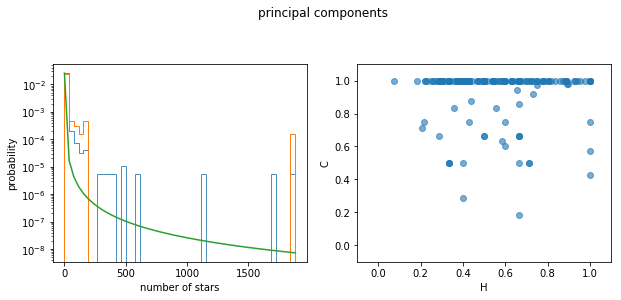

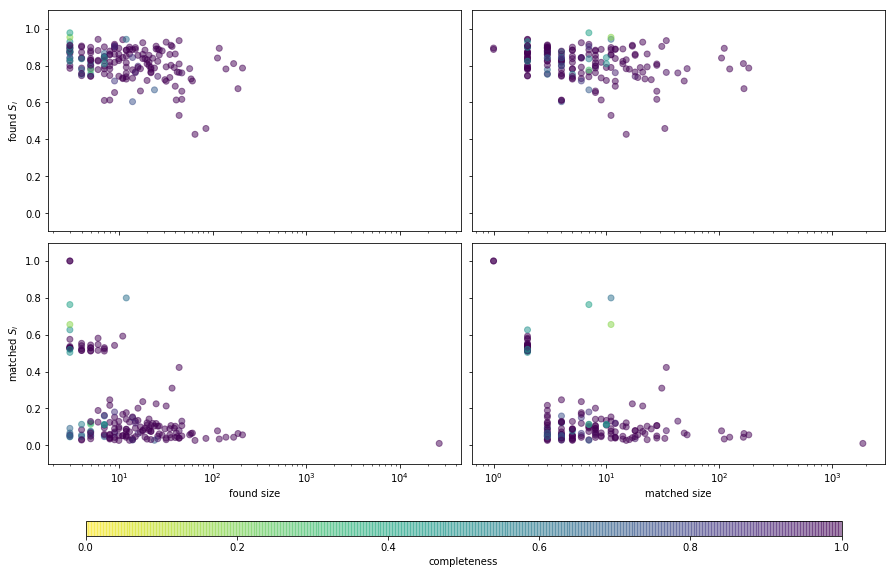

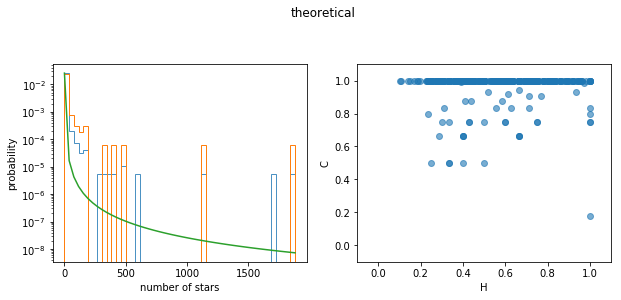

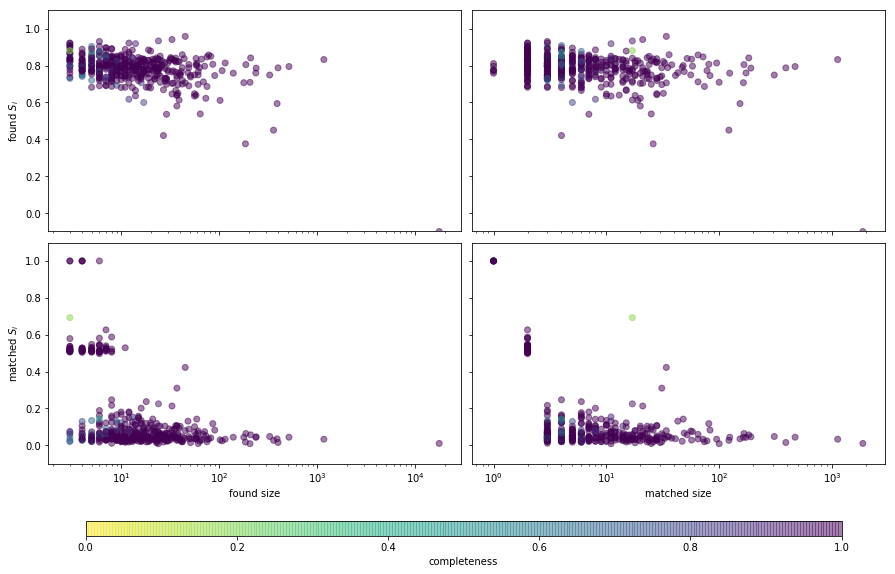

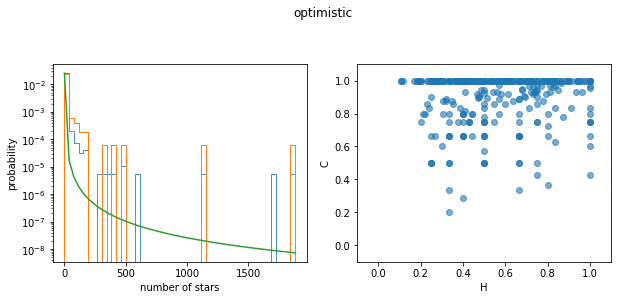

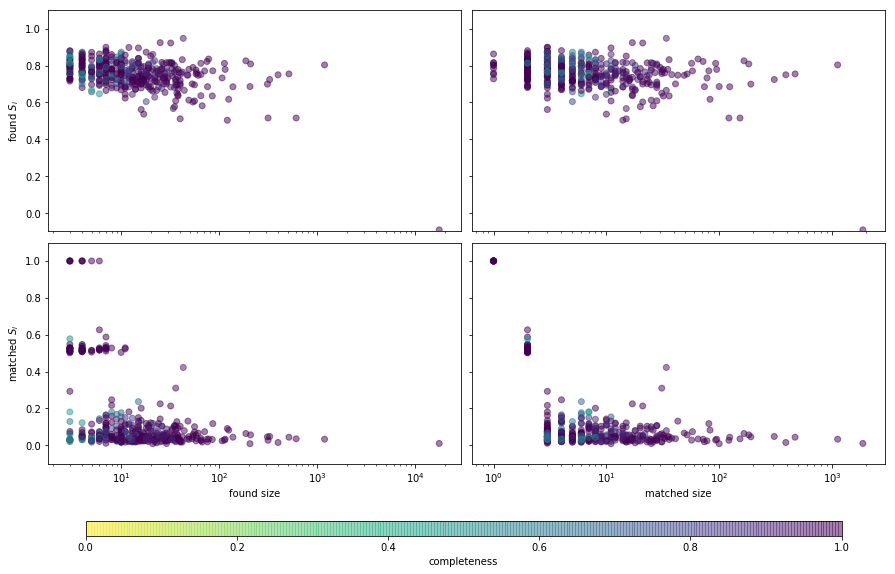

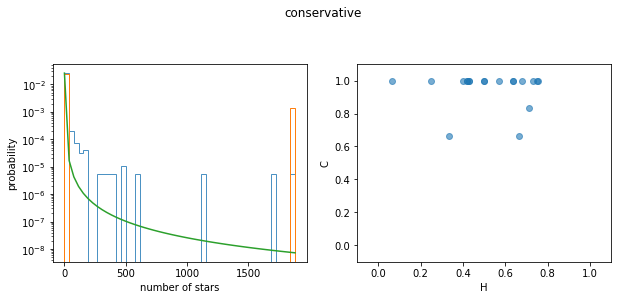

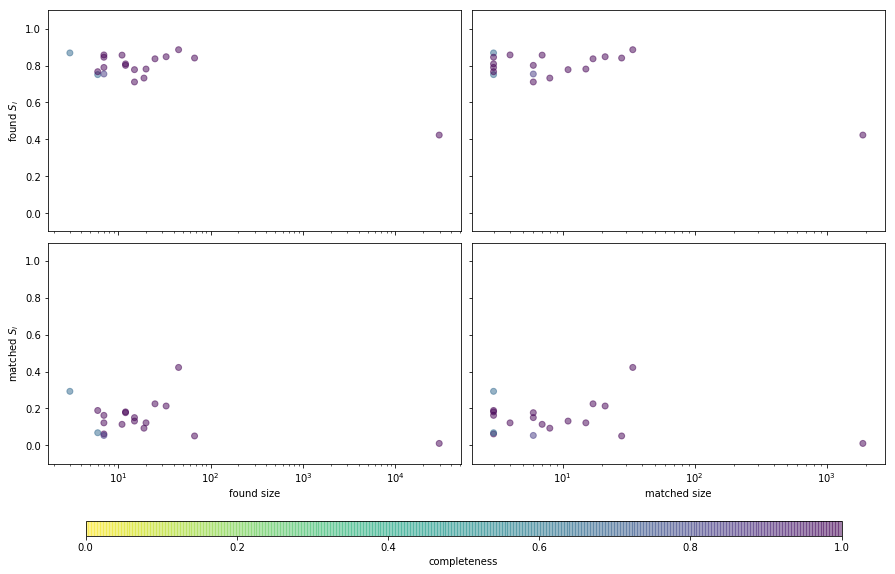

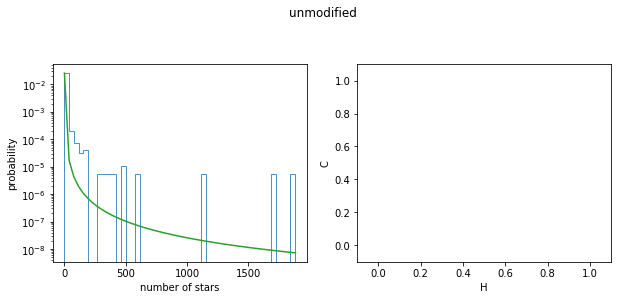

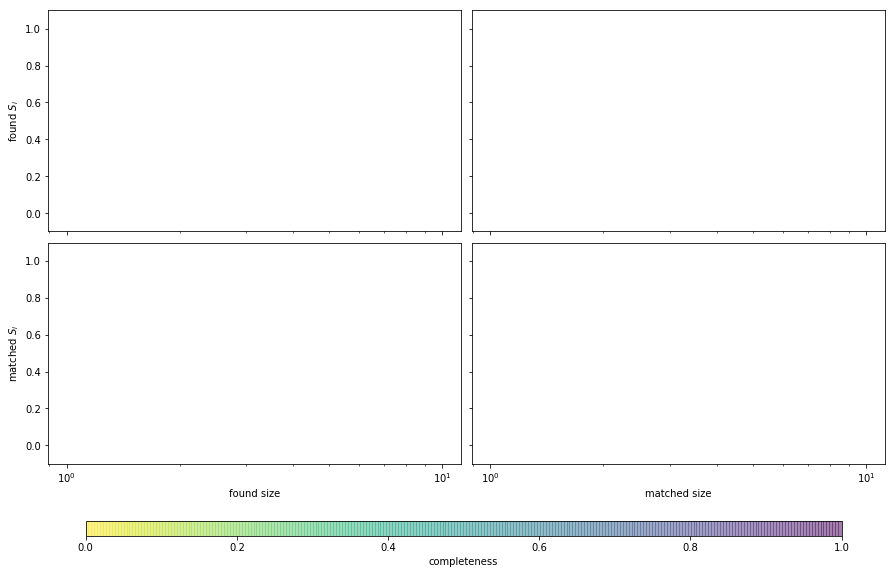

In [70]:
d = read_results(datatype='spec',case='b',timestamp='2018-09-26.17.38.42.257901')
ind = -2
d.read_base_data()
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='prin30')
makeplots(d,'prin30',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='tabn')
makeplots(d,'tabn',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='labn')
makeplots(d,'labn',ind)
d.read_run_data(eps=0.3,min_sample=3,update=True,datatype='abun')
makeplots(d,'abun',ind)
d.read_run_data(eps=0.8,min_sample=3,update=True,datatype='spec')
makeplots(d,'spec',ind)

## 2KPC CYLINDER

principal components: Number of stars: 30064, number of clusters: 6184 stars grouped: 3530, number of groups: 223
theoretical: Number of stars: 30064, number of clusters: 6184 stars grouped: 7658, number of groups: 456
optimistic: Number of stars: 30064, number of clusters: 6184 stars grouped: 7096, number of groups: 457
conservative: Number of stars: 30064, number of clusters: 6184 stars grouped: 585, number of groups: 22
unmodified: Number of stars: 30064, number of clusters: 6184 stars grouped: 0, number of groups: 0


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


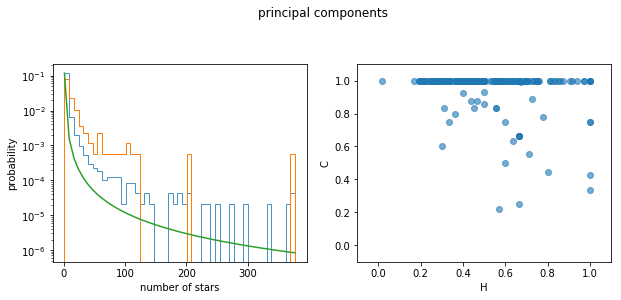

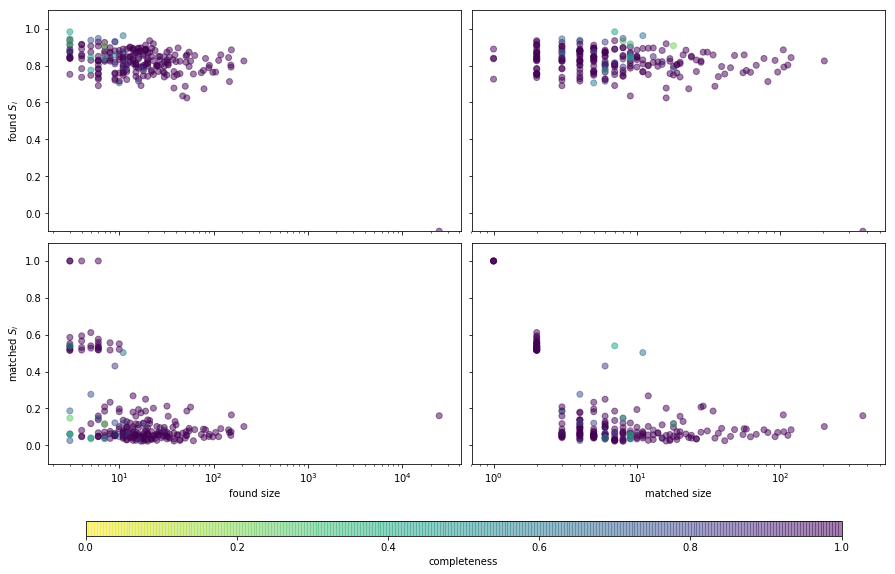

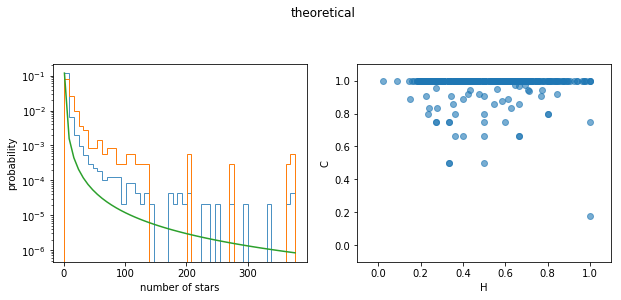

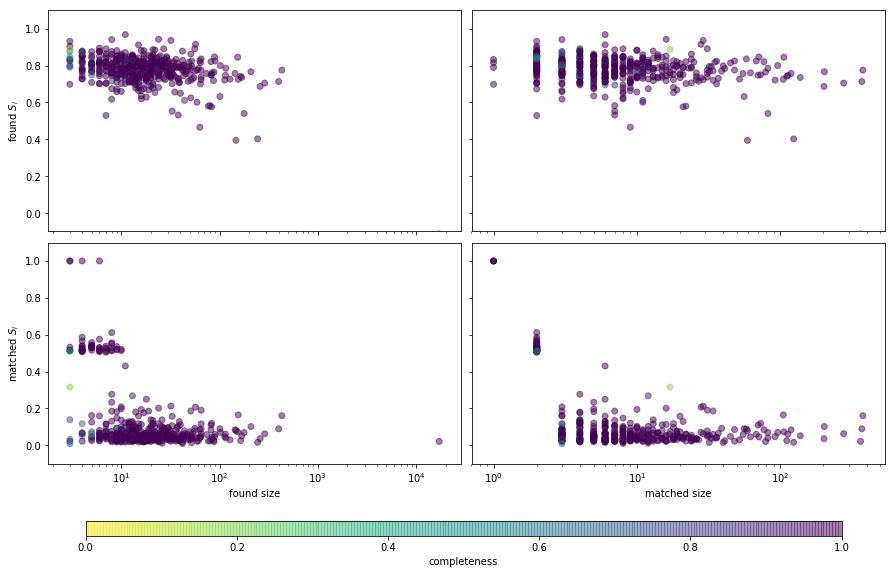

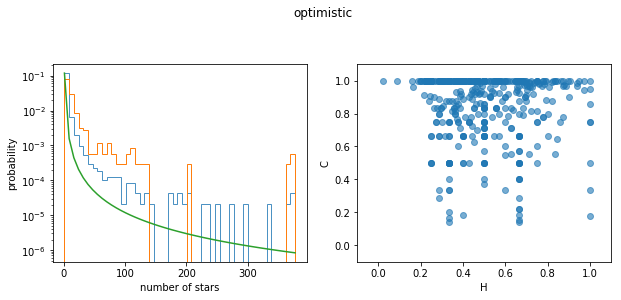

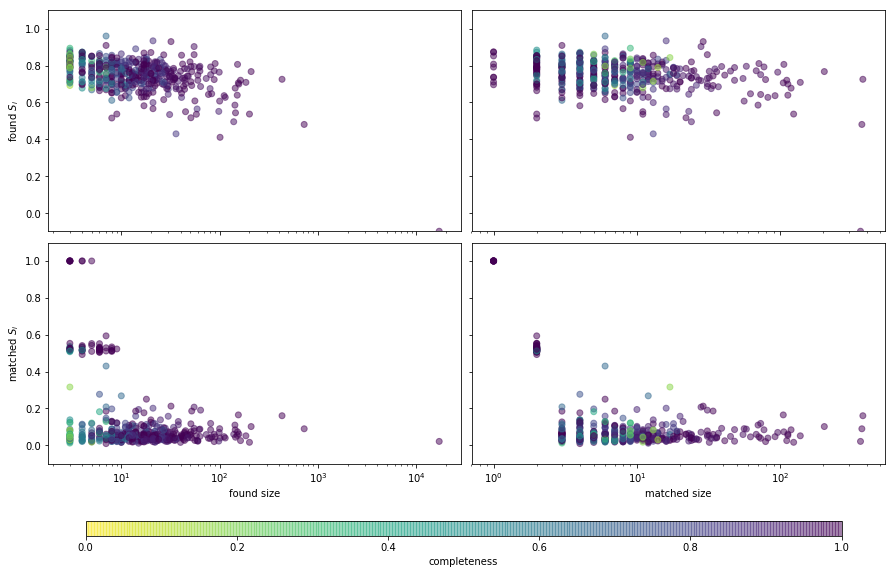

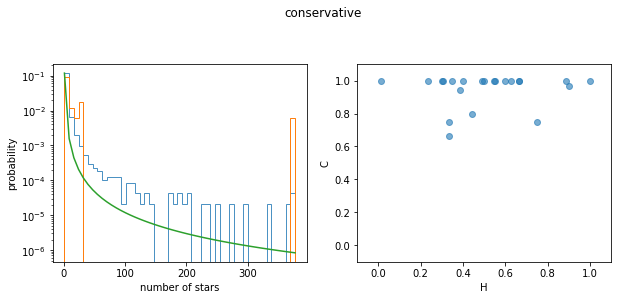

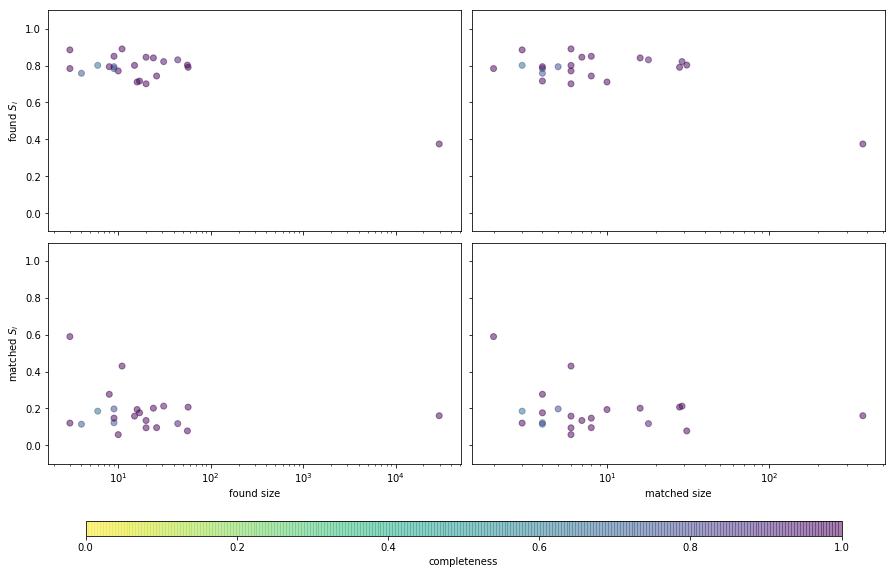

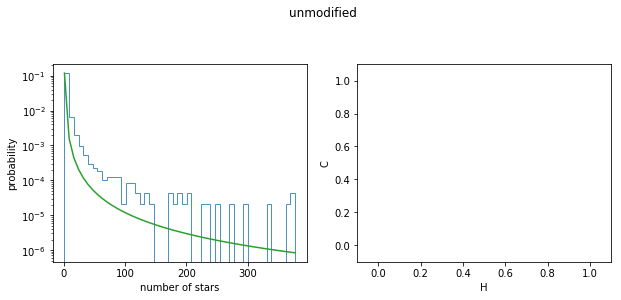

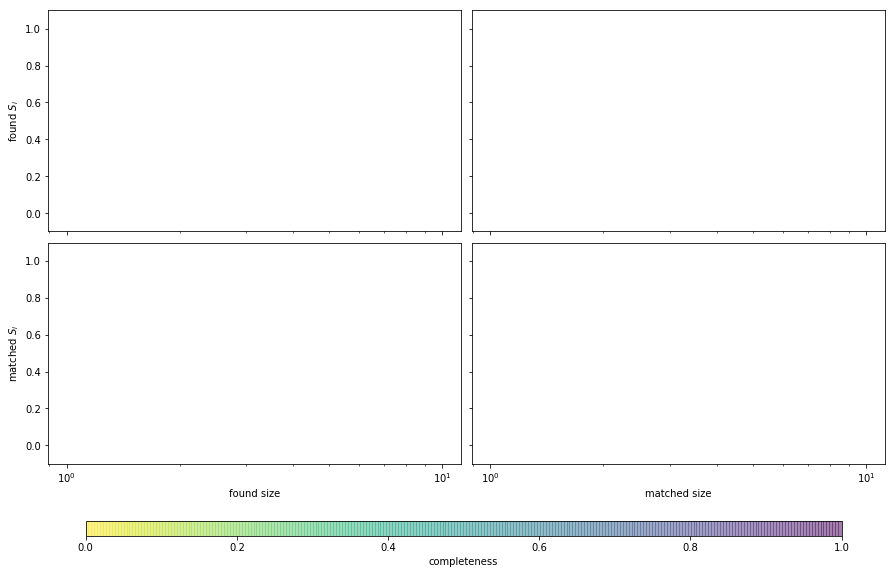

In [71]:
d = read_results(datatype='spec',case='c',timestamp='2018-09-26.17.51.46.841577')
ind = -2
d.read_base_data()
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='prin30')
makeplots(d,'prin30',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='tabn')
makeplots(d,'tabn',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='labn')
makeplots(d,'labn',ind)
d.read_run_data(eps=0.3,min_sample=3,update=True,datatype='abun')
makeplots(d,'abun',ind)
d.read_run_data(eps=0.8,min_sample=3,update=True,datatype='spec')
makeplots(d,'spec',ind)

## 5KPC CYLINDER

principal components: Number of stars: 30064, number of clusters: 7838 stars grouped: 2477, number of groups: 201
theoretical: Number of stars: 30064, number of clusters: 7838 stars grouped: 5455, number of groups: 427
optimistic: Number of stars: 30064, number of clusters: 7838 stars grouped: 4961, number of groups: 419
conservative: Number of stars: 30064, number of clusters: 7838 stars grouped: 394, number of groups: 19
unmodified: Number of stars: 30064, number of clusters: 7838 stars grouped: 0, number of groups: 0


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


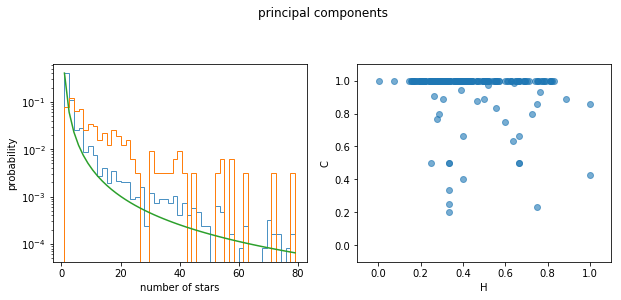

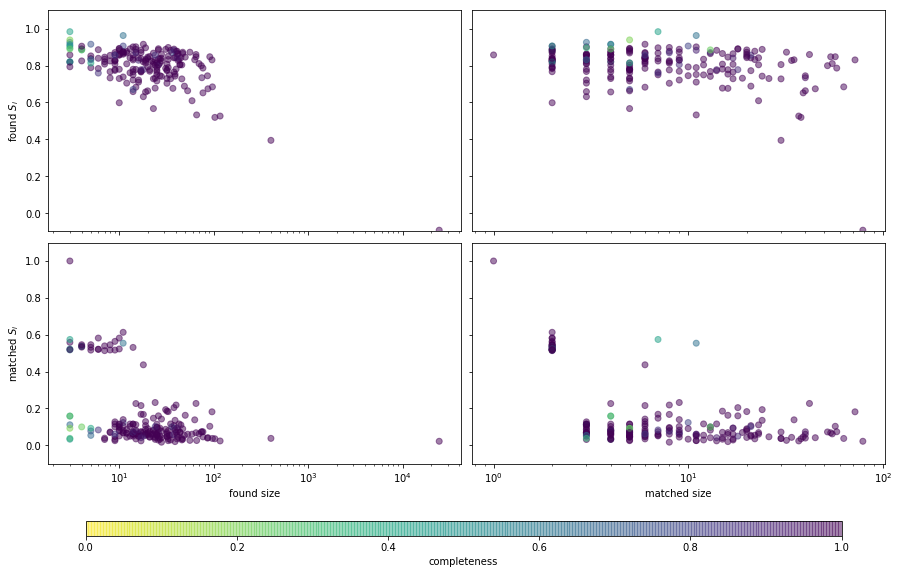

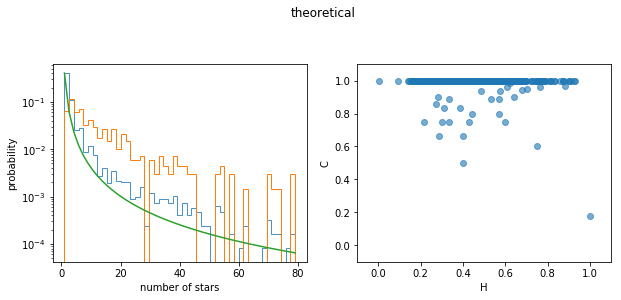

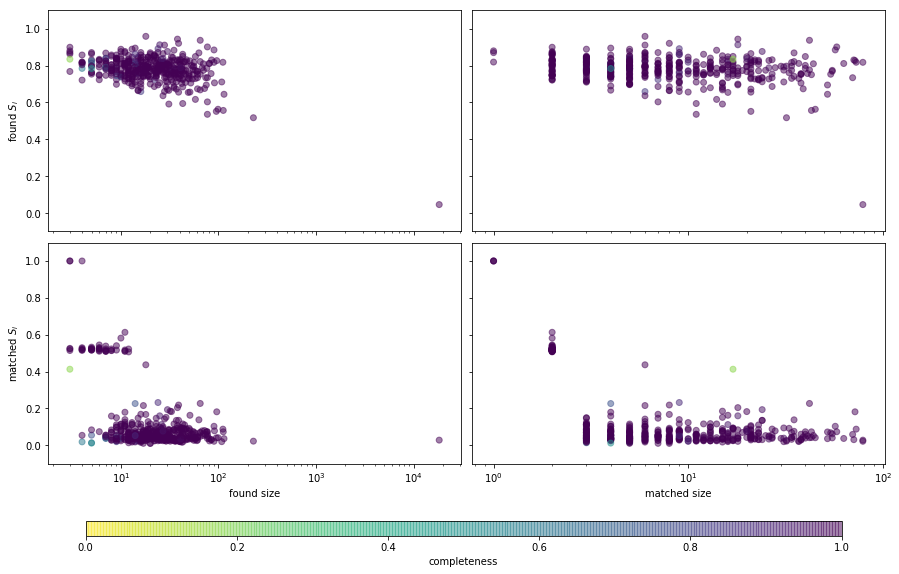

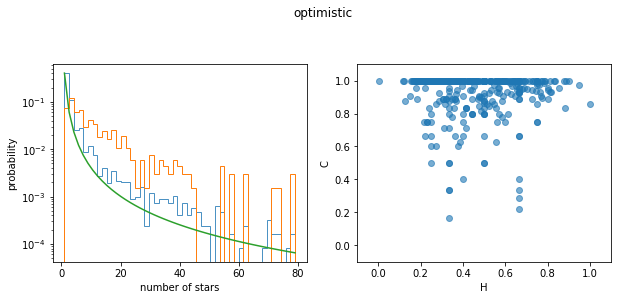

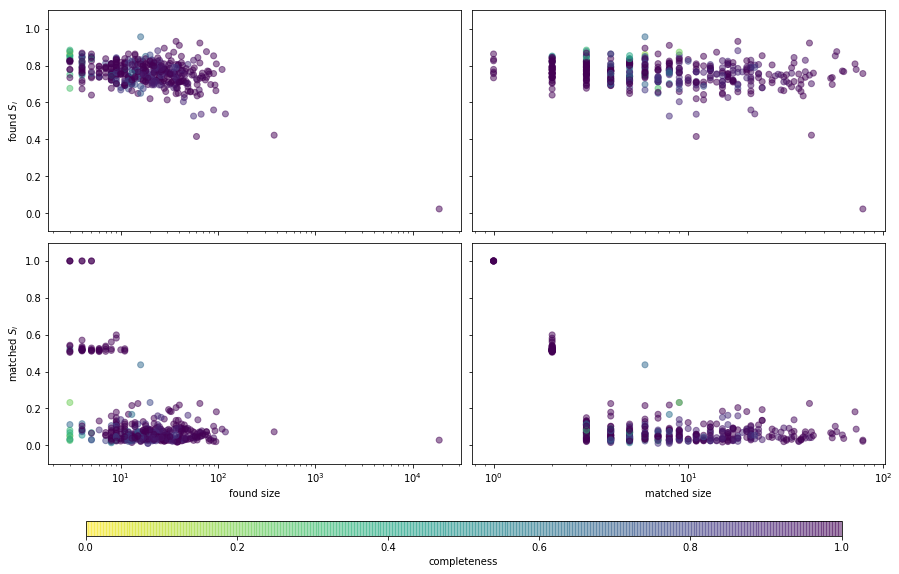

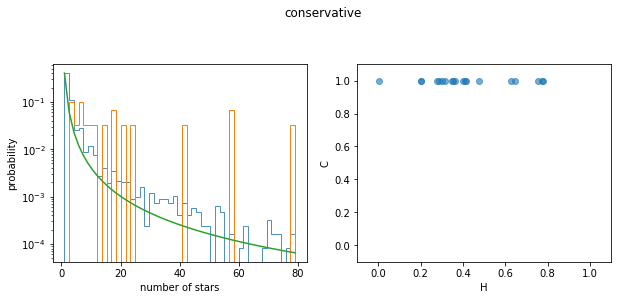

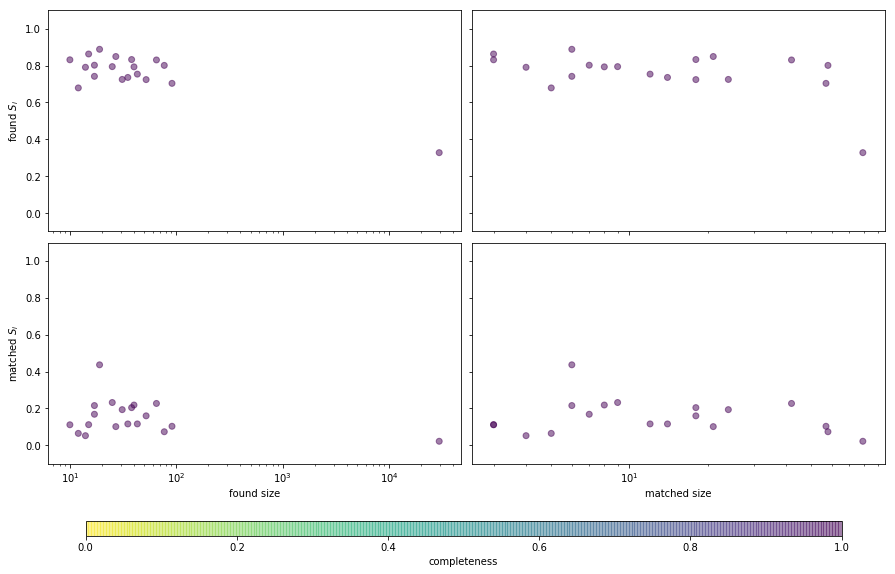

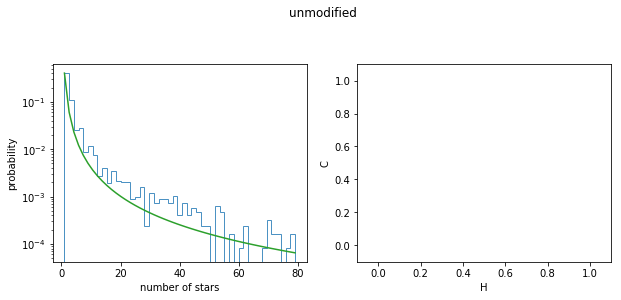

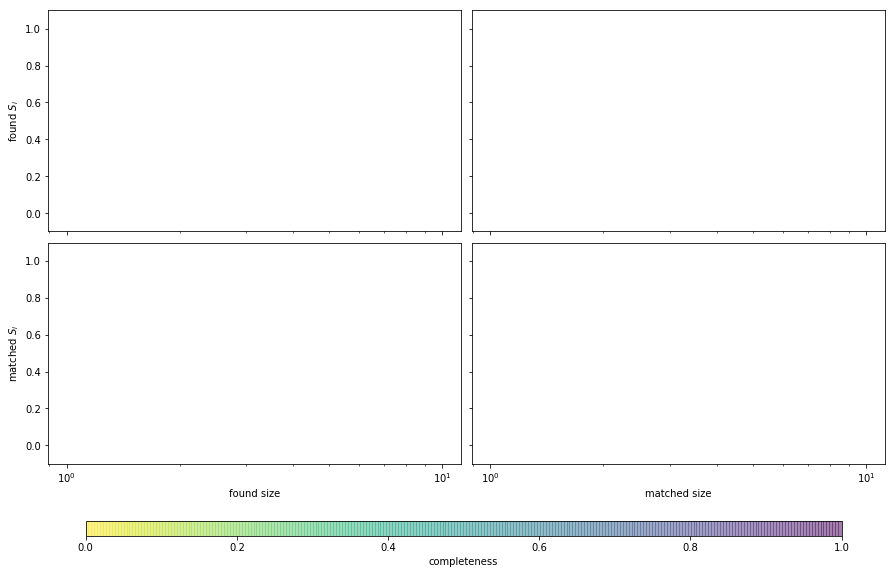

In [72]:
d = read_results(datatype='spec',case='d',timestamp='2018-09-26.17.59.45.935831')
ind = -2
d.read_base_data()
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='prin30')
makeplots(d,'prin30',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='tabn')
makeplots(d,'tabn',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='labn')
makeplots(d,'labn',ind)
d.read_run_data(eps=0.3,min_sample=3,update=True,datatype='abun')
makeplots(d,'abun',ind)
d.read_run_data(eps=0.8,min_sample=3,update=True,datatype='spec')
makeplots(d,'spec',ind)

# 10 KPC CYLINDER

principal components: Number of stars: 30064, number of clusters: 10182 stars grouped: 1615, number of groups: 194
theoretical: Number of stars: 30064, number of clusters: 10182 stars grouped: 3462, number of groups: 408
optimistic: Number of stars: 30064, number of clusters: 10182 stars grouped: 3249, number of groups: 400
conservative: Number of stars: 30064, number of clusters: 10182 stars grouped: 170, number of groups: 17
unmodified: Number of stars: 30064, number of clusters: 10182 stars grouped: 0, number of groups: 0


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


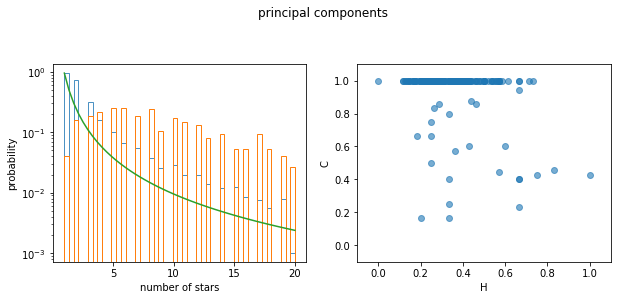

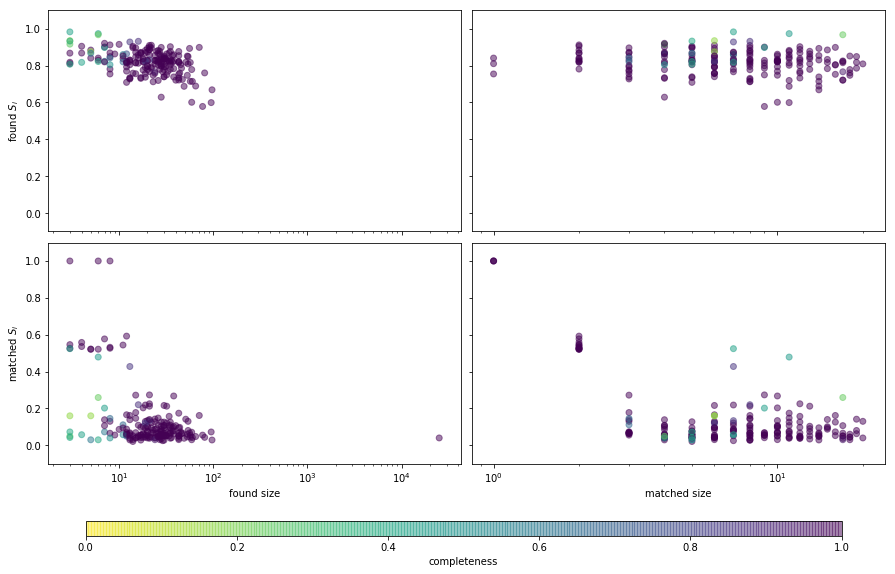

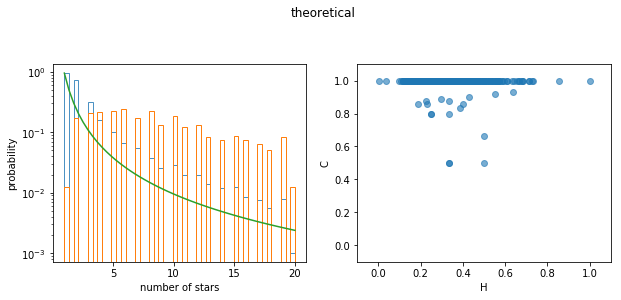

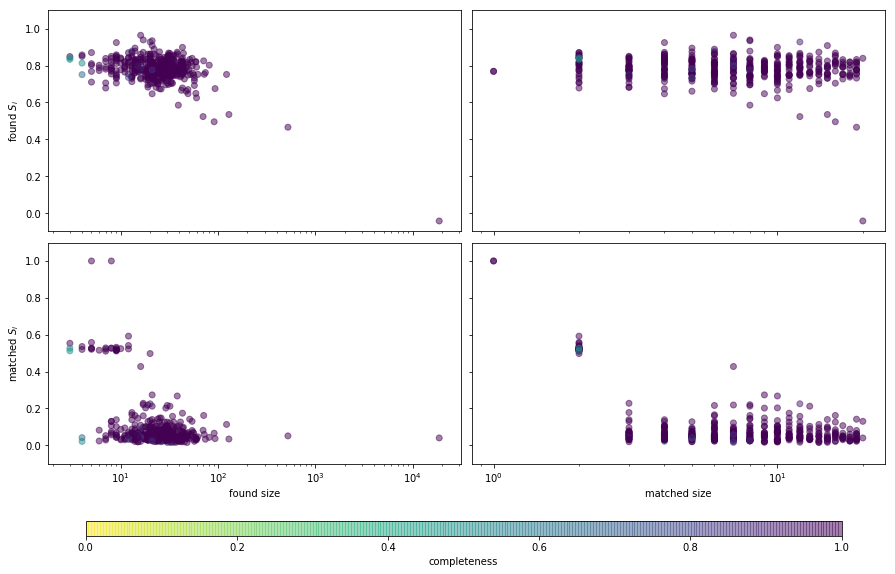

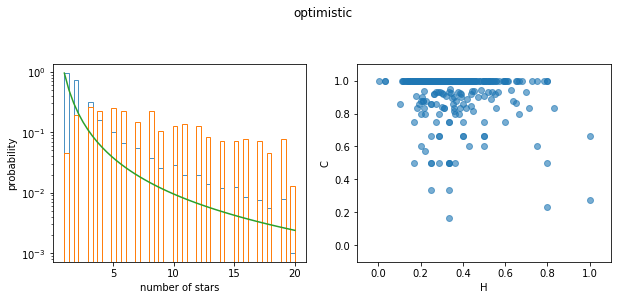

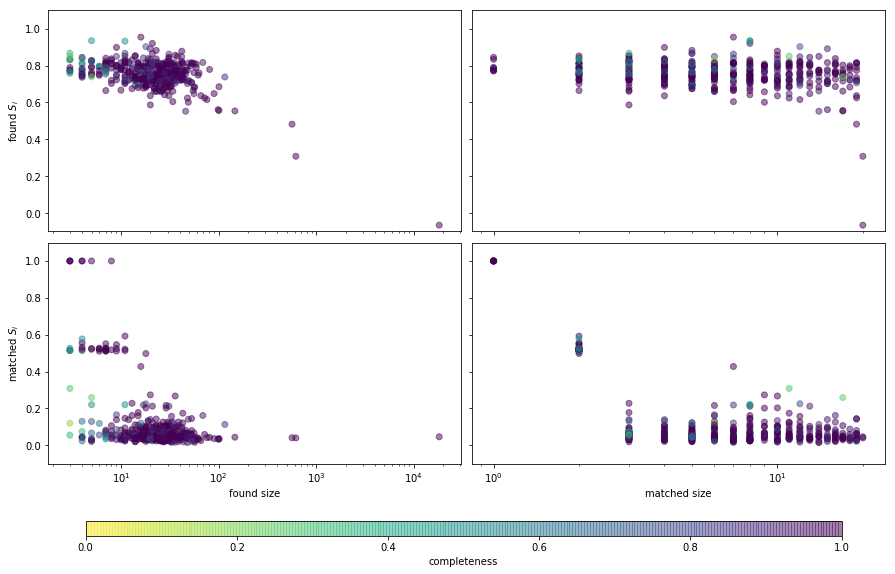

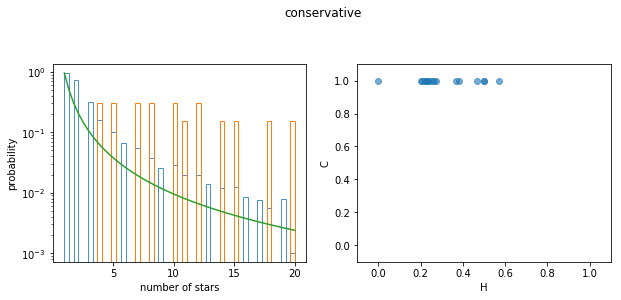

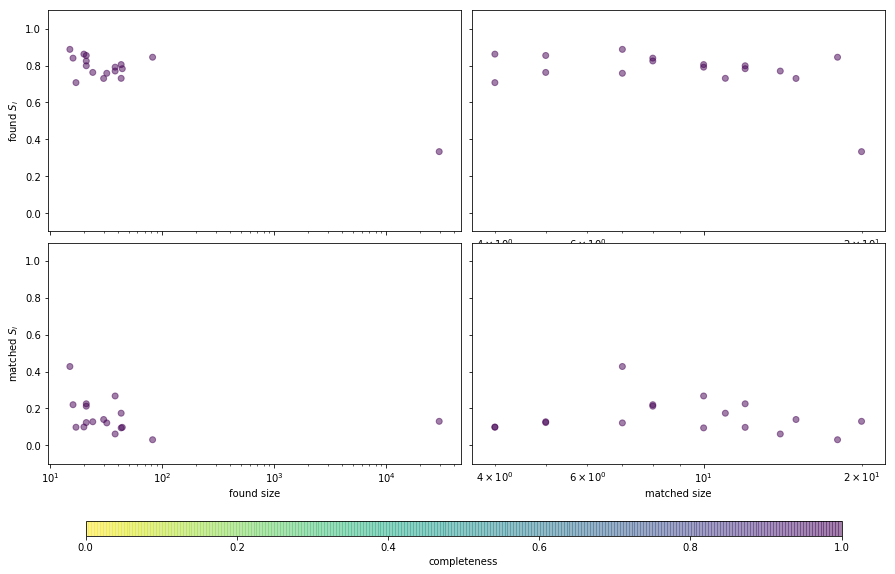

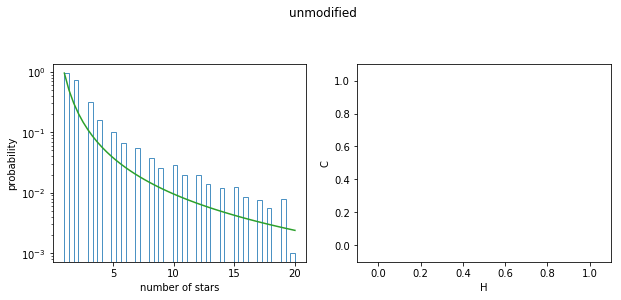

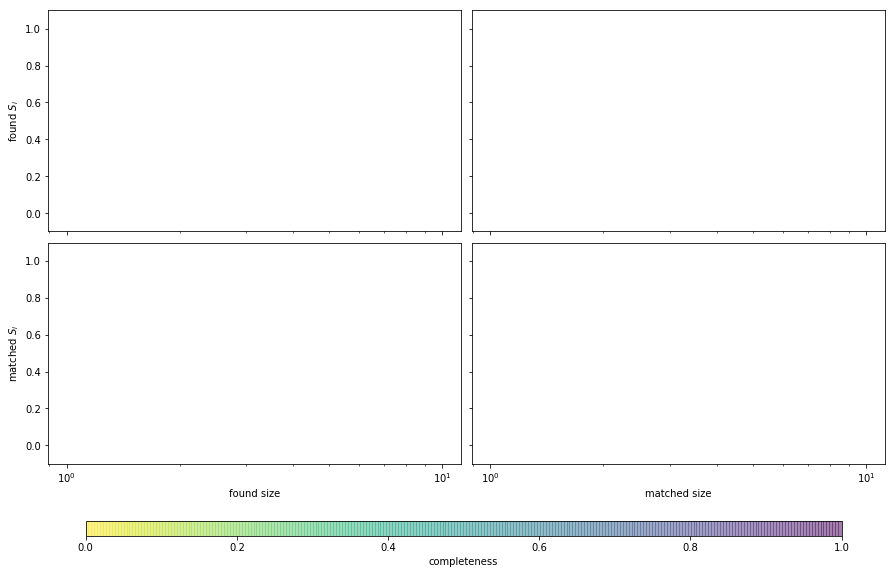

In [73]:
d = read_results(datatype='spec',case='e',timestamp='2018-09-26.18.07.40.546713')
ind = -2
d.read_base_data()
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='prin30')
makeplots(d,'prin30',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='tabn')
makeplots(d,'tabn',ind)
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='labn')
makeplots(d,'labn',ind)
d.read_run_data(eps=0.3,min_sample=3,update=True,datatype='abun')
makeplots(d,'abun',ind)
d.read_run_data(eps=0.8,min_sample=3,update=True,datatype='spec')
makeplots(d,'spec',ind)

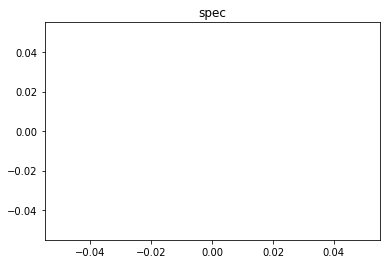

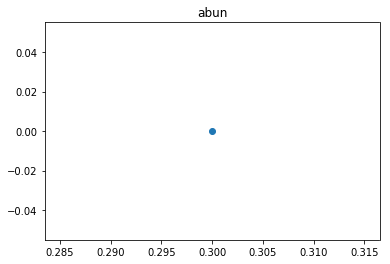

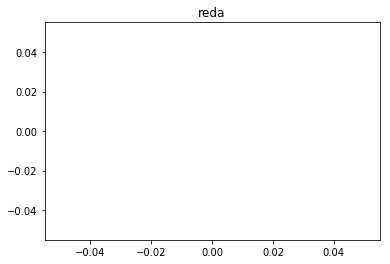

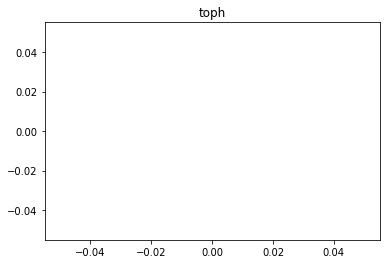

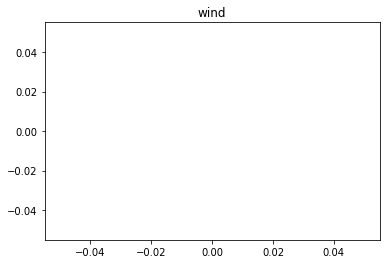

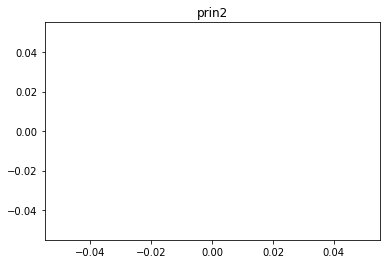

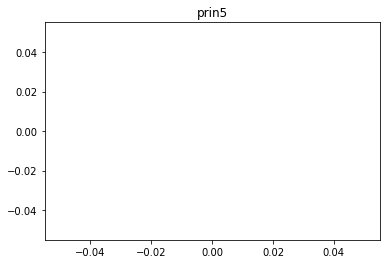

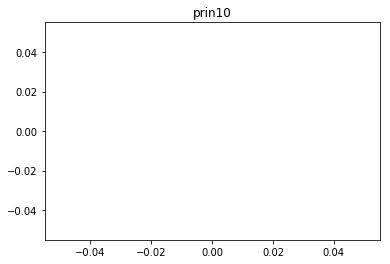

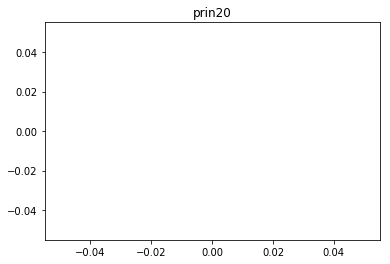

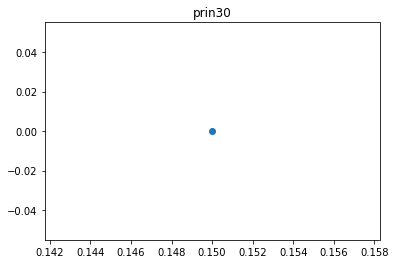

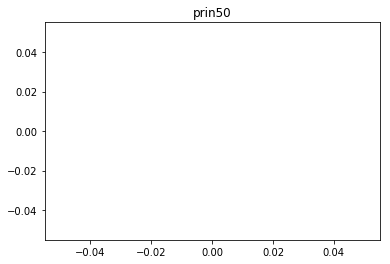

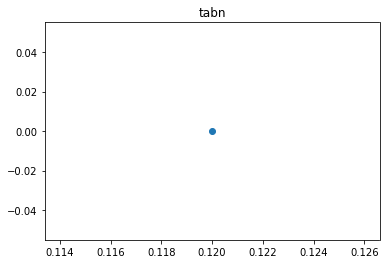

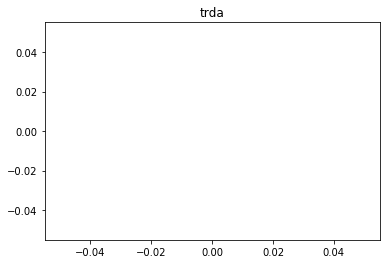

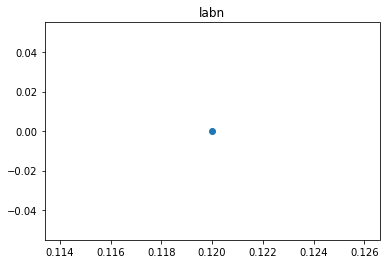

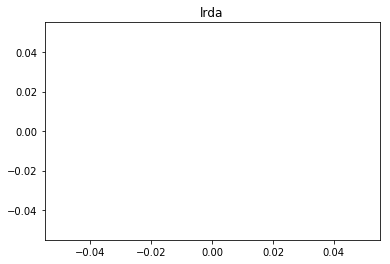

In [24]:
keys = ['spec','prin30','abun','tabn','labn']
keys = list(typenames.keys())
for key in keys:
    if '{0}_statsource'.format(key) in dir(d):
        ss = getattr(d,'{0}_statsource'.format(key))
        ss = ss.data
        plt.figure()
        params = ss['params']
        mask = ss['numc'] > 0.5
        eps = np.array([float(i.split(', ')[0]) for i in params])
        plt.plot(eps[mask],ss['knowns'][mask],marker='o',lw=0)
        plt.title(key)

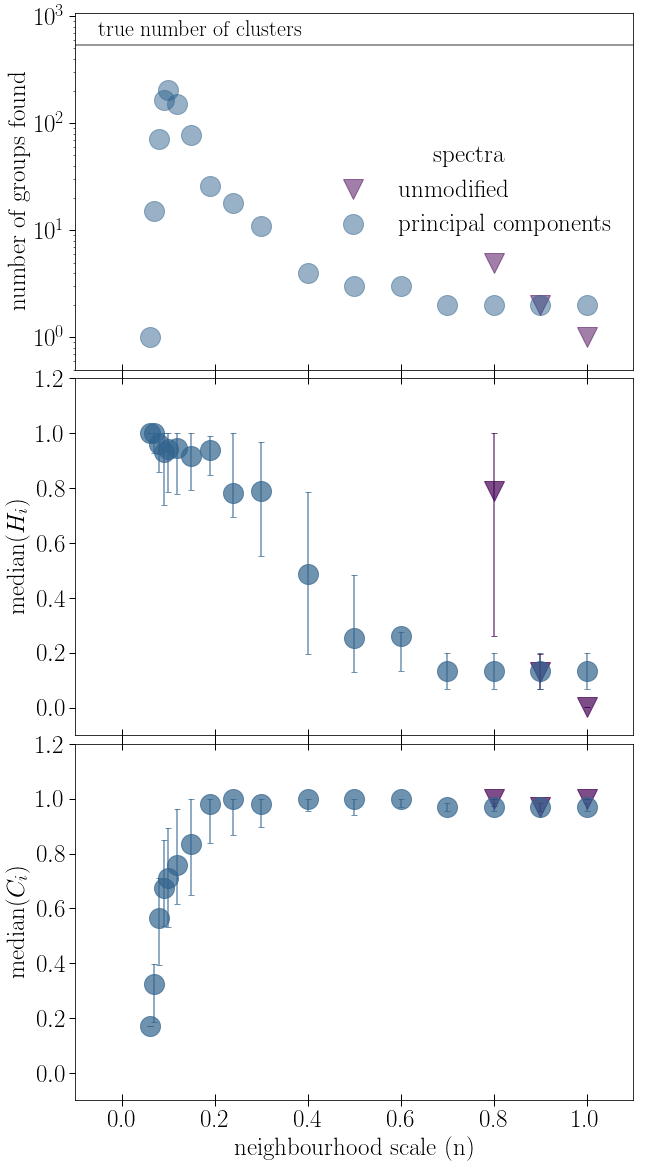

In [8]:
keys = list(typenames.keys())
keys = ['spec','toph','prin30']
legendtitle='spectra'
for key in keys:
    if '{0}_statsource'.format(key) in dir(d):
        ss = getattr(d,'{0}_statsource'.format(key))
        ss = ss.data
        if any(ss['numc'] > 0.5):
            params = ss['params']
            mask = ss['numc'] > 0.5
            eps = np.array([float(i.split(', ')[0]) for i in params])
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            maxrecv = np.where(ss['fstd'][:,1][mask]==np.max(ss['fstd'][:,1][mask]))
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
#             plt.figure(2,figsize=(10,8))
#             ax = plt.subplot(111)
#             ax.set_yscale("log")
#             if key == keys[0]:
#                 plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4,label='true number of clusters')
#             plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=2*sizes[key],marker=shapes[key],ls='None')
#             plt.xlabel('$\epsilon$',fontsize=30)
#             plt.ylabel('number of clusters found')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
            plt.figure(1,figsize=(10,20))
            ax = plt.subplot(311)
            ax.set_yscale("log")
            if key == keys[0]:
                plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4)#,label='true number\nof clusters')
                plt.text(-0.05,ss['tnumc'][0]+0.2*ss['tnumc'][0],'true number of clusters',fontsize=22)
                #plt.axvline(-1,color='k',alpha=0.5)#,label='maximum recovery\nfraction colored\nby data type',ls='--')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
            #    plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',rasterized=True)
            #plt.xlabel('$\epsilon$',fontsize=30)
            plt.ylabel('number of groups found')
            fticks = np.round(np.arange(0,1.2,0.2),1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=False)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
            plt.ylim(0.5,2.0*ss['tnumc'][0])
            plt.xlim(-0.1,1.1)
            legend = plt.legend(loc='best',title=legendtitle)
            legend.get_frame().set_linewidth(0.0)
            plt.subplot(312)
            plt.ylabel('median($H_i$)')
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
                #plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',rasterized=True)
            #legend = plt.legend(loc='best')
            #legend.get_frame().set_linewidth(0.0)
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(422)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--')
#             plt.errorbar(ss['numc'][mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],label='{0}'.format(names[key]),alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
#             plt.ylim(-0.1,1.2)
            plt.subplot(313)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
            #    plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.ylabel('median($C_i$)')
            plt.errorbar(eps[mask],ss['stdcom'][:,1][mask],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,label='{0}'.format(names[key]),alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',rasterized=True)
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xlabel('neighbourhood scale (n)')
            plt.xticks(fticks,fticks)
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(424)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdcom'][:,1][mask],alpha=alphas[key],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-0.1,1.2)
#             plt.subplot(425)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.ylabel('silhouette coefficient')
#             plt.errorbar(eps[mask],ss['stdfsi'][:,1][mask],label='{0}'.format(typenames[key]),yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
#             ax = plt.subplot(426)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdfsi'][:,1][mask],alpha=alphas[key],yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
            plt.subplots_adjust(hspace=0.025)
#             font = {'family': 'serif',
#                     'weight': 'normal',
#                     'size'  :  20 # Tune this according to personal preference
#                     }
#             matplotlib.rc('font',**font)
#             plt.figure(2,figsize=(15,6))
#             plt.subplot(121)
#             plt.ylabel('recovery fraction')
#             plt.xlabel('f')
#             #if key ==keys[0]:
#             #    plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(eps[mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',label='{0}'.format(names[key]))
#             plt.ylim(-0.1,1.1)
#             rticks = np.arange(0,1.25,0.25)
#             plt.tick_params(axis='y',direction='inout',length=12,width=1,left=True,right=True)
#             plt.yticks(rticks,rticks)
#             legend = plt.legend(loc='best',title=legendtitle)
#             legend.get_frame().set_linewidth(0.0)
#             ax = plt.subplot(122)
#             ax.set_xscale("log")
#             #if key ==keys[0]:
#             #    plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.tick_params(axis='y',direction='inout',length=6,width=1,left=True,right=False)
#             plt.yticks(rticks,['']*len(rticks))
#             plt.ylim(-0.1,1.1)
#             plt.xlabel('number of clusters found')
#             plt.subplots_adjust(wspace=0.025)
# plt.figure(2)
# plt.savefig('recv_spec_5e4.pdf')
plt.figure(1)
plt.savefig('stats_spec_5e4.pdf',dpi=150)
            

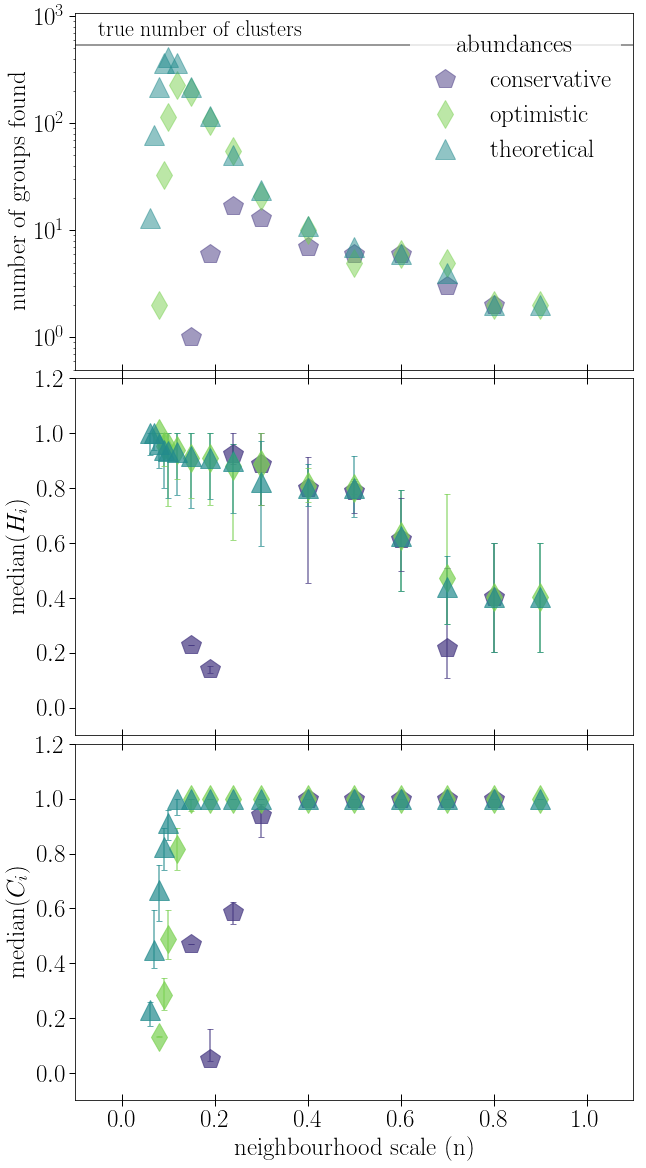

In [21]:
keys = list(typenames.keys())
keys = ['abun','labn','tabn']#,'reda','trda']
legendtitle='abundances'
for key in keys:
    if '{0}_statsource'.format(key) in dir(d):
        ss = getattr(d,'{0}_statsource'.format(key))
        ss = ss.data
        if any(ss['numc'] > 0.5):
            params = ss['params']
            mask = ss['numc'] > 0.5
            eps = np.array([float(i.split(', ')[0]) for i in params])
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            maxrecv = np.where(ss['fstd'][:,1][mask]==np.max(ss['fstd'][:,1][mask]))
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
#             plt.figure(2,figsize=(10,8))
#             ax = plt.subplot(111)
#             ax.set_yscale("log")
#             if key == keys[0]:
#                 plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4,label='true number of clusters')
#             plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=2*sizes[key],marker=shapes[key],ls='None')
#             plt.xlabel('$\epsilon$',fontsize=30)
#             plt.ylabel('number of clusters found')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
            plt.figure(1,figsize=(10,20))
            ax = plt.subplot(311)
            ax.set_yscale("log")
            if key == keys[0]:
                plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4)#,label='true number\nof clusters')
                plt.text(-0.05,ss['tnumc'][0]+0.2*ss['tnumc'][0],'true number of clusters',fontsize=22)
                #plt.axvline(-1,color='k',alpha=0.5)#,label='maximum recovery\nfraction colored\nby data type',ls='--')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
            #    plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',rasterized=True)
            #plt.xlabel('$\epsilon$',fontsize=30)
            plt.ylabel('number of groups found')
            fticks = np.round(np.arange(0,1.2,0.2),1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=False)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
            plt.ylim(0.5,2.0*ss['tnumc'][0])
            plt.xlim(-0.1,1.1)
            legend = plt.legend(loc='best',title=legendtitle)
            legend.get_frame().set_linewidth(0.0)
            plt.subplot(312)
            plt.ylabel('median($H_i$)')
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
                #plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',rasterized=True)
            #legend = plt.legend(loc='best')
            #legend.get_frame().set_linewidth(0.0)
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(422)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--')
#             plt.errorbar(ss['numc'][mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],label='{0}'.format(names[key]),alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
#             plt.ylim(-0.1,1.2)
            plt.subplot(313)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
            #    plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.ylabel('median($C_i$)')
            plt.errorbar(eps[mask],ss['stdcom'][:,1][mask],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,label='{0}'.format(names[key]),alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',rasterized=True)
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xlabel('neighbourhood scale (n)')
            plt.xticks(fticks,fticks)
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(424)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdcom'][:,1][mask],alpha=alphas[key],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-0.1,1.2)
#             plt.subplot(425)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.ylabel('silhouette coefficient')
#             plt.errorbar(eps[mask],ss['stdfsi'][:,1][mask],label='{0}'.format(typenames[key]),yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
#             ax = plt.subplot(426)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdfsi'][:,1][mask],alpha=alphas[key],yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
            plt.subplots_adjust(hspace=0.025)
#             font = {'family': 'serif',
#                     'weight': 'normal',
#                     'size'  :  20 # Tune this according to personal preference
#                     }
#             matplotlib.rc('font',**font)
#             plt.figure(2,figsize=(15,6))
#             plt.subplot(121)
#             plt.ylabel('recovery fraction')
#             plt.xlabel('f')
#             #if key ==keys[0]:
#             #    plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(eps[mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',label='{0}'.format(names[key]))
#             plt.ylim(-0.1,1.1)
#             rticks = np.arange(0,1.25,0.25)
#             plt.tick_params(axis='y',direction='inout',length=12,width=1,left=True,right=True)
#             plt.yticks(rticks,rticks)
#             legend = plt.legend(loc='best',title=legendtitle)
#             legend.get_frame().set_linewidth(0.0)
#             ax = plt.subplot(122)
#             ax.set_xscale("log")
#             #if key ==keys[0]:
#             #    plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.tick_params(axis='y',direction='inout',length=6,width=1,left=True,right=False)
#             plt.yticks(rticks,['']*len(rticks))
#             plt.ylim(-0.1,1.1)
#             plt.xlabel('number of clusters found')
#             plt.subplots_adjust(wspace=0.025)
# plt.figure(2)
# plt.savefig('recv_spec_5e4.pdf')
plt.figure(1)
plt.savefig('stats_abun_5e4.pdf',dpi=150)

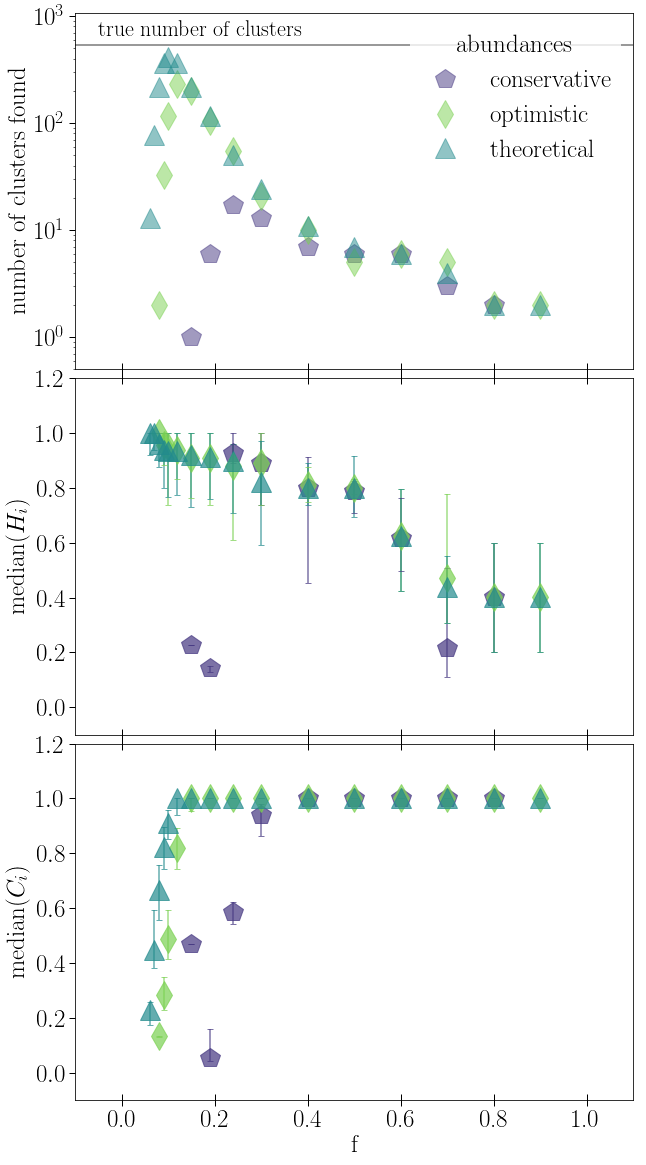

In [11]:
keys = list(typenames.keys())
keys = ['abun','labn','tabn']#,'reda','trda']
legendtitle='abundances'
for key in keys:
    if '{0}_statsource'.format(key) in dir(d):
        ss = getattr(d,'{0}_statsource'.format(key))
        ss = ss.data
        if any(ss['numc'] > 0.5):
            params = ss['params']
            mask = ss['numc'] > 0.5
            eps = np.array([float(i.split(', ')[0]) for i in params])
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            maxrecv = np.where(ss['fstd'][:,1][mask]==np.max(ss['fstd'][:,1][mask]))
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
#             plt.figure(2,figsize=(10,8))
#             ax = plt.subplot(111)
#             ax.set_yscale("log")
#             if key == keys[0]:
#                 plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4,label='true number of clusters')
#             plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=2*sizes[key],marker=shapes[key],ls='None')
#             plt.xlabel('$\epsilon$',fontsize=30)
#             plt.ylabel('number of clusters found')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
            plt.figure(1,figsize=(10,20))
            ax = plt.subplot(311)
            ax.set_yscale("log")
            if key == keys[0]:
                plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4)#,label='true number\nof clusters')
                plt.text(-0.05,ss['tnumc'][0]+0.2*ss['tnumc'][0],'true number of clusters',fontsize=22)
                #plt.axvline(-1,color='k',alpha=0.5)#,label='maximum recovery\nfraction colored\nby data type',ls='--')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
            #    plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            #plt.xlabel('$\epsilon$',fontsize=30)
            plt.ylabel('number of clusters found')
            fticks = np.round(np.arange(0,1.2,0.2),1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=False)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
            plt.ylim(0.5,2.0*ss['tnumc'][0])
            plt.xlim(-0.1,1.1)
            legend = plt.legend(loc='best',title=legendtitle)
            legend.get_frame().set_linewidth(0.0)
            plt.subplot(312)
            plt.ylabel('median($H_i$)')
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
                #plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            #legend = plt.legend(loc='best')
            #legend.get_frame().set_linewidth(0.0)
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(422)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--')
#             plt.errorbar(ss['numc'][mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],label='{0}'.format(names[key]),alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
#             plt.ylim(-0.1,1.2)
            plt.subplot(313)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            #if np.max(ss['fstd'][:,1][mask]) > 0:
            #    plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.ylabel('median($C_i$)')
            plt.errorbar(eps[mask],ss['stdcom'][:,1][mask],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,label='{0}'.format(names[key]),alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xlabel('f')
            plt.xticks(fticks,fticks)
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(424)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdcom'][:,1][mask],alpha=alphas[key],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-0.1,1.2)
#             plt.subplot(425)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.ylabel('silhouette coefficient')
#             plt.errorbar(eps[mask],ss['stdfsi'][:,1][mask],label='{0}'.format(typenames[key]),yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
#             ax = plt.subplot(426)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdfsi'][:,1][mask],alpha=alphas[key],yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
            plt.subplots_adjust(hspace=0.025)
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  20 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
#             plt.figure(2,figsize=(15,6))
#             plt.subplot(121)
#             plt.ylabel('recovery fraction')
#             plt.xlabel('f')
#             #if key ==keys[0]:
#             #    plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(eps[mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',label='{0}'.format(names[key]))
#             plt.ylim(-0.1,1.1)
#             rticks = np.arange(0,1.25,0.25)
#             plt.tick_params(axis='y',direction='inout',length=12,width=1,left=True,right=True)
#             plt.yticks(rticks,rticks)
#             legend = plt.legend(loc='best',title=legendtitle)
#             legend.get_frame().set_linewidth(0.0)
#             ax = plt.subplot(122)
#             ax.set_xscale("log")
#             #if key ==keys[0]:
#             #    plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.tick_params(axis='y',direction='inout',length=6,width=1,left=True,right=False)
#             plt.yticks(rticks,['']*len(rticks))
#             plt.ylim(-0.1,1.1)
#             plt.xlabel('number of clusters found')
#             plt.subplots_adjust(wspace=0.025)
# plt.figure(2)
# plt.savefig('recv_abun_5e4.pdf')
plt.figure(1)
plt.savefig('stats_abun_5e4.pdf')

prin30 [0.  0.  0.  0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
abun [0. 0. 0. 0. 0. 0. 0. 0. 0.]
labn [0.  0.  0.  0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
tabn [0.  0.  0.1 0.5 0.6 0.5 0.3 0.1 0.  0.  0.  0.  0.  0.  0.  0. ]


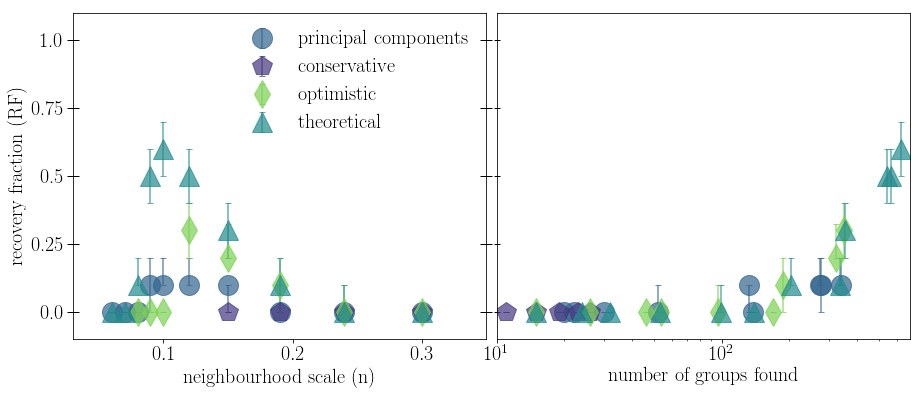

In [13]:
keys = list(typenames.keys())
keys = ['prin30','abun','labn','tabn']#,'reda','trda']
legendtitle='abundances'
for key in keys:
    if '{0}_statsource'.format(key) in dir(d):
        ss = getattr(d,'{0}_statsource'.format(key))
        ss = ss.data
        if any(ss['numc'] > 0.5):
            params = ss['params']
            mask = ss['numc'] > 0.5
            eps = np.array([float(i.split(', ')[0]) for i in params])
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            maxrecv = np.where(ss['fstd'][:,1][mask]==np.max(ss['fstd'][:,1][mask]))

            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  20 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            print(key,ss['fstd'][:,1][mask])
            plt.figure(1,figsize=(15,6))
            plt.subplot(121)
            plt.ylabel('recovery fraction (RF)')
            plt.xlabel('neighbourhood scale (n)')
            #if key ==keys[0]:
            #    plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(eps[mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',label='{0}'.format(names[key]),rasterized=True)
            plt.ylim(-0.1,1.1)
            rticks = np.arange(0,1.25,0.25)
            plt.tick_params(axis='y',direction='inout',length=12,width=1,left=True,right=True)
            plt.yticks(rticks,rticks)
            plt.xlim(0.03,0.35)
            legend = plt.legend(loc='best')
            legend.get_frame().set_linewidth(0.0)
            ax = plt.subplot(122)
            ax.set_xscale("log")
            #if key ==keys[0]:
            #    plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(ss['numc'][mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',rasterized=True)
            plt.tick_params(axis='y',direction='inout',length=6,width=1,left=True,right=False)
            plt.yticks(rticks,['']*len(rticks))
            plt.ylim(-0.1,1.1)
            plt.xlim(10,1.1*np.max(ss['numc'][mask]))
            plt.xlabel('number of groups found')
            plt.subplots_adjust(wspace=0.025)
plt.figure(1)
plt.savefig('recv_5e4.pdf',dpi=150)

In [23]:
import h5py

In [24]:
c = h5py.File('../PC12.hdf5','r')
names = ['vec2','vec5','vec10','vec20','vec50','vec1000','vec7214']

In [25]:
explained = 0.9
varatio = c['vec7214'].attrs['varratio']
a = np.where(np.cumsum(varatio)>explained)[0][0]
print('you need {0} PCs to exceed {1}% explained variance'.format(a+1,explained*100))

you need 2298 PCs to exceed 90.0% explained variance


In [26]:
vecs = 30
print('if you have {0} PCs, you can explain {1}% of the variance'.format(vecs,np.cumsum(varatio)[vecs-1]))

if you have 30 PCs, you can explain 0.7092947908025158% of the variance


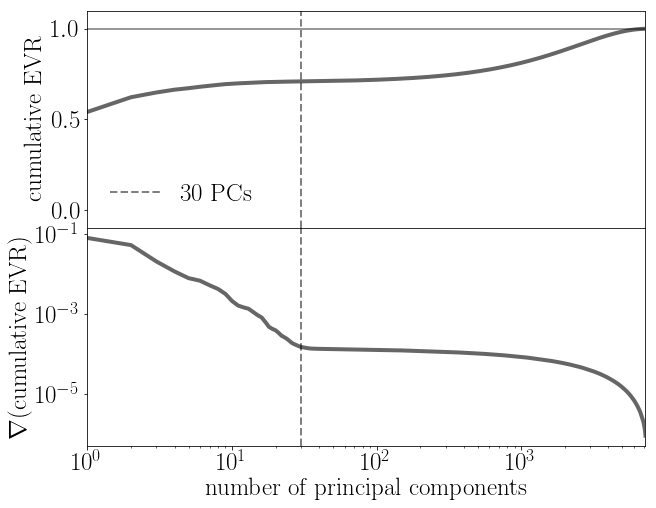

In [28]:
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  25 # Tune this according to personal preference
        }
matplotlib.rc('font',**font)
plt.rc('text', usetex=True)
mark = 30
for n,name in enumerate(names):
    eigvecs = c[name]
    eigvals = c[name].attrs['eigvals']
    varatio = c[name].attrs['varratio']
    plt.figure(1,figsize=(10,8))
    plt.subplot(211)
    if n == len(names)-1:
        plt.axhline(1,color='k',ls='-',lw=2,alpha=0.4)
        plt.axvline(mark,color='gray',ls='--',lw=2,label='{0} PCs'.format(mark))
        plt.semilogx(np.arange(1,len(varatio)+1,1),np.cumsum(varatio),lw=4,color='k',alpha=0.6,rasterized=True)
        plt.ylim(-0.1,1.1)
        plt.xlim(0,7214)
        plt.xticks([])
        #plt.xlabel('number of principal components')
        plt.ylabel('cumulative EVR')
        legend = plt.legend(loc='best')
        legend.get_frame().set_linewidth(0.0)
    plt.subplot(212) 
    if n == len(names)-1:
        plt.axvline(mark,color='gray',ls='--',lw=2)
        plt.loglog(np.arange(1,len(varatio)+1,1),np.gradient(np.cumsum(varatio)),lw=4,color='k',alpha=0.6,rasterized=True)
        plt.xlabel('number of principal components')
        plt.ylabel(r'$\nabla$(cumulative EVR)')
        plt.xlim(0,7214)
    plt.subplots_adjust(hspace=0.0)
plt.figure(1)
plt.savefig('principal_components.pdf',dpi=150)

In [62]:
stamp = '2018-11-28.11.47.56.726881'
rawdata = h5py.File('case12-V300.0-a2.1_{0}.hdf5'.format(stamp))

In [63]:
import h5py
import glob
files = glob.glob('case300*.hdf5')
good =[]
for f in files:
    try:
        a = h5py.File(f,'r')
        b = a['centers']
        good.append(f)
    except:
        pass

In [64]:
centers = rawdata['centers']
d = read_results(datatype = 'spec', case = '12-V300.0-a2.1', 
                 timestamp = stamp)
d.read_base_data()

In [65]:
elems = np.array(['C','N','O','Na','Mg','Al','Si','S','K','Ca','Ti','V','Mn','Fe','Ni'])

In [66]:
feind = np.where(elems=='Fe')[0][0]

In [67]:
fecenters = np.zeros(centers.shape)
fecenters[:,0] = centers[:,feind]
els = np.delete(elems,feind)
for col in range(len(els)):
    match = np.where(elems==els[col])[0][0]
    fecenters[:,col+1] = centers[:,match]
    fecenters[:,col+1] -= centers[:,feind]

In [68]:
fecenters.shape

(14786, 15)

In [69]:
from matplotlib.colors import LogNorm
default_cmap='viridis'
fs = 12
import matplotlib
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  fs
}

matplotlib.rc('font',**font)
def histogram2d(fig,ax,x,y,bins=100,clabel=False,vmin=0,vmax=110,norm='lin',default_cmap=default_cmap):
    """
    Create a 2D histogram of data represented by the two dimensions x and y
    
    fig:      Figure to plot in
    ax:       Subplot object to plot in
    x:        Array of data values in 'x'
    y:        Array of data values in 'y'
    bins:     Number of bins in which to divide each axis
    clabel:   Label for the colourbar - no colourbar is plotted if this is not given
    vmin:     Minimum value of the histogram
    vmax:     Maximum value of the histogram
    
    """
    # Create histogram
    H,xedges,yedges = np.histogram2d(x,y,bins=bins)
    # Reorient appropriately
    H = np.rot90(H)
    H = np.flipud(H)
    # Mask where bins are empty
    Hmasked = np.ma.masked_where(H==0,H)
    # Plot histogram
    if norm == 'lin':
        im = ax.pcolormesh(xedges,yedges,Hmasked,
                           cmap = plt.get_cmap(default_cmap),
                           vmin=vmin,vmax=vmax,rasterized=True)
    elif norm == 'log':
            im = ax.pcolormesh(xedges,yedges,Hmasked,
                           cmap = plt.get_cmap(default_cmap),
                           norm=LogNorm(vmin=vmin,vmax=vmax),rasterized=True)
    # If colourbar is desired, plot and label it
    if clabel:
        cbar=fig.colorbar(im,pad = 0)
        cbar.set_label(label=clabel,fontsize=fs)
        cbar.ax.tick_params(labelsize=fs)
    elif not clabel:
        cbar=fig.colorbar(im,pad = 0)
        cbar.ax.tick_params(labelsize=fs)

In [70]:
d.read_run_data(eps=0.1,min_sample=3,update=True,datatype='prin30')

matchtlabs = d.matchtlabs
ecut = 0.7
ccut = 0.7
sizemin=0
success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
bad = np.invert(success)

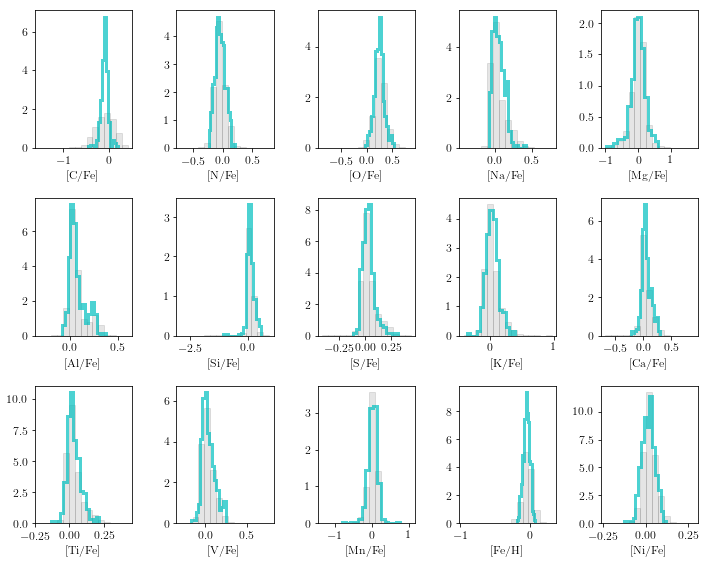

In [71]:
plt.figure(figsize=(10,8))
elembins=15
norm=True
for elem in range(fecenters.shape[1]):
    plt.subplot(3,5,elem+1)
    plt.hist(fecenters[:,elem],bins=elembins,alpha=0.1,edgecolor='k',color='k',normed=norm)
    plt.hist(fecenters[matchtlabs][success][:,elem],bins=elembins,histtype='step',alpha=0.7,edgecolor='c',color='c',normed=norm,lw=3)
    #plt.hist(fecenters[matchtlabs][bad][:,elem],bins=elembins,histtype='step',alpha=0.7,edgecolor='r',color='r',normed=norm,lw=3)
    if elems[elem] != 'Fe':
        plt.xlabel('[{0}/Fe]'.format(elems[elem]))
    else:
        plt.xlabel('[{0}/H]'.format(elems[elem]))
plt.tight_layout()

In [72]:
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='prin30')

matchtlabs = d.matchtlabs
ecut = 0.7
ccut = 0.7
sizemin=0
success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
bad = np.invert(success)

In [73]:
ocdat = np.load('occam_chemscrub_dr14.npy')

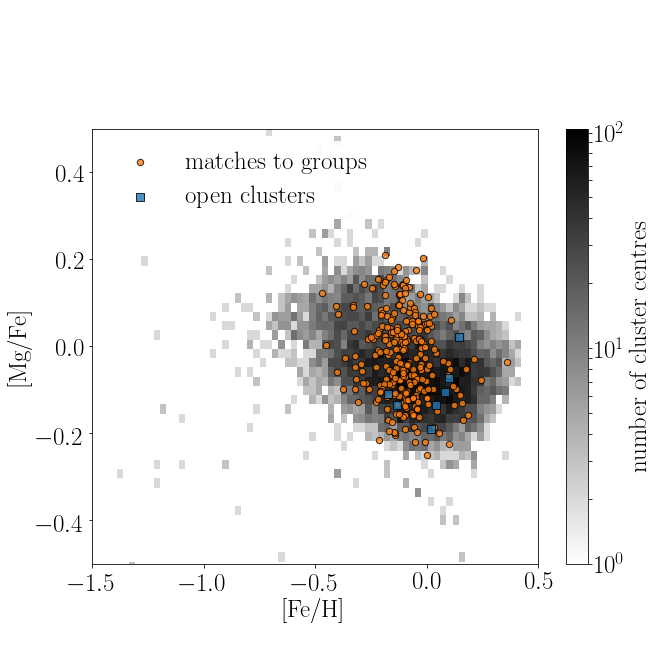

In [75]:
#plt.style.use('dark_background')
ndim = 15
ecut = 0.8
ccut = 0.8
sizemin = 15
nbins = 20
mask = d.tsize>sizemin
#mask= [True]*len(fes)
inds = len(centers)-np.arange(1,8,1)
elems = np.array(['Mg'])
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  25
}
ms = 40
alpha=0.8
matplotlib.rc('font',**font)
for elem in elems:
    if elem != 'Fe':
        mgind = np.where(elems==elem)[0][0]
        fes = (centers[:,feind])
        mgs = (centers[:,mgind]-centers[:,feind])
        fig = plt.figure(1,figsize=(10,8))
        ax = plt.subplot(111)
        #if len(fes[mask])<200:
        #    plt.plot(fes[mask],mgs[mask],'.',color='k',alpha=0.6)
        #elif len(fes[mask])>200:
        #    histogram2d(fig,ax,fes[mask],mgs[mask],norm='log',bins=50,vmin=1,vmax=50,default_cmap='gray')
        counts,ybins,xbins = np.histogram2d(mgs,fes,bins=50)
        levels = np.logspace(1,np.log10(150),15)
        plt.figure(1)
        H,y,x,im = plt.hist2d(fes,mgs,bins=70,norm=LogNorm(),cmap='gray_r')
        plt.colorbar(im,label='number of cluster centres')
        #plt.contourf(counts,levels=im.levels,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],norm=LogNorm(vmin=10,vmax=1e3),linewidths=3,cmap='gray')
        labs = d.matchtlabs[success]
        for i in range(len(fes[labs])):
            if i==0:
                #plt.scatter(fes[labs][i],mgs[labs][i],color='k',alpha=alpha,s=ms+5,rasterized=True)
                plt.scatter(fes[labs][i],mgs[labs][i],color='C1',alpha=alpha,s=ms,label='matches to groups',rasterized=True,edgecolors='k')
            elif i!=0:
                #plt.scatter(fes[labs][i],mgs[labs][i],color='k',alpha=alpha,s=ms+5,rasterized=True)
                plt.scatter(fes[labs][i],mgs[labs][i],color='C1',alpha=alpha,s=ms,rasterized=True,edgecolors='k')
        for ind in inds:
            match = np.where(labs==ind)
            if len(match[0]) > 0:
                plt.plot(fes[match[0][0]],mgs[match[0][0]],'P',color='w',markersize=8,alpha=0.8,rasterized=True)
                plt.plot(fes[match[0][0]],mgs[match[0][0]],'P',color=colors['prin30'],markersize=7,alpha=0.8,rasterized=True)
            elif len(match[0])==0:
                if ind == inds[0]:
                    #plt.plot(fes[ind],mgs[ind],marker='s',color='k',markersize=(0.75*ms)+5,alpha=alpha,rasterized=True)
                    plt.scatter(fes[ind],mgs[ind],marker='s',color='C0',s=2*ms,label='open clusters',alpha=alpha,rasterized=True,edgecolors='k')
                elif ind != inds[0]:
                    #plt.plot(fes[ind],mgs[ind],marker='s',color='k',markersize=(0.75*ms)+5,alpha=alpha,rasterized=True)
                    plt.scatter(fes[ind],mgs[ind],marker='s',color='C0',s=(2*ms),alpha=alpha,rasterized=True,edgecolors='k')
        legend = plt.legend(loc='upper left')
        legend.get_frame().set_linewidth(0.0)
        legend.get_frame().set_alpha(0.9)
        plt.ylim(-0.5,0.5)
        plt.xlim(-1.5,0.5)
        plt.xlabel('[Fe/H]')
        plt.ylabel('[{0}/Fe]'.format(elem))
plt.savefig('chemspace_dist.pdf',dpi=150)

In [76]:
import h5py
import glob
files = glob.glob('case300*.hdf5')
good =[]
abun = np.ma.masked_array(np.zeros((len(files),3)),mask = np.ones((len(files),3)))
labn = np.ma.masked_array(np.zeros((len(files),3)),mask = np.ones((len(files),3)))
prin30 = np.ma.masked_array(np.zeros((len(files),3)),mask = np.ones((len(files),3)))
tabn = np.ma.masked_array(np.zeros((len(files),3)),mask = np.ones((len(files),3)))
dates = []
nums = []
for f,file in enumerate(files):
    try:
        date = file.split('_')[-1].split('.')[0]
        month = date.split('-')[1]
        day = date.split('-')[-1]
        a = h5py.File(file,'r')
        abun[f] = (np.percentile(a['abun_eff_eps0.24_min3'][:],[25,50,75]))
        abun[f].mask = np.zeros(3)
        labn[f] = (np.percentile(a['labn_eff_eps0.12_min3'][:],[25,50,75]))
        labn[f].mask = np.zeros(3)
        prin30[f] = (np.percentile(a['prin30_eff_eps0.12_min3'][:],[25,50,75]))
        prin30[f].mask = np.zeros(3)
        tabn[f] = (np.percentile(a['tabn_eff_eps0.1_min3'][:],[25,50,75]))
        tabn[f].mask = np.zeros(3)
        dates.append(date)
        nums.append(np.sum(a['true_size'][:]))
        b = a['centers']
        good.append(file)
        a.close()
    except KeyError as e:
        pass
    except OSError:
        pass

dates = np.array(dates)
nums = np.array(nums)
datesort = np.argsort(dates)

rows = np.where(np.sum(np.invert(abun.mask),axis=1)==3)
abun = abun[rows][datesort]
labn = labn[rows][datesort]
prin30 = prin30[rows][datesort]
tabn = tabn[rows][datesort]


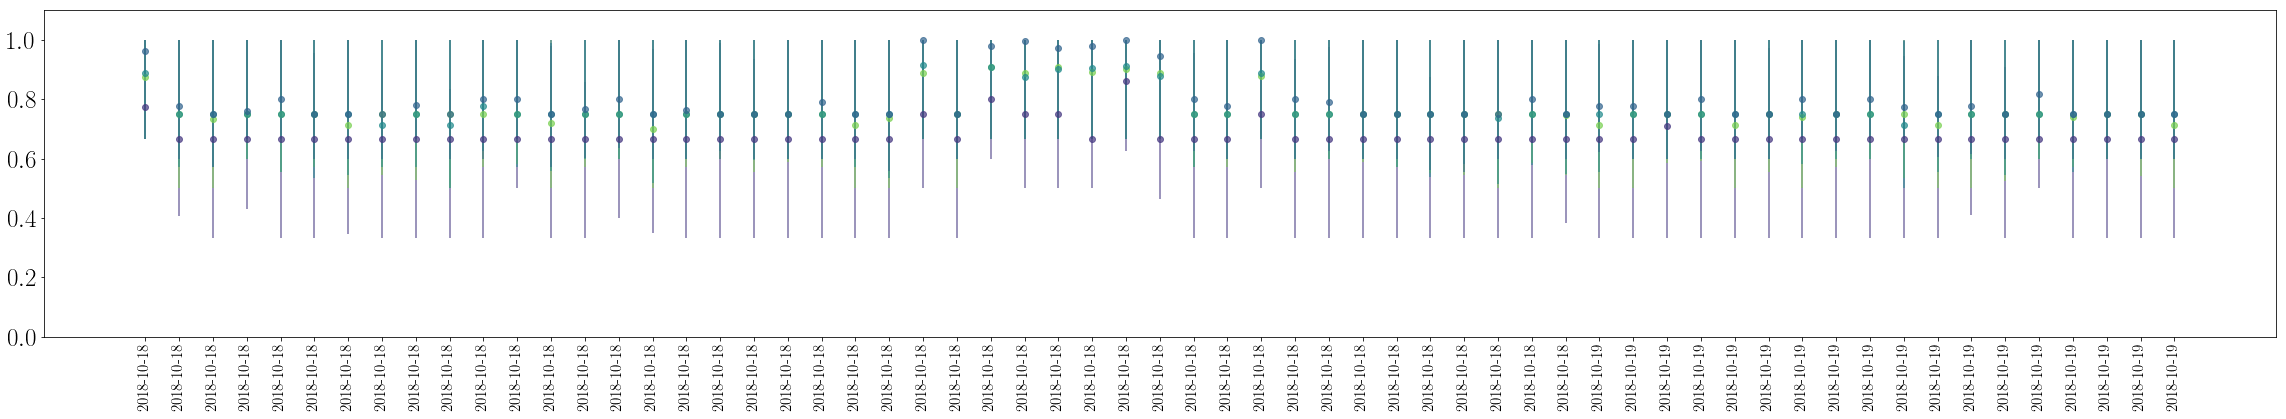

In [77]:
arrs = [abun,labn,tabn,prin30]
arrnames=['abun','labn','tabn','prin30']
xarr = np.arange(len(dates))
plt.figure(figsize=(40,6))
yerr=[abun.data[:,1]-abun.data[:,0],abun.data[:,2]-abun.data[:,1]]
for a,arr in enumerate(arrs):
    plt.errorbar(x=xarr,y=arr.data[:,1],yerr=[arr.data[:,1]-arr.data[:,0],arr.data[:,2]-arr.data[:,1]],fmt='o',color=colors[arrnames[a]],alpha=0.7)
plt.ylim(0,1.1)
x = plt.xticks(xarr,dates[datesort],rotation=90,fontsize=15)

In [78]:
stamps = []
for g in good:
    stamps.append((g.split('_')[-1]).split('.hdf5')[0])

In [79]:
len(stamps)

61

In [80]:
files

['case300_2018-09-20.18.52.30.292174.hdf5',
 'case300_2018-09-20.19.07.58.124168.hdf5',
 'case300_2018-09-20.19.22.49.47903.hdf5',
 'case300_2018-09-20.19.37.43.03702.hdf5',
 'case300_2018-09-20.19.52.42.45291.hdf5',
 'case300_2018-09-20.20.22.23.834258.hdf5',
 'case300_2018-09-20.21.08.11.202182.hdf5',
 'case300_2018-09-20.20.07.53.123497.hdf5',
 'case300_2018-09-20.20.52.48.165780.hdf5',
 'case300_2018-09-20.20.37.33.906646.hdf5',
 'case300_2018-09-20.21.23.45.310108.hdf5',
 'case300_2018-09-20.21.39.09.198069.hdf5',
 'case300_2018-09-20.21.54.48.299200.hdf5',
 'case300_2018-09-20.22.10.23.832468.hdf5',
 'case300_2018-09-20.22.26.05.968130.hdf5',
 'case300_2018-09-20.22.41.25.334788.hdf5',
 'case300_2018-09-20.22.57.09.64871.hdf5',
 'case300_2018-09-20.23.12.12.594361.hdf5',
 'case300_2018-09-20.23.27.52.20944.hdf5',
 'case300_2018-09-20.23.43.35.479815.hdf5',
 'case300_2018-09-21.00.15.09.295166.hdf5',
 'case300_2018-09-20.23.59.48.838931.hdf5',
 'case300_2018-09-21.00.30.35.158268.

In [81]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, xi, yi,fes,mgs,bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""
    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[-0.5:fes.max():xbins, 
                      mgs.min():mgs.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_points = np.vstack([yi,xi]).T
    xy_train  = np.vstack([y, x]).T
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)
    #kde_skl.fit(xy_points)
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    zpts = np.exp(kde_skl.score_samples(xy_points))
    return xx, yy, np.reshape(z, xx.shape),zpts



In [82]:
xbins=100j
ybins=100j
bandwidth=0.01
kernel = 'epanechnikov'
ecut = 0.7
ccut = 0.7
felim = -1
sizemin=15

FE_H MG_H
starting fig


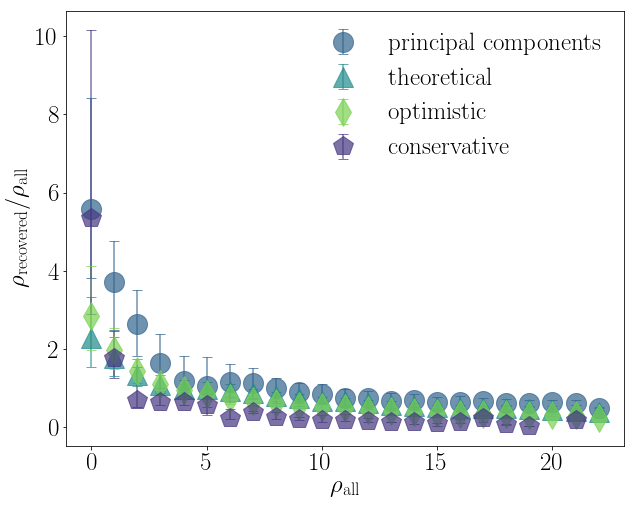

In [83]:
import h5py

names={'spec':'unmodified',
       'toph':'binary mask',
       'prin30':'principal components',
       'abun':'conservative',
       'tabn':'theoretical',
       'labn':'optimistic'}

suff='H'
elems=np.array(['C_{0}'.format(suff),
               'N_{0}'.format(suff),
               'O_{0}'.format(suff),
               'NA_{0}'.format(suff),
               'MG_{0}'.format(suff),
               'AL_{0}'.format(suff),
               'SI_{0}'.format(suff),
               'S_{0}'.format(suff),
               'K_{0}'.format(suff),
               'CA_{0}'.format(suff),
               'TI_{0}'.format(suff),
               'V_{0}'.format(suff),
               'MN_{0}'.format(suff),
               'FE_H',
               'NI_{0}'.format(suff)])
#elems=np.array(['O_H','MG_H','FE_H'])

feloc = np.where(elems=='FE_H')[0][0]
    
epsvals = {'prin30':0.12,
           'spec':0.5,
           'tabn':0.1,
           'labn':0.12,
           'abun':0.24}

medeffs = {'prin30':[],
           'spec':[],
           'tabn':[],
           'labn':[],
           'abun':[]}

medcoms = {'prin30':[],
           'spec':[],
           'tabn':[],
           'labn':[],
           'abun':[]}

for i,e1 in enumerate(['FE_H']):
    for j,e2 in enumerate(['MG_H']):
        if e1!=e2:
            print(e1,e2)

            goodstamps = {'prin30':[],
                       'spec':[],
                       'tabn':[],
                       'labn':[],
                       'abun':[]}

            rhoall = {'prin30':[],
                       'spec':[],
                       'tabn':[],
                       'labn':[],
                       'abun':[]}

            rhopts = {'prin30':[],
                       'spec':[],
                       'tabn':[],
                       'labn':[],
                       'abun':[]}



            for s,stamp in enumerate(stamps):
                a = h5py.File(good[s],'r')
                centers = a['centers'][:]
                a.close()
                d = read_results(datatype = 'spec', case = 300, 
                                 timestamp = stamp)
                d.read_base_data()

                feind = np.where(elems==e1)[0][0]
                mgind = np.where(elems==e2)[0][0]
                if e1=='FE_H':
                    fes = centers[:,feind]
                if e2=='FE_H':
                    mgs = centers[:,mgind]
                if e1 != 'FE_H':
                    fes = centers[:,feind]-centers[:,feloc]
                if e2 != 'FE_H':
                    mgs = centers[:,mgind]-centers[:,feloc]

                for key in list(epsvals.keys()):
                    d.read_run_data(eps=epsvals[key],min_sample=3,update=True,datatype=key)
                    medeffs[key].append(d.eff[d.fsize>sizemin])
                    medcoms[key].append((d.com[d.fsize>sizemin]))
                    success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
                    if len(success) > 1:
                        bad = np.invert(success)
                        labs = d.matchtlabs[success]

                        felabs = fes[labs][fes[labs]>felim]
                        mglabs = mgs[labs][fes[labs]>felim]
                        if len(felabs) > 1:
                            goodstamps[key].append(stamp)
                            std = np.mean([np.std(felabs),np.std(mglabs)])
                            bandwidth = 3.5*std/(len(felabs)**(1./3))
                            xbins = complex(int((np.max(felabs)-np.min(felabs))/bandwidth))+1
                            ybins = complex(int((np.max(mglabs)-np.min(mglabs))/bandwidth))+1
                            xx, yy, zzpts, zpts = kde2D(felabs,mglabs,felabs,mglabs,fes,mgs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)
                            rhopts[key].append(zpts)

                            std = np.mean([np.std(fes[fes>felim]),np.std(mgs[fes>felim])])
                            bandwidth = 3.5*std/(len(fes[fes>felim])**(1./3))
                            xbins = complex(int((np.max(fes[fes>felim])-np.min(fes[fes>felim]))/bandwidth))+1
                            ybins = complex(int((np.max(mgs[fes>felim])-np.min(mgs[fes>felim]))/bandwidth))+1
                            xx, yy, zzall, zall = kde2D(fes[fes>felim],mgs[fes>felim],felabs,mglabs,fes,mgs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)
                            rhoall[key].append(zall)

            print('starting fig')
            plt.figure(i*j,figsize=(10,8))
            #plt.title('{1} vs {0}'.format(e1,e2))
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
            jitter = 0
            for key in list(rhopts.keys()):
                pall = np.array([item for sublist in rhoall[key] for item in sublist])
                ppts = np.array([item for sublist in rhopts[key] for item in sublist])
                ratio = ppts/pall
                bins = np.arange(0,25,1)
                a = np.digitize(pall,bins)
                meanpos = []
                meanupp = []
                meanval = []
                meanlow = []
                for b in bins:
                    match = np.where(bins[a-1] == b)
                    if len(match[0])>0:
                        meanpos.append(b)
                        down,mid,up = np.percentile(ratio[match],[25,50,75])
                        meanupp.append(up)
                        meanval.append(mid)
                        meanlow.append(down)
                meanpos = np.array(meanpos)
                meanval = np.array(meanval)
                meanupp = np.array(meanupp)
                meanlow = np.array(meanlow)
                if len(meanpos) > 0:
                    plt.errorbar(meanpos+jitter,meanval,yerr=[meanval-meanlow,meanupp-meanval],
                                 fmt=shapes[key],markersize=sizes[key],alpha=alphas[key],
                                 color=colors[key],label=names[key],capsize=5,rasterized=True)
                #jitter+=0.05
            plt.ylabel(r'$\rho_{\rm recovered}/\rho_{\rm all}$')
            plt.xlabel(r'$\rho_{\rm all}$')
            legend=plt.legend(loc='best')
            legend.get_frame().set_linewidth(0.0)
            plt.savefig('density_recovery.pdf',dpi=150)



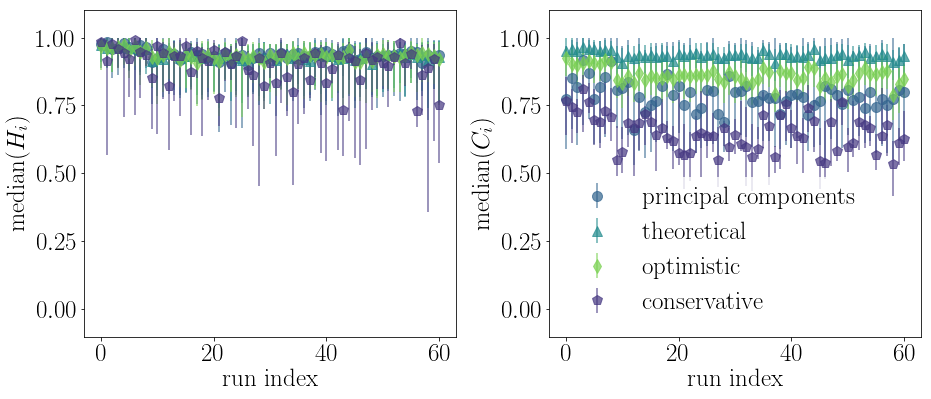

In [84]:
plt.figure(figsize=(15,6))
for key in list(medeffs.keys()):
    for r,run in enumerate(medeffs[key]):
        try:
            lo,med,up = np.percentile(run,[25,50,75])
            lo = med-lo
            up = up-med
            plt.subplot(121)
            if r == 0:
                plt.errorbar(r,med,yerr=np.array([[lo,up]]).T,color=colors[key],alpha=0.7,label=names[key],fmt=shapes[key],markersize=sizes[key]/2,rasterized=True)
                plt.ylim(-0.1,1.1)
                plt.ylabel('median($H_i$)')
                plt.xlabel('run index')
            elif r != 0:
                plt.errorbar(r,med,yerr=np.array([[lo,up]]).T,color=colors[key],alpha=0.7,fmt=shapes[key],markersize=sizes[key]/2,rasterized=True)
            lo,med,up = np.percentile(medcoms[key][r],[25,50,75])
            lo = med-lo
            up = up-med
            plt.subplot(122)
            if r == 0:
                plt.errorbar(r,med,yerr=np.array([[lo,up]]).T,color=colors[key],alpha=0.7,label=names[key],fmt=shapes[key],markersize=sizes[key]/2,rasterized=True)
                plt.ylim(-0.1,1.1)
                plt.ylabel('median($C_i$)')
                plt.xlabel('run index')
            elif r != 0:
                plt.errorbar(r,med,yerr=np.array([[lo,up]]).T,color=colors[key],alpha=0.7,fmt=shapes[key],markersize=sizes[key]/2,rasterized=True)
        except IndexError:
            pass
plt.subplots_adjust(wspace=0.25)
legend = plt.legend(loc='best')
legend.get_frame().set_linewidth(0.0)
plt.savefig('average_prop.pdf',dpi=150)

In [19]:
stamps

['2018-09-20.20.22.23.834258',
 '2018-09-20.21.08.11.202182',
 '2018-09-20.20.52.48.165780',
 '2018-09-20.20.37.33.906646',
 '2018-09-20.21.23.45.310108',
 '2018-09-20.21.39.09.198069',
 '2018-09-20.21.54.48.299200',
 '2018-09-20.22.10.23.832468',
 '2018-09-20.22.26.05.968130',
 '2018-09-20.22.41.25.334788',
 '2018-09-20.22.57.09.64871',
 '2018-09-20.23.12.12.594361',
 '2018-09-20.23.27.52.20944',
 '2018-09-20.23.43.35.479815',
 '2018-09-21.00.15.09.295166',
 '2018-09-20.23.59.48.838931',
 '2018-09-21.03.12.21.826851',
 '2018-09-21.03.40.52.682314',
 '2018-09-21.03.57.38.667562',
 '2018-09-21.04.13.27.977124',
 '2018-09-21.04.28.56.867602',
 '2018-09-21.04.45.14.234021',
 '2018-09-21.05.00.56.429975',
 '2018-09-21.05.17.46.395250',
 '2018-09-21.05.34.10.11959',
 '2018-09-21.05.50.08.922889',
 '2018-09-21.06.05.29.804451',
 '2018-09-21.06.21.05.649807',
 '2018-09-21.06.36.44.138555',
 '2018-09-21.06.53.51.653376',
 '2018-09-21.07.09.38.158171',
 '2018-09-21.07.25.23.274747',
 '2018-09-2

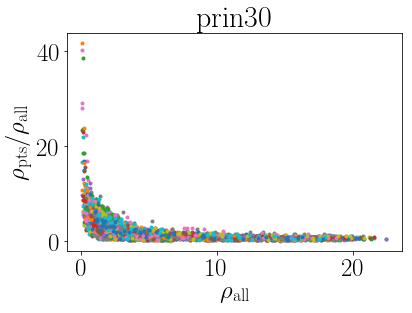

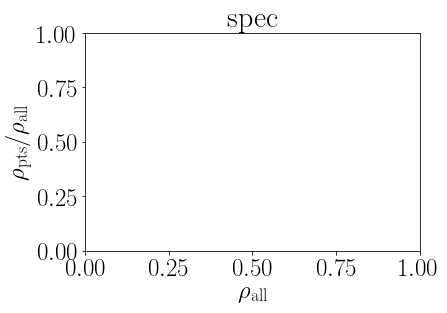

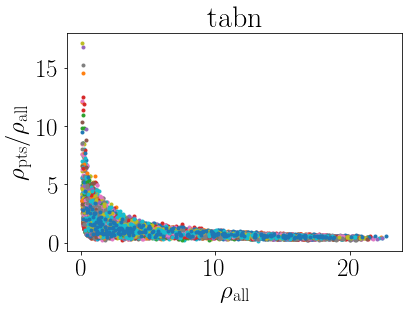

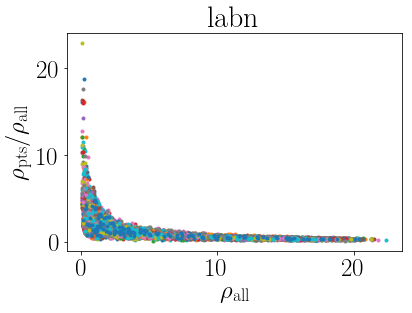

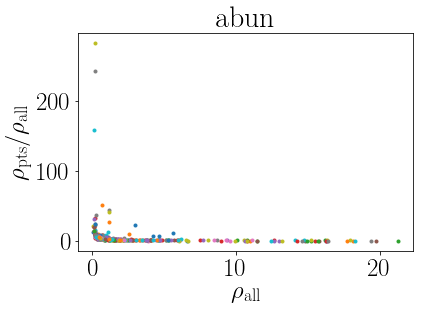

In [36]:
for key in list(rhopts.keys()):
    plt.figure()
    plt.title(key)
    for i in range(len(rhopts[key])):
        plt.plot(rhoall[key][i],rhopts[key][i]/rhoall[key][i],'.')
    plt.ylabel(r'$\rho_{\rm pts}/\rho_{\rm all}$')
    plt.xlabel(r'$\rho_{\rm all}$')

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


AttributeError: 'NoneType' object has no attribute 'get_frame'

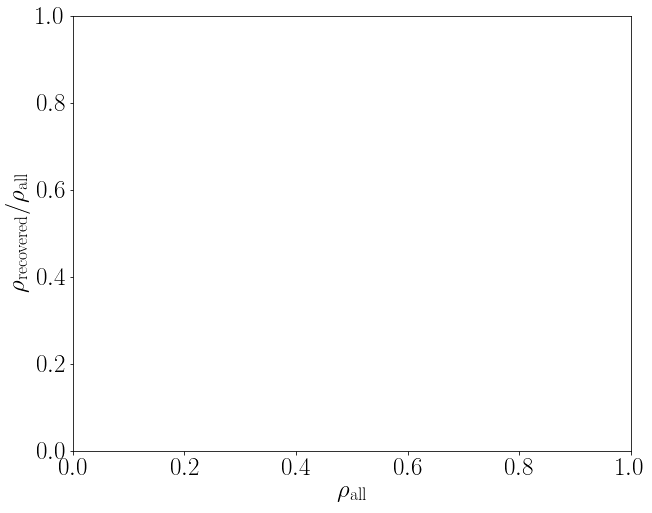

In [60]:
plt.figure(figsize=(10,8))
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  25 # Tune this according to personal preference
        }
matplotlib.rc('font',**font)
plt.rc('text', usetex=True)
jitter = 0
for key in list(rhopts.keys()):
    pall = np.array([item for sublist in rhoall[key] for item in sublist])
    ppts = np.array([item for sublist in rhopts[key] for item in sublist])
    ratio = ppts/pall
    bins = np.arange(0,25,1)
    a = np.digitize(pall,bins)
    meanpos = []
    meanupp = []
    meanval = []
    meanlow = []
    for b in bins:
        match = np.where(bins[a-1] == b)
        if len(match[0])>0:
            meanpos.append(b)
            down,mid,up = np.percentile(ratio[match],[25,50,75])
            meanupp.append(up)
            meanval.append(mid)
            meanlow.append(down)
    meanpos = np.array(meanpos)
    meanval = np.array(meanval)
    meanupp = np.array(meanupp)
    meanlow = np.array(meanlow)
    if len(meanpos) > 0:
        plt.errorbar(meanpos+jitter,meanval,yerr=[meanval-meanlow,meanupp-meanval],fmt=shapes[key],markersize=sizes[key],alpha=alphas[key],color=colors[key],label=names[key],capsize=5)
    #jitter+=0.05
plt.ylabel(r'$\rho_{\rm recovered}/\rho_{\rm all}$')
plt.xlabel(r'$\rho_{\rm all}$')
legend=plt.legend(loc='best')
legend.get_frame().set_linewidth(0.0)
#plt.savefig('density_recovery.pdf')

In [21]:
np.max(a)

25

(6+0j) (3+0j) 0.15091349640217755
(71+0j) (46+0j) 0.020202561129788608


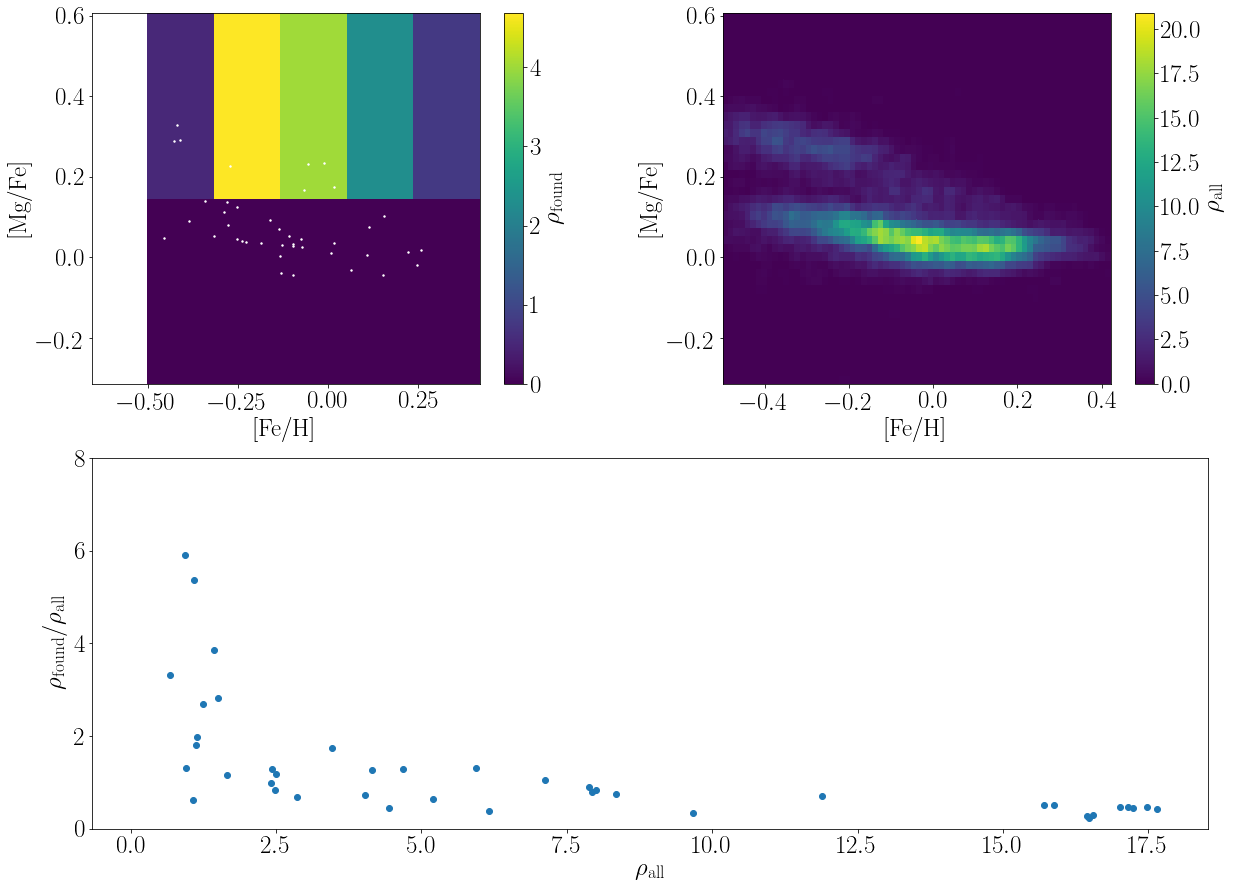

In [119]:
d.read_run_data(eps=0.15,min_sample=3,update=True,datatype='prin30')

def kde2D(x, y, xi, yi,fes,mgs,bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""
    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[-0.5:fes.max():xbins, 
                      mgs.min():mgs.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_points = np.vstack([yi,xi]).T
    xy_train  = np.vstack([y, x]).T
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)
    #kde_skl.fit(xy_points)
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    zpts = np.exp(kde_skl.score_samples(xy_points))
    return xx, yy, np.reshape(z, xx.shape),zpts

matchtlabs = d.matchtlabs
success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
labs = matchtlabs[success]

plt.figure(figsize=(20,15))

felabs = fes[labs][fes[labs]>felim]
mglabs = mgs[labs][fes[labs]>felim]
std = np.mean([np.std(felabs),np.std(mglabs)])
bandwidth = 3.5*std/(len(felabs)**(1./3))
#bandwidth = 3.5*std/(len(fes[fes>felim])**(1./3))
xbins = complex(int((np.max(felabs)-np.min(felabs))/bandwidth))+1
ybins = complex(int((np.max(mglabs)-np.min(mglabs))/bandwidth))+1

print(xbins,ybins,bandwidth)

plt.subplot2grid((2, 2), (0, 0))
xx, yy, zzpts, zpts = kde2D(felabs,mglabs,felabs,mglabs,fes,mgs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzpts)
plt.scatter(felabs,mglabs, s=2, facecolor='white')
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.colorbar(im,label=r'$\rho_{\rm found}$')
plt.subplot2grid((2, 2), (0, 1))

std = np.mean([np.std(fes[fes>felim]),np.std(mgs[fes>felim])])
bandwidth = 3.5*std/(len(fes[fes>felim])**(1./3))
xbins = complex(int((np.max(fes[fes>felim])-np.min(fes[fes>felim]))/bandwidth))+1
ybins = complex(int((np.max(mgs[fes>felim])-np.min(mgs[fes>felim]))/bandwidth))+1
print(xbins,ybins,bandwidth)
xx, yy, zzall, zall = kde2D(fes[fes>felim],mgs[fes>felim],felabs,mglabs,fes,mgs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzall)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
#plt.scatter(fes, mgs, s=2, facecolor='white')
plt.colorbar(im,label=r'$\rho_{\rm all}$')

# div = zzpts/zzall
# plt.subplot(223)
# im = plt.pcolormesh(xx,yy,div,cmap='viridis')
# plt.xlabel('[Fe/H]')
# plt.ylabel('[Mg/Fe]')
# plt.colorbar(im,label=r'$\rho_{\rm found}/\rho_{\rm all}$')

plt.subplot2grid((2, 2), (1, 0),colspan=2)
plt.plot(zall,zpts/zall,'o')
plt.xlabel(r'$\rho_{\rm all}$')
plt.ylabel(r'$\rho_{\rm found}/\rho_{\rm all}$')
plt.ylim(0,8)
plt.subplots_adjust(wspace=0.3)
plt.savefig('principal_components_mgfedensity.pdf')

In [105]:
labs

array([], dtype=float64)

In [104]:
d.read_run_data(eps=0.7,min_sample=3,update=True,datatype='spec')
matchtlabs = d.matchtlabs
success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
labs = matchtlabs[success]

plt.figure(figsize=(20,15))

felabs = fes[labs][fes[labs]>felim]
mglabs = mgs[labs][fes[labs]>felim]
std = np.mean([np.std(felabs),np.std(mglabs)])
bandwidth = 3.5*std/(len(felabs)**(1./3))
xbins = complex(int((np.max(felabs)-np.min(felabs))/bandwidth))+1
ybins = complex(int((np.max(mglabs)-np.min(mglabs))/bandwidth))+1

print(xbins,ybins,bandwidth)

plt.subplot2grid((2, 2), (0, 0))
xx, yy, zzpts, zpts = kde2D(felabs,mglabs,felabs,mglabs,fes,mgs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzpts)
plt.scatter(felabs,mglabs, s=2, facecolor='white')
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.colorbar(im,label=r'$\rho_{\rm found}$')
plt.subplot2grid((2, 2), (0, 1))

std = np.mean([np.std(fes[fes>felim]),np.std(mgs[fes>felim])])
bandwidth = 3.5*std/(len(fes[fes>felim])**(1./3))
xbins = complex(int((np.max(fes[fes>felim])-np.min(fes[fes>felim]))/bandwidth))+1
ybins = complex(int((np.max(mgs[fes>felim])-np.min(mgs[fes>felim]))/bandwidth))+1
print(xbins,ybins,bandwidth)
xx, yy, zzall, zall = kde2D(fes[fes>felim],mgs[fes>felim],felabs,mglabs,fes,mgs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzall)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
#plt.scatter(fes, mgs, s=2, facecolor='white')
plt.colorbar(im,label=r'$\rho_{\rm all}$')

# div = zzpts/zzall
# plt.subplot(223)
# im = plt.pcolormesh(xx,yy,div,cmap='viridis')
# plt.xlabel('[Fe/H]')
# plt.ylabel('[Mg/Fe]')
# plt.colorbar(im,label=r'$\rho_{\rm found}/\rho_{\rm all}$')

plt.subplot2grid((2, 2), (1, 0),colspan=2)
plt.plot(zall,zpts/zall,'o')
plt.xlabel(r'$\rho_{\rm all}$')
plt.ylabel(r'$\rho_{\rm found}/\rho_{\rm all}$')
plt.ylim(0,8)
plt.subplots_adjust(wspace=0.3)
plt.savefig('spectra_mgfedensity.pdf')

IndexError: arrays used as indices must be of integer (or boolean) type

(16+0j) (6+0j) 0.08417997743531101
(71+0j) (46+0j) 0.020202561129788608


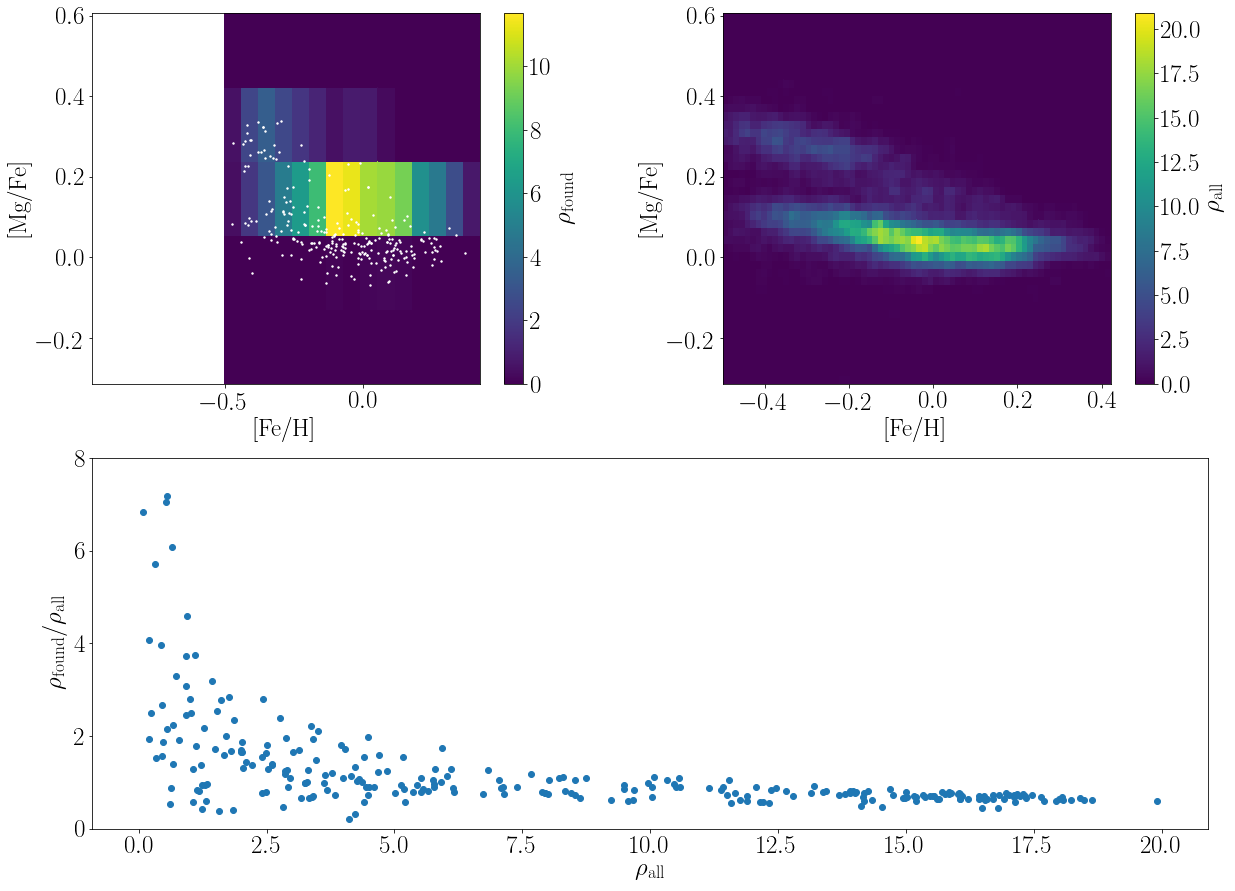

In [106]:
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='tabn')
matchtlabs = d.matchtlabs
success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
labs = matchtlabs[success]

plt.figure(figsize=(20,15))

felabs = fes[labs][fes[labs]>felim]
mglabs = mgs[labs][fes[labs]>felim]
std = np.mean([np.std(felabs),np.std(mglabs)])
bandwidth = 3.5*std/(len(felabs)**(1./3))
xbins = complex(int((np.max(felabs)-np.min(felabs))/bandwidth))+1
ybins = complex(int((np.max(mglabs)-np.min(mglabs))/bandwidth))+1

print(xbins,ybins,bandwidth)

plt.subplot2grid((2, 2), (0, 0))
xx, yy, zzpts, zpts = kde2D(felabs,mglabs,felabs,mglabs,fes,mgs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzpts)
plt.scatter(felabs,mglabs, s=2, facecolor='white')
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.colorbar(im,label=r'$\rho_{\rm found}$')
plt.subplot2grid((2, 2), (0, 1))

std = np.mean([np.std(fes[fes>felim]),np.std(mgs[fes>felim])])
bandwidth = 3.5*std/(len(fes[fes>felim])**(1./3))
xbins = complex(int((np.max(fes[fes>felim])-np.min(fes[fes>felim]))/bandwidth))+1
ybins = complex(int((np.max(mgs[fes>felim])-np.min(mgs[fes>felim]))/bandwidth))+1
print(xbins,ybins,bandwidth)
xx, yy, zzall, zall = kde2D(fes[fes>felim],mgs[fes>felim],felabs,mglabs,fes,mgs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzall)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
#plt.scatter(fes, mgs, s=2, facecolor='white')
plt.colorbar(im,label=r'$\rho_{\rm all}$')

# div = zzpts/zzall
# plt.subplot(223)
# im = plt.pcolormesh(xx,yy,div,cmap='viridis')
# plt.xlabel('[Fe/H]')
# plt.ylabel('[Mg/Fe]')
# plt.colorbar(im,label=r'$\rho_{\rm found}/\rho_{\rm all}$')

plt.subplot2grid((2, 2), (1, 0),colspan=2)
plt.plot(zall,zpts/zall,'o')
plt.xlabel(r'$\rho_{\rm all}$')
plt.ylabel(r'$\rho_{\rm found}/\rho_{\rm all}$')
plt.ylim(0,8)
plt.subplots_adjust(wspace=0.3)
plt.savefig('ting_abundances_mgfedensity.pdf')

(11+0j) (5+0j) 0.10324676925587999
(71+0j) (46+0j) 0.020202561129788608


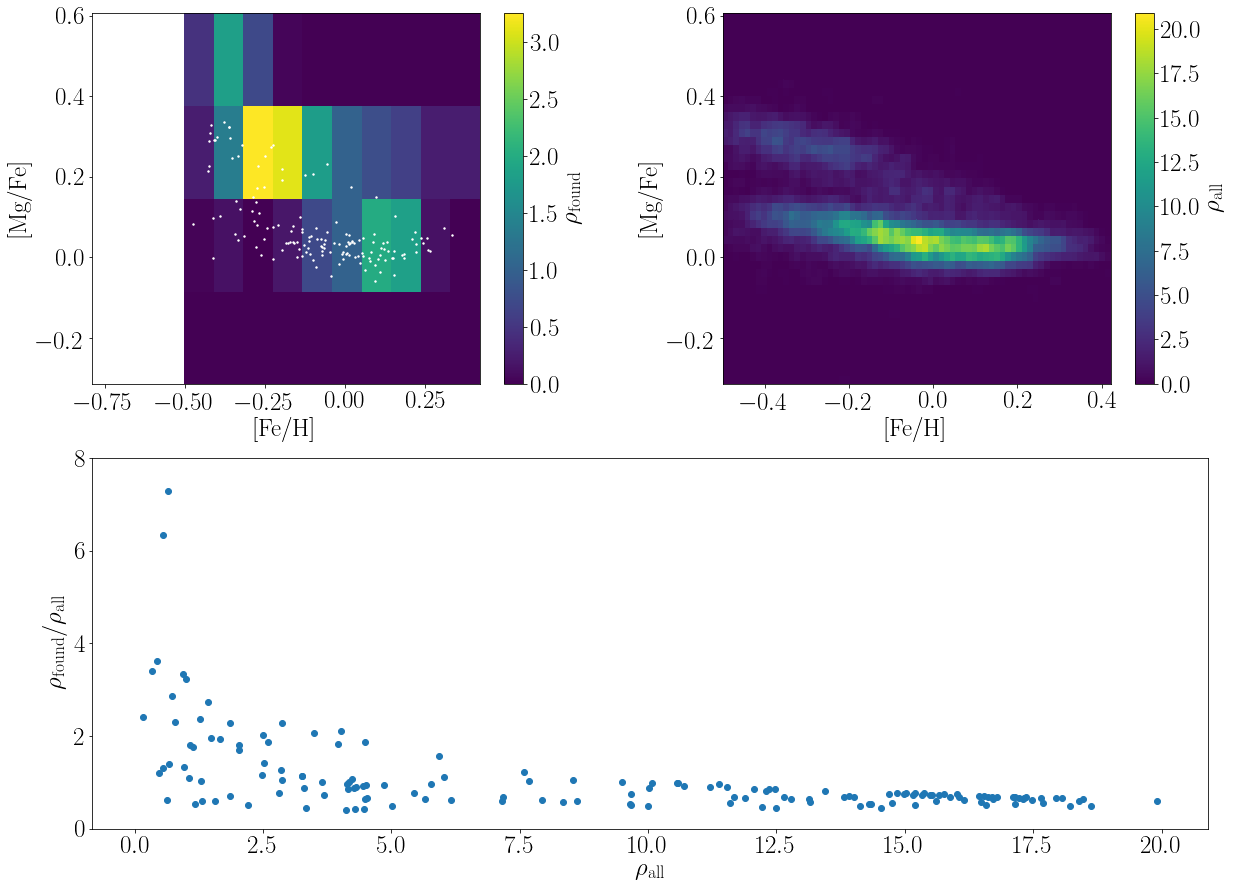

In [108]:
d.read_run_data(eps=0.12,min_sample=3,update=True,datatype='labn')
matchtlabs = d.matchtlabs
success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
labs = matchtlabs[success]

plt.figure(figsize=(20,15))

felabs = fes[labs][fes[labs]>felim]
mglabs = mgs[labs][fes[labs]>felim]
std = np.mean([np.std(felabs),np.std(mglabs)])
bandwidth = 3.5*std/(len(felabs)**(1./3))
xbins = complex(int((np.max(felabs)-np.min(felabs))/bandwidth))+1
ybins = complex(int((np.max(mglabs)-np.min(mglabs))/bandwidth))+1

print(xbins,ybins,bandwidth)

plt.subplot2grid((2, 2), (0, 0))
xx, yy, zzpts, zpts = kde2D(felabs,mglabs,felabs,mglabs,fes,mgs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzpts)
plt.scatter(felabs,mglabs, s=2, facecolor='white')
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.colorbar(im,label=r'$\rho_{\rm found}$')
plt.subplot2grid((2, 2), (0, 1))

std = np.mean([np.std(fes[fes>felim]),np.std(mgs[fes>felim])])
bandwidth = 3.5*std/(len(fes[fes>felim])**(1./3))
xbins = complex(int((np.max(fes[fes>felim])-np.min(fes[fes>felim]))/bandwidth))+1
ybins = complex(int((np.max(mgs[fes>felim])-np.min(mgs[fes>felim]))/bandwidth))+1
print(xbins,ybins,bandwidth)
xx, yy, zzall, zall = kde2D(fes[fes>felim],mgs[fes>felim],felabs,mglabs,fes,mgs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzall)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
#plt.scatter(fes, mgs, s=2, facecolor='white')
plt.colorbar(im,label=r'$\rho_{\rm all}$')

# div = zzpts/zzall
# plt.subplot(223)
# im = plt.pcolormesh(xx,yy,div,cmap='viridis')
# plt.xlabel('[Fe/H]')
# plt.ylabel('[Mg/Fe]')
# plt.colorbar(im,label=r'$\rho_{\rm found}/\rho_{\rm all}$')

plt.subplot2grid((2, 2), (1, 0),colspan=2)
plt.plot(zall,zpts/zall,'o')
plt.xlabel(r'$\rho_{\rm all}$')
plt.ylabel(r'$\rho_{\rm found}/\rho_{\rm all}$')
plt.ylim(0,8)
plt.subplots_adjust(wspace=0.3)
plt.savefig('leung_abundances_mgfedensity.pdf')

(4+0j) (1+0j) 0.1823063216468614
(71+0j) (46+0j) 0.020202561129788608


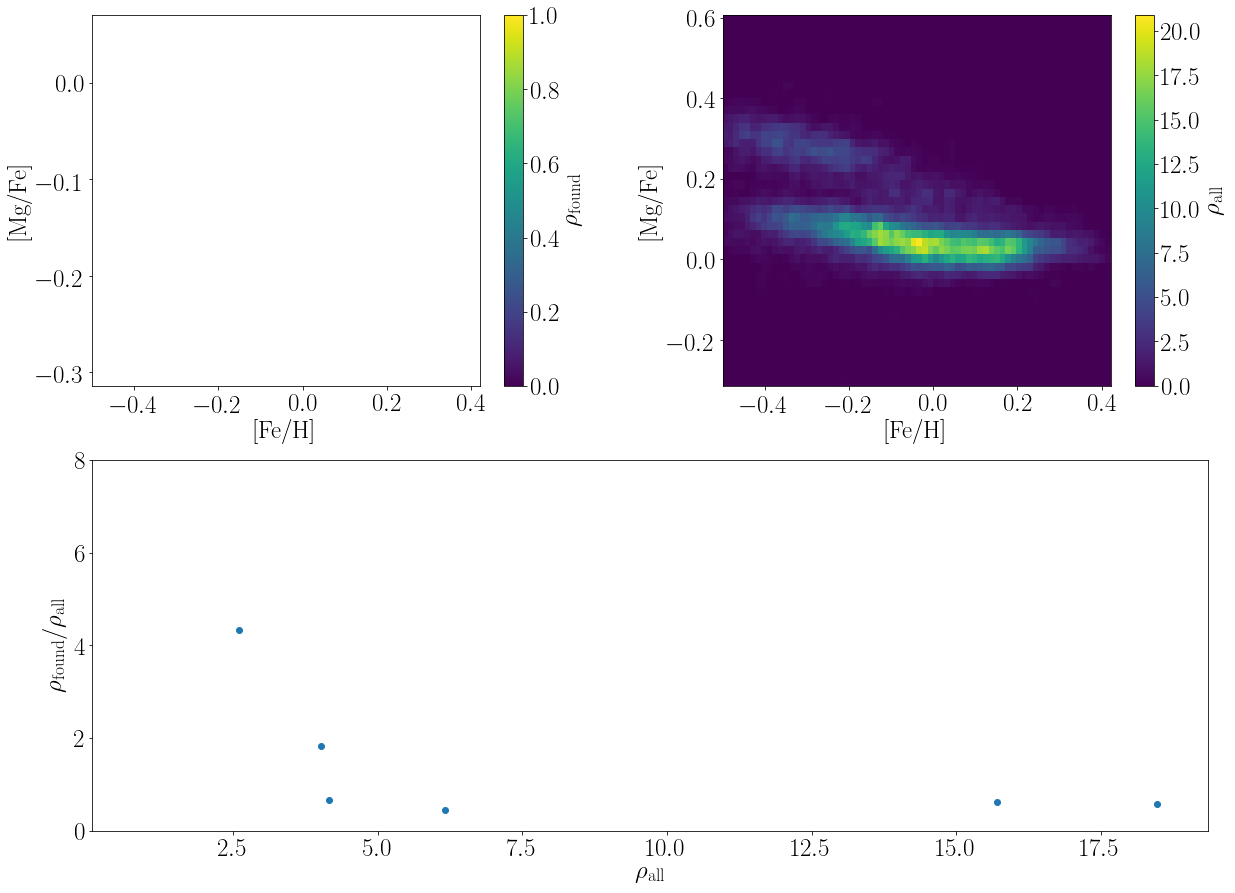

In [110]:
d.read_run_data(eps=0.3,min_sample=3,update=True,datatype='abun')
matchtlabs = d.matchtlabs
success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
labs = matchtlabs[success]

plt.figure(figsize=(20,15))

felabs = fes[labs][fes[labs]>felim]
mglabs = mgs[labs][fes[labs]>felim]
std = np.mean([np.std(felabs),np.std(mglabs)])
bandwidth = 3.5*std/(len(felabs)**(1./3))
xbins = complex(int((np.max(felabs)-np.min(felabs))/bandwidth))+1
ybins = complex(int((np.max(mglabs)-np.min(mglabs))/bandwidth))+1

print(xbins,ybins,bandwidth)

plt.subplot2grid((2, 2), (0, 0))
xx, yy, zzpts, zpts = kde2D(felabs,mglabs,felabs,mglabs,fes,mgs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzpts)
plt.scatter(felabs,mglabs, s=2, facecolor='white')
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.colorbar(im,label=r'$\rho_{\rm found}$')
plt.subplot2grid((2, 2), (0, 1))

std = np.mean([np.std(fes[fes>felim]),np.std(mgs[fes>felim])])
bandwidth = 3.5*std/(len(fes[fes>felim])**(1./3))
xbins = complex(int((np.max(fes[fes>felim])-np.min(fes[fes>felim]))/bandwidth))+1
ybins = complex(int((np.max(mgs[fes>felim])-np.min(mgs[fes>felim]))/bandwidth))+1
print(xbins,ybins,bandwidth)
xx, yy, zzall, zall = kde2D(fes[fes>felim],mgs[fes>felim],felabs,mglabs,fes,mgs,bandwidth,xbins=xbins,ybins=ybins,kernel=kernel)

im = plt.pcolormesh(xx, yy, zzall)
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
#plt.scatter(fes, mgs, s=2, facecolor='white')
plt.colorbar(im,label=r'$\rho_{\rm all}$')

# div = zzpts/zzall
# plt.subplot(223)
# im = plt.pcolormesh(xx,yy,div,cmap='viridis')
# plt.xlabel('[Fe/H]')
# plt.ylabel('[Mg/Fe]')
# plt.colorbar(im,label=r'$\rho_{\rm found}/\rho_{\rm all}$')

plt.subplot2grid((2, 2), (1, 0),colspan=2)
plt.plot(zall,zpts/zall,'o')
plt.xlabel(r'$\rho_{\rm all}$')
plt.ylabel(r'$\rho_{\rm found}/\rho_{\rm all}$')
plt.ylim(0,8)
plt.subplots_adjust(wspace=0.3)
plt.savefig('holtzman_abundances_mgfedensity.pdf')

In [142]:
d.tsil[9804]

0.39528710429771946

In [258]:
d.tsil[9806]

0.2863565620798861

In [259]:
d.tsil[9807]

0.3429079115809578

In [205]:
ocdat['CLUSTER']

array(['NGC 6819', 'NGC 6819', 'NGC 6819', 'NGC 6819', 'NGC 6819',
       'NGC 6819', 'NGC 6819', 'NGC 6819', 'NGC 6819', 'NGC 6819',
       'NGC 6819', 'NGC 6819', 'NGC 6819', 'NGC 6819', 'NGC 6819',
       'NGC 6819', 'NGC 6819', 'NGC 6811', 'Berkeley 53', 'NGC 7789',
       'NGC 7789', 'NGC 7789', 'NGC 7789', 'NGC 7789', 'NGC 7789',
       'NGC 7789', 'NGC 7789', 'NGC 7789', 'NGC 7789', 'NGC 7789',
       'NGC 188', 'NGC 188', 'NGC 188', 'NGC 188', 'NGC 188', 'NGC 188',
       'NGC 188', 'NGC 1245', 'NGC 1798', 'NGC 1798', 'NGC 1798',
       'Berkeley 17', 'Berkeley 17', 'Berkeley 17', 'Berkeley 17',
       'Berkeley 17', 'Berkeley 17', 'NGC 2420', 'NGC 2420', 'NGC 2420',
       'NGC 2420', 'NGC 2420', 'NGC 2420', 'NGC 2682', 'NGC 2682',
       'NGC 2682', 'NGC 2682', 'NGC 2682', 'NGC 2682', 'NGC 2682',
       'NGC 2682', 'NGC 2682', 'NGC 2682', 'NGC 2682'], dtype='<U100')

In [207]:
for c,cluster in enumerate(np.unique(ocdat['CLUSTER'])):
    match = np.where(ocdat['CLUSTER']==cluster)
    print(cluster,len(match[0]))

Berkeley 17 6
Berkeley 53 1
NGC 1245 1
NGC 1798 3
NGC 188 7
NGC 2420 6
NGC 2682 11
NGC 6811 1
NGC 6819 17
NGC 7789 11


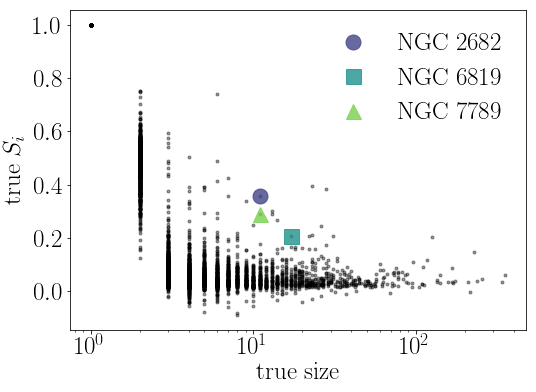

In [45]:
plt.figure(figsize=(8,6))
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  25 # Tune this according to personal preference
        }
matplotlib.rc('font',**font)
plt.rc('text', usetex=True)
plt.semilogx(d.tsize,d.tsil,'.',color='k',alpha=0.4,rasterized=True)
occolors = plt.get_cmap('viridis')(np.linspace(0.2,0.8,3))
plt.semilogx(d.tsize[-4],d.tsil[-4],'o',ms=15,color=occolors[0],label='NGC 2682',alpha=0.8,rasterized=True)
plt.semilogx(d.tsize[-2],d.tsil[-2],'s',ms=15,color=occolors[1],label='NGC 6819',alpha=0.8,rasterized=True)
plt.semilogx(d.tsize[-1],d.tsil[-1],'^',ms=15,color=occolors[2],label='NGC 7789',alpha=0.8,rasterized=True)
plt.xlabel('true size')
plt.ylabel('true $S_i$')
legend = plt.legend(loc='best')
legend.get_frame().set_linewidth(0.0)
plt.tight_layout()
plt.savefig('true_sils.pdf',dpi=400)

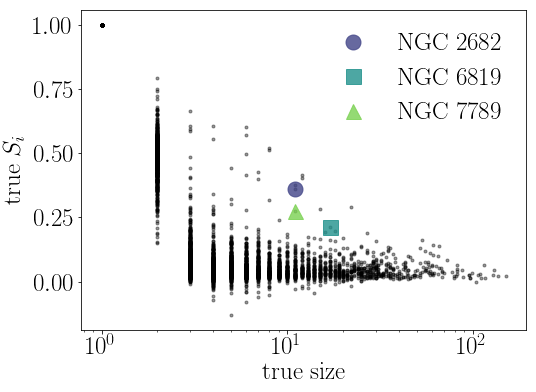

In [210]:
plt.figure(figsize=(8,6))
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  25 # Tune this according to personal preference
        }
matplotlib.rc('font',**font)
plt.rc('text', usetex=True)
plt.semilogx(d.tsize,d.tsil,'.',color='k',alpha=0.4,rasterized=True)
occolors = plt.get_cmap('viridis')(np.linspace(0.2,0.8,3))
plt.semilogx(d.tsize[-4],d.tsil[-4],'o',ms=15,color=occolors[0],label='NGC 2682',alpha=0.8,rasterized=True)
plt.semilogx(d.tsize[-2],d.tsil[-2],'s',ms=15,color=occolors[1],label='NGC 6819',alpha=0.8,rasterized=True)
plt.semilogx(d.tsize[-1],d.tsil[-1],'^',ms=15,color=occolors[2],label='NGC 7789',alpha=0.8,rasterized=True)
plt.xlabel('true size')
plt.ylabel('true $S_i$')
legend = plt.legend(loc='best')
legend.get_frame().set_linewidth(0.0)
plt.tight_layout()
plt.savefig('true_sils.pdf',dpi=400)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2157 but corresponding boolean dimension is 885

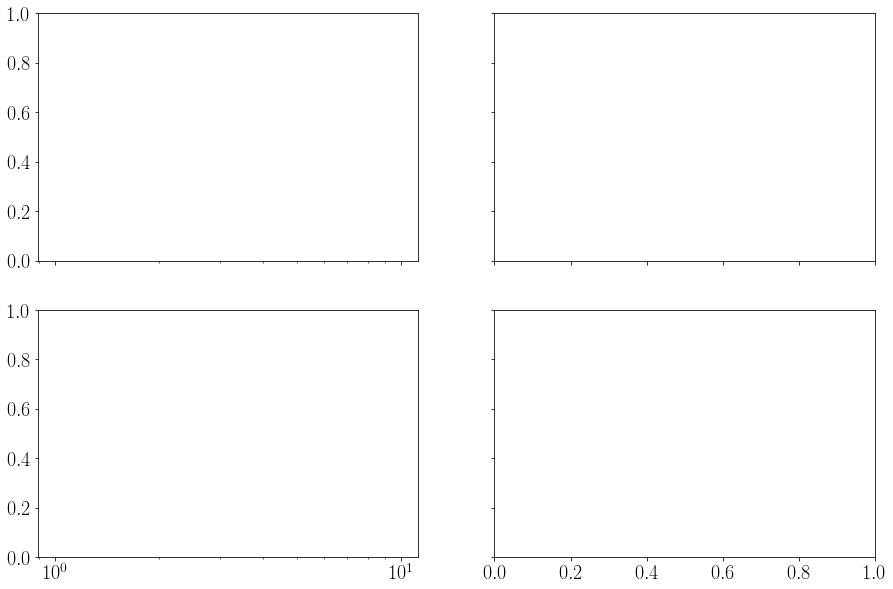

In [122]:
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  20
}
cmap = 'viridis_r'#'coolwarm'
sizelim = 20
mask = d.fsize > sizelim
fsizes = np.sort(d.fsize[mask])
matplotlib.rc('font',**font)
d.read_run_data(eps=0.1,min_sample=3,update=True,datatype='prin30')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(15,10))
ax1.set_xscale('log')
sc = ax1.scatter(d.fsize[mask],d.eff[mask])#,c=d.com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax1.set_ylabel('$H_i$')
ax1.set_ylim(-0.1,1.1)
ax2.set_xscale('log')
sc = ax2.scatter(d.msize[mask],d.eff[mask])#,c=d.com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax2.set_ylim(-0.1,1.1)
ax3.set_xscale('log')
sc = ax3.scatter(d.fsize[mask],d.com[mask])#,c=d.com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax3.set_ylabel('$C_i$')
ax3.set_xlabel('found size')
ax3.set_ylim(-0.1,1.1)
ax4.set_xscale('log')
sc = ax4.scatter(d.msize[mask],d.com[mask])#,c=d.com,cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax4.set_ylim(-0.1,1.1)
ax4.set_xlabel('matched size')
#cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.02])
#cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal',label='completeness')
plt.subplots_adjust(hspace=0.05,wspace=0.025,bottom=0.25)
#plt.savefig('silhouette_plots.pdf')
plt.figure()
plt.plot(d.eff[mask],d.com[mask],'.')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(15,10))
ax1.set_xscale('log')
sc = ax1.scatter(d.fsize[mask],d.fsil[mask],c=d.com[mask],cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax1.set_ylabel('found $S_i$')
ax1.set_ylim(-0.1,1.1)
ax2.set_xscale('log')
sc = ax2.scatter(d.msize[mask],d.fsil[mask],c=d.com[mask],cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax2.set_ylim(-0.1,1.1)
ax3.set_xscale('log')
sc = ax3.scatter(d.fsize[mask],d.msil[mask],c=d.com[mask],cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax3.set_ylabel('matched $S_i$')
ax3.set_xlabel('found size')
ax3.set_ylim(-0.1,1.1)
ax4.set_xscale('log')
sc = ax4.scatter(d.msize[mask],d.msil[mask],c=d.com[mask],cmap=cmap,vmin=0,vmax=1,alpha=0.5)
ax4.set_ylim(-0.1,1.1)
ax4.set_xlabel('matched size')
cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.02])
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal',label='completeness')
plt.subplots_adjust(hspace=0.05,wspace=0.025,bottom=0.25)
plt.savefig('silhouette_plots.pdf')

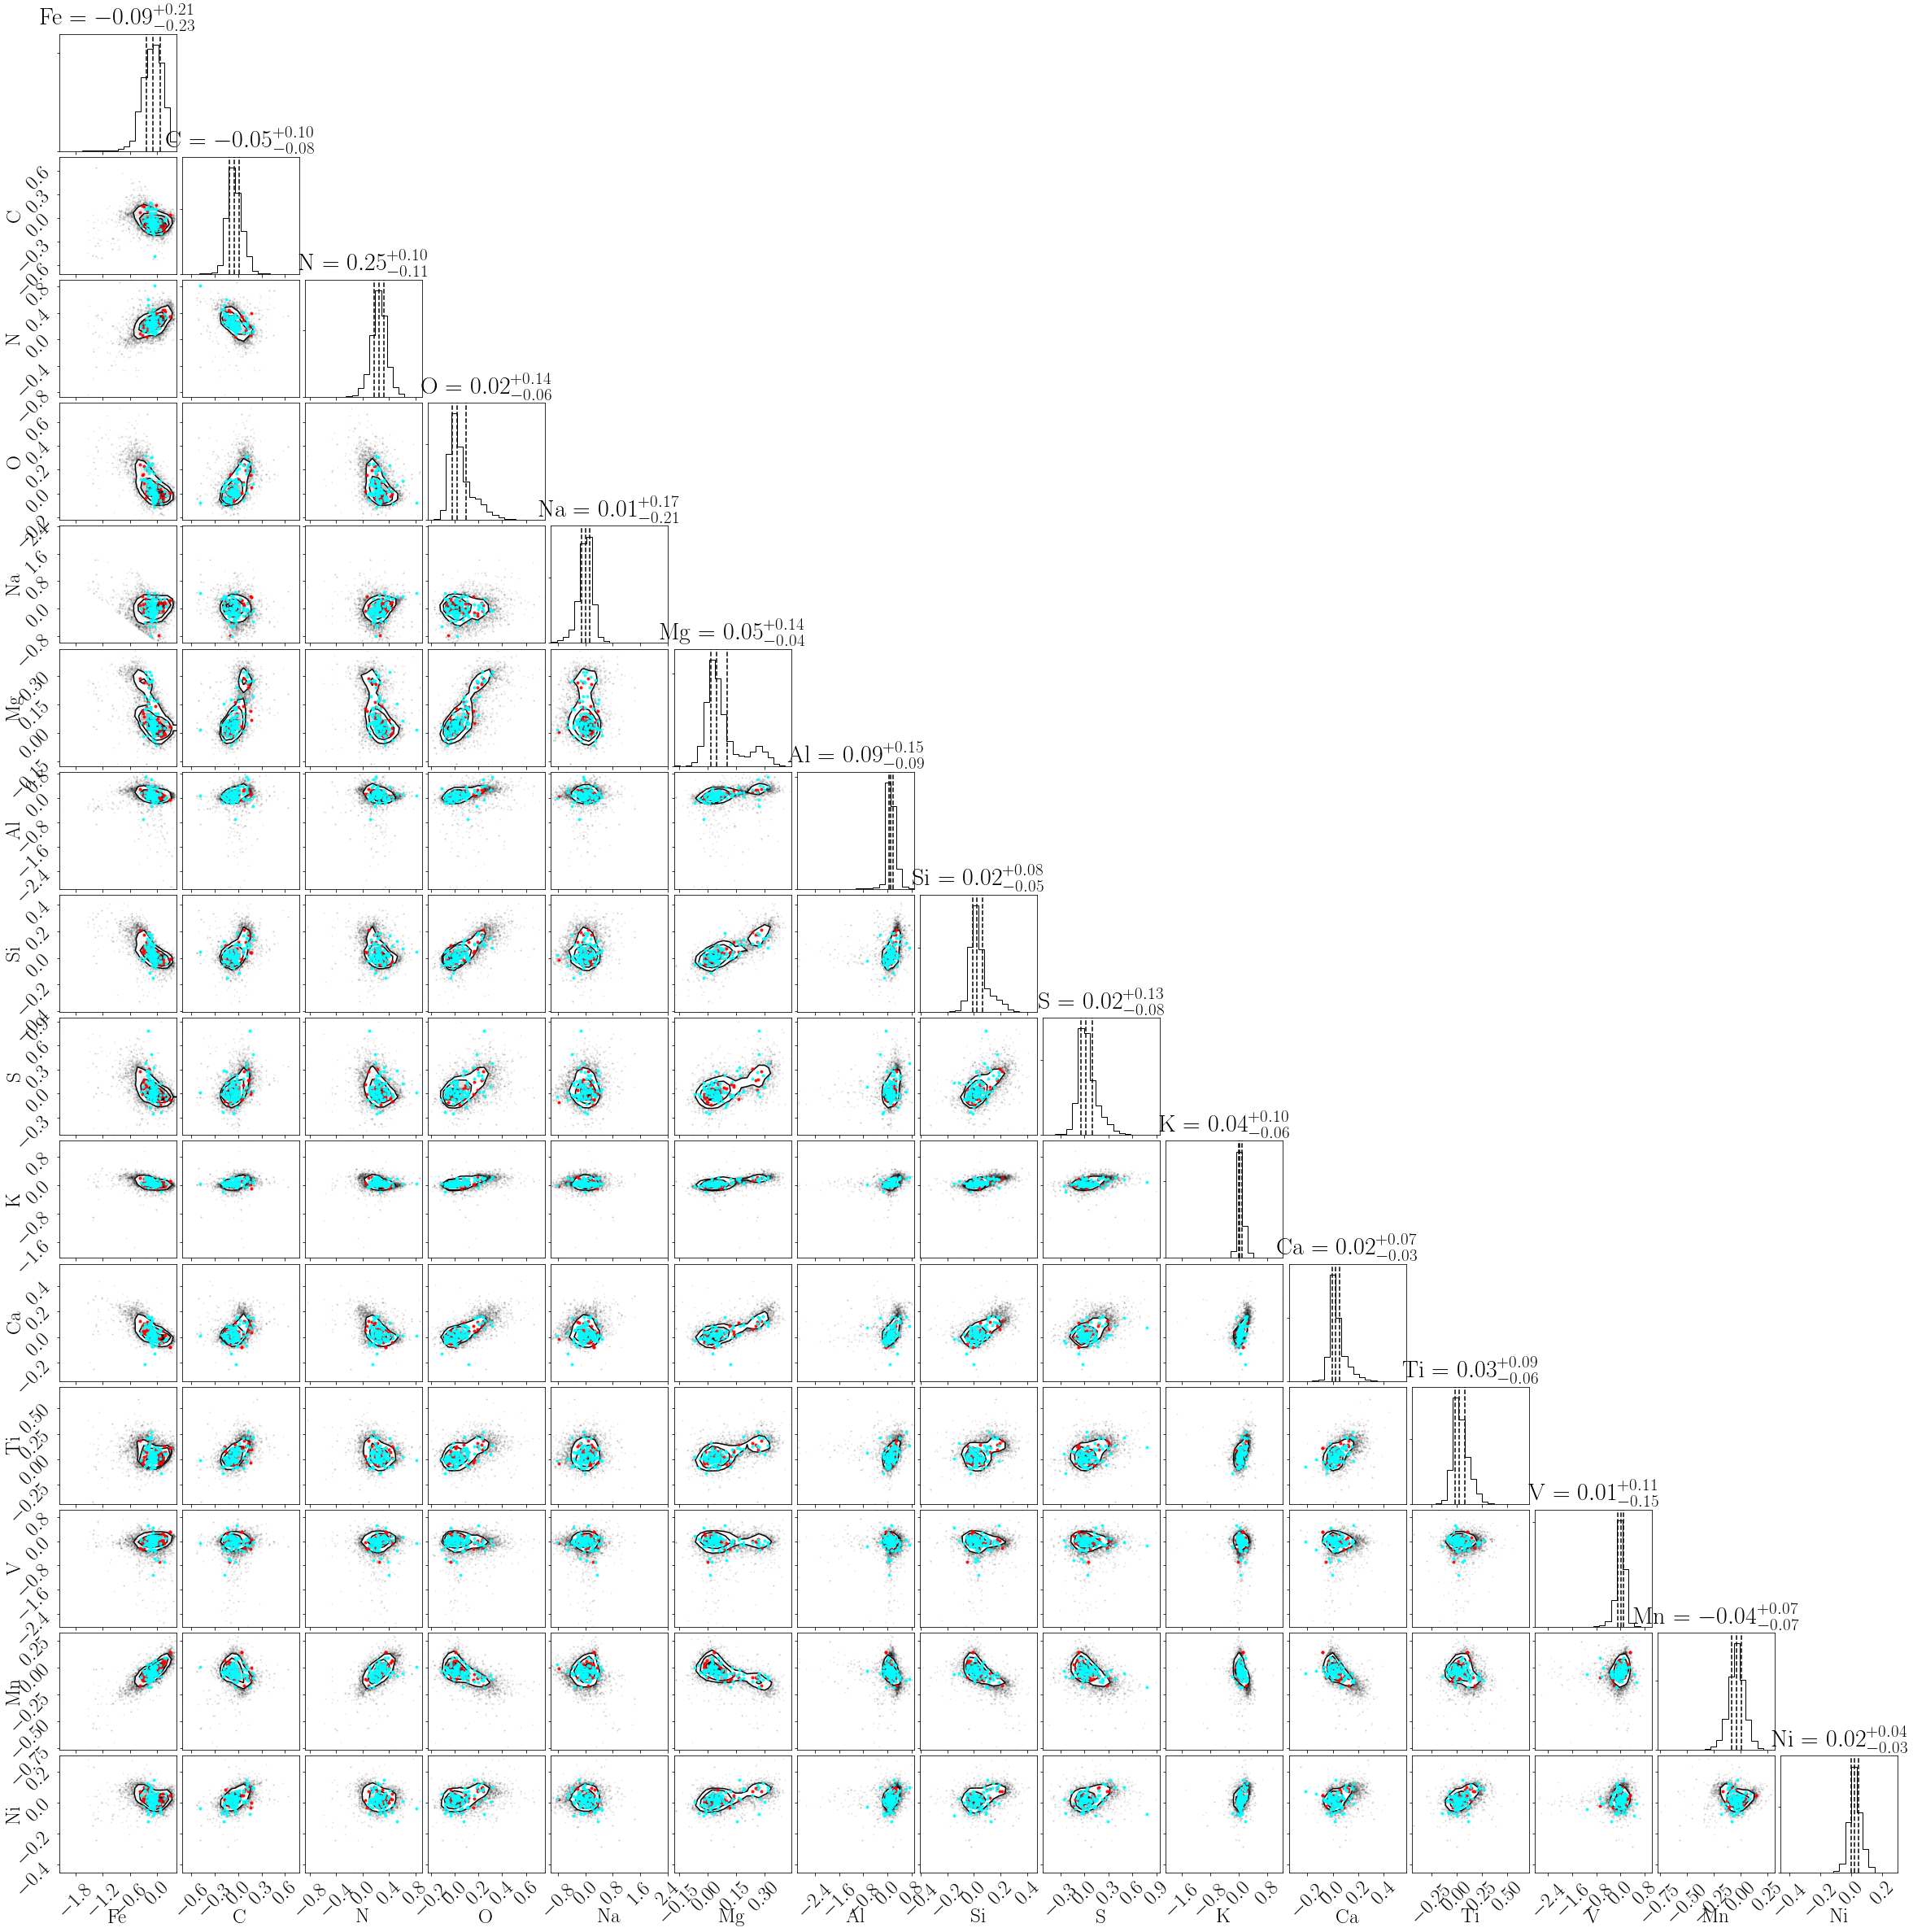

In [195]:
import corner
ndim = 15
ecut = 0.8
ccut = 0.8
sizemin = 10
nbins = 20
mask = d.tsize>sizemin
d.read_run_data(eps=0.1,min_sample=3,update=True,datatype='prin30')
success=(d.eff>=ecut)*(d.com>=ccut)*(d.fsize>sizemin)
fail = (d.eff<ecut)*(d.com<ccut)*(d.fsize>sizemin)
labs = d.matchtlabs[success]
nolabs = d.matchtlabs[fail]
fig = corner.corner(fecenters,labels = np.insert(els,0,'Fe'),quantiles=[0.25,0.5,0.75],show_titles=True,bins=nbins,hist_kwarg={'normed':True,'stacked':True,'bins':nbins})

# Extract the axes
axes = np.array(fig.axes).reshape((ndim, ndim))

# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.plot(fecenters[nolabs][:,xi], fecenters[nolabs][:,yi], '.',color='red',alpha=0.9)
        ax.plot(fecenters[labs][:,xi], fecenters[labs][:,yi], '.',color='cyan',alpha=0.9)
plt.savefig('master_corner.pdf')
plt.figure()

In [46]:
d = read_results(datatype = 'spec', case = 12, 
                 timestamp = '2018-08-22.14.59.55.527448')
d.read_base_data()
print(len(d.data['labels_true']))
if not d.allbad:
    d.generate_average_stats(testnum=10,testsize=15,testeff=0.70,testcom=0.70,iters=100,minmem=15,checkcls=10,checkinds=[9807,9806,9804])

50000
I found 9807
Other members:  [9796 9796 9796]
I found 9807
Other members:  [9796 9796 9796]
I found 9807
Other members:  [9796 9796]
I found 9807
Other members:  [9796 9796 9796]
I found 9807
Other members:  [9803 9803]
I found 9807
Other members:  [9787 9787]
I found 9807
Other members:  [9771 9771]
I found 9807
Other members:  [9801 9801]
I found 9807
Other members:  [9796 9796]
I found 9807
Other members:  [9805 9805]


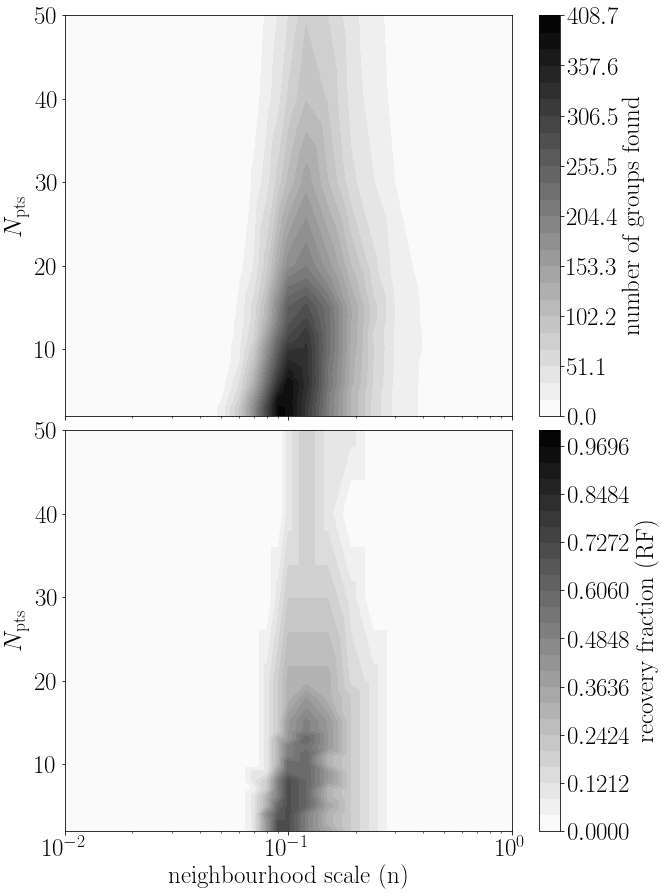

In [48]:
from matplotlib.colors import LogNorm
bins = 25
cmap = 'gray_r'
key = 'tabn'
if '{0}_statsource'.format(key) in dir(d):
    ss = getattr(d,'{0}_statsource'.format(key))
    ss = ss.data
    if any(ss['numc'] > 0.5):
        params = ss['params']
        eps = np.array([float(i.split(', ')[0]) for i in params])
        mins = np.array([int(i.split(', ')[1]) for i in params])
        mask = ss['numc'] < 0.5
        ss['numc'][mask] = 0
        ss['fstd'][:,1][mask] = 0
        numclevels = np.linspace(0,np.max(ss['numc'])+(np.max(ss['numc'])/bins),bins)
        levels = np.linspace(0.0,1.01,bins+1)
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col',figsize=(10,15))
        #ax1.set_yscale('log')
        ax1.set_xscale('log')
        cb=ax1.tricontourf(eps,mins,ss['numc'], bins,levels=numclevels,cmap=cmap,rasterized=True)
        fig.colorbar(cb,ax=ax1,label='number of groups found')
        ax1.set_ylabel(r'$N_{\rm pts}$')
        #ax2.set_yscale('log')
        ax2.set_xscale('log')
        cb=ax2.tricontourf(eps,mins,ss['fstd'][:,1], bins,levels=levels,cmap=cmap,rasterized=True)
        fig.colorbar(cb,ax=ax2,label='recovery fraction (RF)')
        ax2.set_ylabel(r'$N_{\rm pts}$')
        ax2.set_xlabel('neighbourhood scale (n)')
        plt.subplots_adjust(hspace=0.035)
        plt.savefig('ex_param_find.pdf',dpi=400)

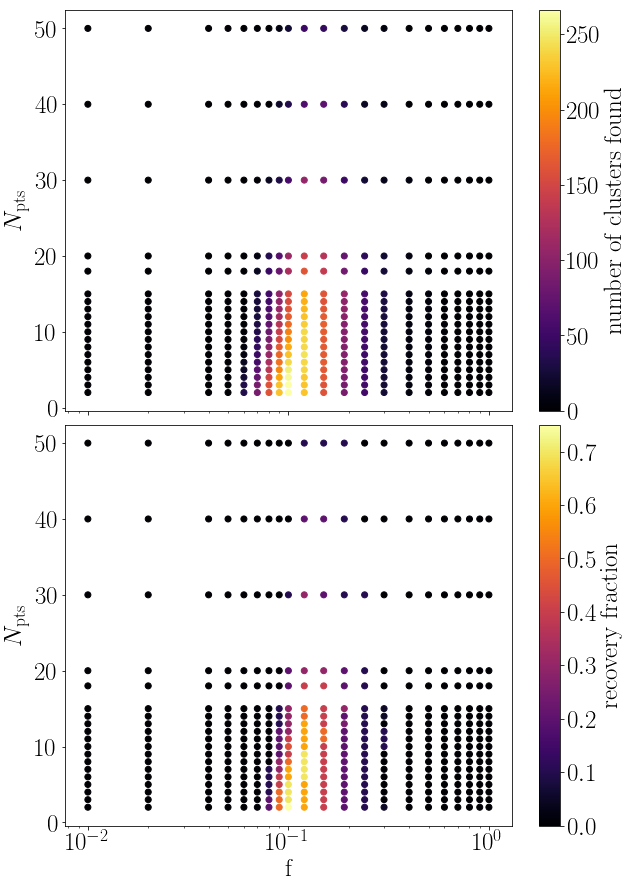

In [82]:
if '{0}_statsource'.format(key) in dir(d):
    ss = getattr(d,'{0}_statsource'.format(key))
    ss = ss.data
    if any(ss['numc'] > 0.5):
        params = ss['params']
        eps = np.array([float(i.split(', ')[0]) for i in params])
        mins = np.array([int(i.split(', ')[1]) for i in params])
        mask = ss['numc'] < 0.5
        ss['numc'][mask] = 0
        ss['fstd'][:,1][mask] = 0
        numclevels = np.linspace(0,np.max(ss['numc'])+(np.max(ss['numc'])/bins),bins)
        levels = np.linspace(0.0,1.01,bins+1)
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col',figsize=(10,15))
        #ax1.set_yscale('log')
        ax1.set_xscale('log')
        cb=ax1.scatter(eps,mins,c=ss['numc'],cmap=cmap)
        fig.colorbar(cb,ax=ax1,label='number of clusters found')
        ax1.set_ylabel(r'$N_{\rm pts}$')
        #ax2.set_yscale('log')
        ax2.set_xscale('log')
        cb=ax2.scatter(eps,mins,c=ss['fstd'][:,1],cmap=cmap)
        fig.colorbar(cb,ax=ax2,label='recovery fraction')
        ax2.set_ylabel(r'$N_{\rm pts}$')
        ax2.set_xlabel('f')
        plt.subplots_adjust(hspace=0.035)
        plt.savefig('ex_param_find.pdf')

In [80]:
np.percentile(d.fsize,[25,50,95])

array([ 2. ,  2. , 11.6])